## Imports

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime
warnings.filterwarnings('ignore')
#print(sns.__version__)

## Load Data

Note: Data obtained from various sources (via scraping with Beautiful Soup, manual entry) and compiled into .xlsx format prior to this workstream

In [2]:
#Read file into a DataFrame and print head.
xword_data = pd.ExcelFile('../data/NYT_XWord_data.xlsx', engine='openpyxl')
print(xword_data.sheet_names)

['Sheet1']


In [3]:
df1 = xword_data.parse('Sheet1')

In [4]:
df1.head(35)

Puzzle_Date Completed_Date (IS1) Completed_Date (IS2) Day_of_Week  \
0   2024-01-27  2024-01-27 07:26:30  2024-01-27 19:30:40    Saturday   
1   2024-01-26  2024-01-26 07:27:18  2024-01-26 13:25:05      Friday   
2   2024-01-25  2024-01-25 07:17:58  2024-01-25 18:55:28    Thursday   
3   2024-01-24  2024-01-24 06:48:01  2024-01-24 18:11:25   Wednesday   
4   2024-01-23  2024-01-23 06:53:25  2024-01-23 14:05:58     Tuesday   
5   2024-01-22  2024-01-22 08:09:11  2024-01-21 18:26:08      Monday   
6   2024-01-21  2024-01-21 08:41:27  2024-01-20 19:02:30      Sunday   
7   2024-01-20  2024-01-20 07:24:53  2024-01-20 10:45:59    Saturday   
8   2024-01-19  2024-01-19 08:50:38  2024-01-19 12:55:34      Friday   
9   2024-01-18  2024-01-18 08:23:39  2024-01-18 15:44:37    Thursday   
10  2024-01-17  2024-01-17 08:01:57  2024-01-17 17:56:31   Wednesday   
11  2024-01-16  2024-01-16 07:25:58  2024-01-16 12:42:56     Tuesday   
12  2024-01-15  2024-01-15 07:41:52  2024-01-14 21:22:47      Monday   
13  2024-01-14  2024-01-14 08:36:14  2024-01-13 20:53:10      Sunday   
14  2024-01-13  2024-01-13 07:00:29  2024-01-13 20:00:39    Saturday   
15  2024-01-12  2024-01-12 07:14:59  2024-01-12 14:55:45      Friday   
16  2024-01-11  2024-01-11 07:15:39  2024-01-11 19:04:26    Thursday   
17  2024-01-10  2024-01-10 06:50:06  2024-01-10 18:33:40   Wednesday   
18  2024-01-09  2024-01-09 07:28:21  2024-01-09 09:34:24     Tuesday   
19  2024-01-08  2024-01-07 20:18:53  2024-01-07 20:01:13      Monday   
20  2024-01-07  2024-01-07 06:20:29  2024-01-06 22:49:00      Sunday   
21  2024-01-06  2024-01-06 07:56:40  2024-01-06 18:56:20    Saturday   
22  2024-01-05  2024-01-05 07:24:33  2024-01-05 17:36:03      Friday   
23  2024-01-04  2024-01-04 07:06:17  2024-01-04 16:09:11    Thursday   
24  2024-01-03  2024-01-03 07:57:47  2024-01-03 21:00:36   Wednesday   
25  2024-01-02  2024-01-02 07:24:01  2024-01-02 09:10:42     Tuesday   
26  2024-01-01  2024-01-01 08:21:39  2024-01-01 15:08:40      Monday   
27  2023-12-31  2023-12-30 18:57:40  2023-12-30 19:51:36      Sunday   
28  2023-12-30  2023-12-30 07:14:48  2023-12-30 10:16:35    Saturday   
29  2023-12-29  2023-12-29 08:42:13  2023-12-28 22:29:38      Friday   
30  2023-12-28  2023-12-28 08:21:40  2023-12-28 11:26:38    Thursday   
31  2023-12-27  2023-12-27 09:02:32  2023-12-27 10:46:57   Wednesday   
32  2023-12-26  2023-12-26 08:15:55  2023-12-26 10:52:11     Tuesday   
33  2023-12-25  2023-12-25 08:22:02  2023-12-25 10:23:57      Monday   
34  2023-12-24  2023-12-23 18:37:23  2023-12-23 23:27:09      Sunday   

    Time (s) (IS1)  Time (s) (IS2)  Global_Median_Solver_Time(s) Difficulty  \
0            565.0          1379.0                          1051       Easy   
1            632.0           636.0                           779  Very Easy   
2            808.0          1295.0                          1088       Hard   
3            313.0           582.0                           547  Very Easy   
4            259.0           376.0                           381       Easy   
5            348.0           428.0                           376       Hard   
6           1088.0          1073.0                          1519    Average   
7            772.0          1484.0                          1210    Average   
8            723.0           883.0                           997    Average   
9           1045.0          1219.0                          1131       Hard   
10           435.0           619.0                           688    Average   
11           335.0           408.0                           525       Hard   
12           293.0           380.0                           367       Hard   
13          1224.0          1330.0                          1975       Hard   
14           459.0           559.0                           796  Very Easy   
15           556.0           965.0                          1036    Average   
16           549.0           998.0                           904   

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Puzzle_Date                   2218 non-null   datetime64[ns]
 1   Completed_Date (IS1)          1174 non-null   datetime64[ns]
 2   Completed_Date (IS2)          1071 non-null   datetime64[ns]
 3   Day_of_Week                   2218 non-null   object        
 4   Time (s) (IS1)                1174 non-null   float64       
 5   Time (s) (IS2)                1071 non-null   float64       
 6   Global_Median_Solver_Time(s)  2218 non-null   int64         
 7   Difficulty                    2218 non-null   object        
 8   Median_Solver%_AVG_PM         2218 non-null   int64         
 9   Grid Size                     2218 non-null   int64         
 10  No_Constructors               2218 non-null   int64         
 11  Constructors(by seniority)    

## Data Cleaning and Global Median Solver Feature Creation
A few generally useful operations for the exploratory analysis of Individual Solver 1 (IS1)

In [ ]:
# Delete weird columns at the back end of the imported data
#df2 = df1.drop(columns=df1.columns[-6:], axis=1)

In [6]:
# Drop Some columns that, while potentially useful for predictive modeling, aren't necessary for the EDA.
df2 = df1.drop(['Difficulty', '1st_Constructor', '1st_Constuctor_Gender', '1st_Constructor_Puzzle_N', '1st_Constructor_Debut', '1st_Constructor_Scrabble_Avg', '1st_Constructor_Fresh%_Avg', '2nd_Constructor', '2nd_Constuctor_Gender', '2nd_Constructor_Puzzle_N', '2nd_Constructor_Debut', '2nd_Constructor_Scrabble_Avg', '2nd_Constructor_Fresh%_Avg', '3rd_Constructor', '3rd_Constuctor_Gender', '3rd_Constructor_Puzzle_N', '3rd_Constructor_Debut', '3rd_Constructor_Scrabble_Avg', '3rd_Constructor_Fresh%_Avg', 'Spans', '2_Stacks', '3_4_Stacks', 'Mirror_Sym', 'UD_Sym', 'Asym', 'Supersym', '90_180_Rot_Sym', 'LR_UD_Sym', 'Diag_Sym', 'Black_Square_Fill','Outside_Grid', 'Unchecked_Sq','Uniclue','Duplicate_Answers','Quantum'], axis=1)

In [7]:
# Rename some columns for brevity and clarity
df2.rename(columns={'Constructors(by seniority)': 'Constructors', 'Median_Solver%_AVG_PM':'Diff%_from_10pMA(GMS)', 'Day_of_Week': 'DOW', 'Puzzle_Date': 'P_Date', 'Median_Solver%_AVG_PM': 'GMST_Diff%_from_GMS_10p_MA'}, inplace=True)

In [8]:
# It will be useful generally to have puzzle dates as strings in other columns along with the datetimes 
df2['P_Date_str'] = df2['P_Date'].dt.strftime('%Y-%m-%d') #we want datetime as a string to index into here

In [9]:
# Convert global median solve times (GMTs) per puzzle to minutes and drop times in seconds
df2["GMST(m)"] = df2["Global_Median_Solver_Time(s)"]/60  #GMST = Global Median solve times
df2.drop(['Global_Median_Solver_Time(s)'], axis=1, inplace=True)

In [10]:
#GMS_pds_l20_dw
#Provides decay-weighted(dw), puzzle day-specific (pds) mean solve time performance for the GMS over the previous 20 puzzles
# Note that the sort is by puzzle issue date for the GMS, as completion date is not avaiable (sequence is assumed to be that of issue date)
# Note also that, unlike the 10-puzzle moving average, this weighted average does NOT include the "puzzle at hand" itself

df2 = df2.sort_values(by=['DOW', 'P_Date'], ascending = False)

w = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [20,18,14,8,4,4,2,2,1,1] #weight assigned to puzzle
#w = [20,19,18,17,16,15,14,13,12,11] #weight assigned to puzzle
#w = [10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [1,1,1,1,1,1,1,1,1,1] #weight assigned to puzzle

df2["GMS_pds_l20_dw_1"] = df2.groupby(['DOW'])['GMST(m)'].shift(-1)*w[0]
df2["GMS_pds_l20_dw_2"] = df2.groupby(['DOW'])['GMST(m)'].shift(-2)*w[1]
df2["GMS_pds_l20_dw_3"] = df2.groupby(['DOW'])['GMST(m)'].shift(-3)*w[2]
df2["GMS_pds_l20_dw_4"] = df2.groupby(['DOW'])['GMST(m)'].shift(-4)*w[3]
df2["GMS_pds_l20_dw_5"] = df2.groupby(['DOW'])['GMST(m)'].shift(-5)*w[4]
df2["GMS_pds_l20_dw_6"] = df2.groupby(['DOW'])['GMST(m)'].shift(-6)*w[5]
df2["GMS_pds_l20_dw_7"] = df2.groupby(['DOW'])['GMST(m)'].shift(-7)*w[6]
df2["GMS_pds_l20_dw_8"] = df2.groupby(['DOW'])['GMST(m)'].shift(-8)*w[7]
df2["GMS_pds_l20_dw_9"] = df2.groupby(['DOW'])['GMST(m)'].shift(-9)*w[8]
df2["GMS_pds_l20_dw_10"] = df2.groupby(['DOW'])['GMST(m)'].shift(-10)*w[9]
df2["GMS_pds_l20_dw_11"] = df2.groupby(['DOW'])['GMST(m)'].shift(-11)*w[10]
df2["GMS_pds_l20_dw_12"] = df2.groupby(['DOW'])['GMST(m)'].shift(-12)*w[11]
df2["GMS_pds_l20_dw_13"] = df2.groupby(['DOW'])['GMST(m)'].shift(-13)*w[12]
df2["GMS_pds_l20_dw_14"] = df2.groupby(['DOW'])['GMST(m)'].shift(-14)*w[13]
df2["GMS_pds_l20_dw_15"] = df2.groupby(['DOW'])['GMST(m)'].shift(-15)*w[14]
df2["GMS_pds_l20_dw_16"] = df2.groupby(['DOW'])['GMST(m)'].shift(-16)*w[15]
df2["GMS_pds_l20_dw_17"] = df2.groupby(['DOW'])['GMST(m)'].shift(-17)*w[16]
df2["GMS_pds_l20_dw_18"] = df2.groupby(['DOW'])['GMST(m)'].shift(-18)*w[17]
df2["GMS_pds_l20_dw_19"] = df2.groupby(['DOW'])['GMST(m)'].shift(-19)*w[18]
df2["GMS_pds_l20_dw_20"] = df2.groupby(['DOW'])['GMST(m)'].shift(-20)*w[19]

df2["GMS_pds_l20_dw_1_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-1)/df2.groupby(['DOW'])['GMST(m)'].shift(-1))*w[0]
df2["GMS_pds_l20_dw_2_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-2)/df2.groupby(['DOW'])['GMST(m)'].shift(-2))*w[1]
df2["GMS_pds_l20_dw_3_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-3)/df2.groupby(['DOW'])['GMST(m)'].shift(-3))*w[2]
df2["GMS_pds_l20_dw_4_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-4)/df2.groupby(['DOW'])['GMST(m)'].shift(-4))*w[3]
df2["GMS_pds_l20_dw_5_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-5)/df2.groupby(['DOW'])['GMST(m)'].shift(-5))*w[4]
df2["GMS_pds_l20_dw_6_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-6)/df2.groupby(['DOW'])['GMST(m)'].shift(-6))*w[5]
df2["GMS_pds_l20_dw_7_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-7)/df2.groupby(['DOW'])['GMST(m)'].shift(-7))*w[6]
df2["GMS_pds_l20_dw_8_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-8)/df2.groupby(['DOW'])['GMST(m)'].shift(-8))*w[7]
df2["GMS_pds_l20_dw_9_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-9)/df2.groupby(['DOW'])['GMST(m)'].shift(-9))*w[8]
df2["GMS_pds_l20_dw_10_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-10)/df2.groupby(['DOW'])['GMST(m)'].shift(-10))*w[9]
df2["GMS_pds_l20_dw_11_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-11)/df2.groupby(['DOW'])['GMST(m)'].shift(-11))*w[10]
df2["GMS_pds_l20_dw_12_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-12)/df2.groupby(['DOW'])['GMST(m)'].shift(-12))*w[11]
df2["GMS_pds_l20_dw_13_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-13)/df2.groupby(['DOW'])['GMST(m)'].shift(-13))*w[12]
df2["GMS_pds_l20_dw_14_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-14)/df2.groupby(['DOW'])['GMST(m)'].shift(-14))*w[13]
df2["GMS_pds_l20_dw_15_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-15)/df2.groupby(['DOW'])['GMST(m)'].shift(-15))*w[14]
df2["GMS_pds_l20_dw_16_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-16)/df2.groupby(['DOW'])['GMST(m)'].shift(-16))*w[15]
df2["GMS_pds_l20_dw_17_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-17)/df2.groupby(['DOW'])['GMST(m)'].shift(-17))*w[16]
df2["GMS_pds_l20_dw_18_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-18)/df2.groupby(['DOW'])['GMST(m)'].shift(-18))*w[17]
df2["GMS_pds_l20_dw_19_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-19)/df2.groupby(['DOW'])['GMST(m)'].shift(-19))*w[18]
df2["GMS_pds_l20_dw_20_ct"] = (df2.groupby(['DOW'])['GMST(m)'].shift(-20)/df2.groupby(['DOW'])['GMST(m)'].shift(-20))*w[19]

df2["GMS_pds_l20_ws"] = df2[["GMS_pds_l20_dw_1", "GMS_pds_l20_dw_2", "GMS_pds_l20_dw_3", "GMS_pds_l20_dw_4", "GMS_pds_l20_dw_5", "GMS_pds_l20_dw_6", "GMS_pds_l20_dw_7", "GMS_pds_l20_dw_8", "GMS_pds_l20_dw_9", "GMS_pds_l20_dw_10", "GMS_pds_l20_dw_11", "GMS_pds_l20_dw_12", "GMS_pds_l20_dw_13", "GMS_pds_l20_dw_14", "GMS_pds_l20_dw_15", "GMS_pds_l20_dw_16", "GMS_pds_l20_dw_17", "GMS_pds_l20_dw_18", "GMS_pds_l20_dw_19", "GMS_pds_l20_dw_20"]].sum(axis=1)
df2["GMS_pds_l20_ws_ct"] = df2[["GMS_pds_l20_dw_1_ct", "GMS_pds_l20_dw_2_ct", "GMS_pds_l20_dw_3_ct", "GMS_pds_l20_dw_4_ct", "GMS_pds_l20_dw_5_ct", "GMS_pds_l20_dw_6_ct", "GMS_pds_l20_dw_7_ct", "GMS_pds_l20_dw_8_ct", "GMS_pds_l20_dw_9_ct", "GMS_pds_l20_dw_10_ct", "GMS_pds_l20_dw_11_ct", "GMS_pds_l20_dw_12_ct", "GMS_pds_l20_dw_13_ct", "GMS_pds_l20_dw_14_ct", "GMS_pds_l20_dw_15_ct", "GMS_pds_l20_dw_16_ct", "GMS_pds_l20_dw_17_ct", "GMS_pds_l20_dw_18_ct", "GMS_pds_l20_dw_19_ct", "GMS_pds_l20_dw_20_ct"]].sum(axis=1)
df2["GMS_pds_l20_dw"] = df2["GMS_pds_l20_ws"]/df2["GMS_pds_l20_ws_ct"]

# Deleting transient columns
df2 = df2.drop(["GMS_pds_l20_dw_1", "GMS_pds_l20_dw_2", "GMS_pds_l20_dw_3", "GMS_pds_l20_dw_4", "GMS_pds_l20_dw_5", "GMS_pds_l20_dw_6", "GMS_pds_l20_dw_7", "GMS_pds_l20_dw_8", "GMS_pds_l20_dw_9", "GMS_pds_l20_dw_10", "GMS_pds_l20_dw_11", "GMS_pds_l20_dw_12", "GMS_pds_l20_dw_13", "GMS_pds_l20_dw_14", "GMS_pds_l20_dw_15", "GMS_pds_l20_dw_16", "GMS_pds_l20_dw_17", "GMS_pds_l20_dw_18", "GMS_pds_l20_dw_19", "GMS_pds_l20_dw_20", "GMS_pds_l20_dw_1_ct", "GMS_pds_l20_dw_2_ct", "GMS_pds_l20_dw_3_ct", "GMS_pds_l20_dw_4_ct", "GMS_pds_l20_dw_5_ct", "GMS_pds_l20_dw_6_ct", "GMS_pds_l20_dw_7_ct", "GMS_pds_l20_dw_8_ct", "GMS_pds_l20_dw_9_ct", "GMS_pds_l20_dw_10_ct", "GMS_pds_l20_dw_11_ct", "GMS_pds_l20_dw_12_ct", "GMS_pds_l20_dw_13_ct", "GMS_pds_l20_dw_14_ct", "GMS_pds_l20_dw_15_ct", "GMS_pds_l20_dw_16_ct", "GMS_pds_l20_dw_17_ct", "GMS_pds_l20_dw_18_ct", "GMS_pds_l20_dw_19_ct", "GMS_pds_l20_dw_20_ct", "GMS_pds_l20_ws", "GMS_pds_l20_ws_ct"], axis = 1)

In [11]:
# Calculate 10-puzzle moving average for global median solver (GMS) raw solve times, within Day of Week
# Unlike for Individual Solvers (see below), we do NOT have completion dates for median solver per puzzle. It is therefore assumed that completion date tracks with puzzle date (obviously not always going to be true, but approximates true closely enough for our purposes)
df2 = df2.sort_values(by=['DOW','P_Date'], ascending = True)
df2['GMST(m)_10p_MA'] = df2.groupby('DOW')['GMST(m)'].transform(lambda x: x.rolling(10, 3).mean().reset_index(drop=True))
df2 = df2.sort_values(by=['DOW','P_Date'], ascending = False)

In [12]:
# Calculate deviation from GMS_pds_l20_dw for GMS
df2['GMST_Diff%_from_GMS_pds_l20_dw'] = (((df2['GMST(m)'] - df2['GMS_pds_l20_dw']))/((df2['GMST(m)'] + df2['GMS_pds_l20_dw'])/2)*100).round(2)

df2 = df2.sort_values(by=['DOW','P_Date'], ascending = False)

In [13]:
# It will be useful to have year of puzzle issue in a separate column for analysis below
df2['P_Yr'] = df2['P_Date'].dt.to_period('Y')
df2['P_Yr'].value_counts()

2020    366
2023    365
2021    365
2019    365
2022    365
2018    365
2024     27
Freq: A-DEC, Name: P_Yr, dtype: int64

In [14]:
# Also, a column indicating pre-2023 puzzle issue date or 2023-2024 puzzle issue date
df2.loc[(df2["P_Yr"] != "2023") & (df2["P_Yr"] != "2024"), "2023+_puzzle"] = 0 #pre-2023 puzzle issue date
df2.loc[(df2["P_Yr"] == "2023") | (df2["P_Yr"] == "2024"), "2023+_puzzle"] = 1 #2023 or 2024 puzzle issue date
df2['2023+_puzzle'].value_counts()

0.0    1826
1.0     392
Name: 2023+_puzzle, dtype: int64

In [15]:
# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df2.loc[(df2["DOW"] == "Sunday"), "DOW_num"] = 1 
df2.loc[(df2["DOW"] == "Monday"), "DOW_num"] = 2
df2.loc[(df2["DOW"] == "Tuesday"), "DOW_num"] = 3
df2.loc[(df2["DOW"] == "Wednesday"), "DOW_num"] = 4
df2.loc[(df2["DOW"] == "Thursday"), "DOW_num"] = 5
df2.loc[(df2["DOW"] == "Friday"), "DOW_num"] = 6
df2.loc[(df2["DOW"] == "Saturday"), "DOW_num"] = 7

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 3 to 2213
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          2218 non-null   datetime64[ns]
 1   Completed_Date (IS1)            1174 non-null   datetime64[ns]
 2   Completed_Date (IS2)            1071 non-null   datetime64[ns]
 3   DOW                             2218 non-null   object        
 4   Time (s) (IS1)                  1174 non-null   float64       
 5   Time (s) (IS2)                  1071 non-null   float64       
 6   GMST_Diff%_from_GMS_10p_MA      2218 non-null   int64         
 7   Grid Size                       2218 non-null   int64         
 8   No_Constructors                 2218 non-null   int64         
 9   Constructors                    2218 non-null   object        
 10  Words                           2218 non-null   int64         
 11  Bloc

In [17]:
# Move new columns to logical places in dataframe
col = df2.pop('P_Date_str')
df2.insert(1, col.name, col)

col = df2.pop('P_Yr')
df2.insert(2, col.name, col)

col = df2.pop('2023+_puzzle')
df2.insert(3, col.name, col)

col = df2.pop('DOW')
df2.insert(4, col.name, col)

col = df2.pop('DOW_num')
df2.insert(5, col.name, col)

col = df2.pop('GMST(m)')
df2.insert(6, col.name, col)

col = df2.pop('GMST(m)_10p_MA')
df2.insert(7, col.name, col)

col = df2.pop('GMST_Diff%_from_GMS_10p_MA')
df2.insert(8, col.name, col)

col = df2.pop('GMS_pds_l20_dw')
df2.insert(9, col.name, col)

col = df2.pop('GMST_Diff%_from_GMS_pds_l20_dw')
df2.insert(10, col.name, col)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 3 to 2213
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          2218 non-null   datetime64[ns]
 1   P_Date_str                      2218 non-null   object        
 2   P_Yr                            2218 non-null   period[A-DEC] 
 3   2023+_puzzle                    2218 non-null   float64       
 4   DOW                             2218 non-null   object        
 5   DOW_num                         2218 non-null   float64       
 6   GMST(m)                         2218 non-null   float64       
 7   GMST(m)_10p_MA                  2204 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA      2218 non-null   int64         
 9   GMS_pds_l20_dw                  2211 non-null   float64       
 10  GMST_Diff%_from_GMS_pds_l20_dw  2211 non-null   float64       
 11  Comp

In [19]:
# Checkpoint
df2.to_csv('../data/df2.csv', index=False)

## Individual Solver 2 (IS2) Data Cleaning and Feature Creation

In [20]:
# Keep only puzzles for which IS2 has a solve time, and drop columns specific to Individual Solver 1 (IS1)
df_IS2 = df2.dropna(subset=['Time (s) (IS2)'])
df_IS2.drop(["Completed_Date (IS1)", "Time (s) (IS1)"], axis = 1, inplace=True)

In [21]:
df_IS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 3 to 2108
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          1071 non-null   datetime64[ns]
 1   P_Date_str                      1071 non-null   object        
 2   P_Yr                            1071 non-null   period[A-DEC] 
 3   2023+_puzzle                    1071 non-null   float64       
 4   DOW                             1071 non-null   object        
 5   DOW_num                         1071 non-null   float64       
 6   GMST(m)                         1071 non-null   float64       
 7   GMST(m)_10p_MA                  1071 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA      1071 non-null   int64         
 9   GMS_pds_l20_dw                  1071 non-null   float64       
 10  GMST_Diff%_from_GMS_pds_l20_dw  1071 non-null   float64       
 11  Comp

In [22]:
df_IS2.head()

P_Date  P_Date_str  P_Yr  2023+_puzzle        DOW  DOW_num    GMST(m)  \
3  2024-01-24  2024-01-24  2024           1.0  Wednesday      4.0   9.116667   
10 2024-01-17  2024-01-17  2024           1.0  Wednesday      4.0  11.466667   
17 2024-01-10  2024-01-10  2024           1.0  Wednesday      4.0  14.633333   
24 2024-01-03  2024-01-03  2024           1.0  Wednesday      4.0  10.233333   
31 2023-12-27  2023-12-27  2023           1.0  Wednesday      4.0  13.683333   

    GMST(m)_10p_MA  GMST_Diff%_from_GMS_10p_MA  GMS_pds_l20_dw  ...  \
3        11.366667                         -30       12.246905  ...   
10       11.953333                         -13       12.372222  ...   
17       12.045000                          12       12.180714  ...   
24       12.171667                         -23       12.434524  ...   
31       12.488333                           5       12.340317  ...   

    Scrabble_Illegal Open_Squares  Freshness_Factor  Overall_Freshness%  \
3                 25           85              22.4                 8.5   
10                34           72              34.9                47.6   
17                31           65              27.0                21.2   
24                25           56              27.5                22.6   
31                30           73              39.7                62.9   

    Day_Freshness% Duplicate_Clues  Circle_Count  Shade_Count  Unusual_Sym  \
3              9.6               0             0            0            0   
10            76.2               0             0            0            0   
17            31.5               0             0            0            0   
24            33.9               1             0            0            0   
31            91.0               0             0           22            0   

    Wordplay  
3        7.0  
10       3.0  
17       8.0  
24       5.0  
31       6.0  

[5 rows x 39 columns]

In [23]:
# It will be useful to have IS2 puzzle completion dates as strings in other columns along with the datetimes 
df_IS2['Comp_Date_str'] = df_IS2['Completed_Date (IS2)'].dt.strftime('%Y-%m-%d') #we want datetime as a string to index into here

In [24]:
# Convert Individual Solver1 (IS2) solve times per puzzle to minutes and drop times in seconds
df_IS2["IST(m)"] = df_IS2["Time (s) (IS2)"]/60   #IST = Individual solver times 
df_IS2.drop(['Time (s) (IS2)'], axis=1, inplace=True)

In [25]:
# It will be useful to have year of puzzle completion for this solver in a separate column for analysis below
df_IS2['Comp_Yr'] = df_IS2['Completed_Date (IS2)'].dt.to_period('Y')
df_IS2['Comp_Yr'].value_counts()

2023    499
2020    282
2018     89
2024     85
2022     79
2021     28
2019      9
Freq: A-DEC, Name: Comp_Yr, dtype: int64

In [26]:
# Also, a column indicating pre-2023 solve or 2023/204 solve
df_IS2.loc[(df_IS2["Comp_Yr"] == "2023") | (df_IS2["Comp_Yr"] == "2024"), "2023+_solve"] = 1 #2023_2024 solve
df_IS2.loc[(df_IS2["Comp_Yr"] != "2023") & (df_IS2["Comp_Yr"] != "2024"), "2023+_solve"] = 0 #pre-2023 solve
df_IS2['2023+_solve'].value_counts()

1.0    584
0.0    487
Name: 2023+_solve, dtype: int64

In [27]:
# Rename a column for brevity and clarity
df_IS2.rename(columns={'Completed_Date (IS2)': 'Comp_Date'}, inplace=True)

In [ ]:
df_IS2.info()

In [28]:
# Move new columns to logical places in dataframe
col = df_IS2.pop('Comp_Date_str')
df_IS2.insert(12, col.name, col)

col = df_IS2.pop('Comp_Yr')
df_IS2.insert(13, col.name, col)

col = df_IS2.pop('2023+_solve')
df_IS2.insert(14, col.name, col)

col = df_IS2.pop('IST(m)')
df_IS2.insert(15, col.name, col)

In [ ]:
df_IS2.info()

## Feature Calculations

In [29]:
# Calculate 10-puzzle moving average for individual solver (IS2) raw solve times, per Day of Week
#Unlike for GMS, we DO have completion dates for individual solver per puzzle. Therefore we use completion date, not puzzle date
df_IS2 = df_IS2.sort_values(by=['DOW','Comp_Date'], ascending = True)
df_IS2['IST(m)_10p_MA'] = df_IS2.groupby('DOW')['IST(m)'].transform(lambda x: x.rolling(10, 3).mean().reset_index(drop=True))
df_IS2 = df_IS2.sort_values(by=['DOW','Comp_Date'], ascending = False)

In [30]:
#IS_pds_l20_dw
#Provides decay-weighted(dw), puzzle day-specific (pds) mean solve time performance for IS2 over the previous 20 puzzles
# Note that the sort is by completion date for IS2, as completion date was avaiable 
# Note also that, unlike the 10-puzzle moving average, this weighted average does NOT include the "puzzle at hand" itself

df_IS2 = df_IS2.sort_values(by=['DOW', 'Comp_Date'], ascending = False)

w = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [20,18,14,8,4,4,2,2,1,1] #weight assigned to puzzle
#w = [20,19,18,17,16,15,14,13,12,11] #weight assigned to puzzle
#w = [10,9,8,7,6,5,4,3,2,1] #weight assigned to puzzle
#w = [1,1,1,1,1,1,1,1,1,1] #weight assigned to puzzle

df_IS2["IS_pds_l20_dw_1"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-1)*w[0]
df_IS2["IS_pds_l20_dw_2"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-2)*w[1]
df_IS2["IS_pds_l20_dw_3"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-3)*w[2]
df_IS2["IS_pds_l20_dw_4"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-4)*w[3]
df_IS2["IS_pds_l20_dw_5"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-5)*w[4]
df_IS2["IS_pds_l20_dw_6"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-6)*w[5]
df_IS2["IS_pds_l20_dw_7"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-7)*w[6]
df_IS2["IS_pds_l20_dw_8"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-8)*w[7]
df_IS2["IS_pds_l20_dw_9"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-9)*w[8]
df_IS2["IS_pds_l20_dw_10"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-10)*w[9]
df_IS2["IS_pds_l20_dw_11"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-11)*w[10]
df_IS2["IS_pds_l20_dw_12"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-12)*w[11]
df_IS2["IS_pds_l20_dw_13"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-13)*w[12]
df_IS2["IS_pds_l20_dw_14"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-14)*w[13]
df_IS2["IS_pds_l20_dw_15"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-15)*w[14]
df_IS2["IS_pds_l20_dw_16"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-16)*w[15]
df_IS2["IS_pds_l20_dw_17"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-17)*w[16]
df_IS2["IS_pds_l20_dw_18"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-18)*w[17]
df_IS2["IS_pds_l20_dw_19"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-19)*w[18]
df_IS2["IS_pds_l20_dw_20"] = df_IS2.groupby(['DOW'])['IST(m)'].shift(-20)*w[19]

df_IS2["IS_pds_l20_dw_1_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-1)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-1))*w[0]
df_IS2["IS_pds_l20_dw_2_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-2)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-2))*w[1]
df_IS2["IS_pds_l20_dw_3_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-3)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-3))*w[2]
df_IS2["IS_pds_l20_dw_4_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-4)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-4))*w[3]
df_IS2["IS_pds_l20_dw_5_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-5)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-5))*w[4]
df_IS2["IS_pds_l20_dw_6_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-6)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-6))*w[5]
df_IS2["IS_pds_l20_dw_7_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-7)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-7))*w[6]
df_IS2["IS_pds_l20_dw_8_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-8)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-8))*w[7]
df_IS2["IS_pds_l20_dw_9_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-9)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-9))*w[8]
df_IS2["IS_pds_l20_dw_10_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-10)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-10))*w[9]
df_IS2["IS_pds_l20_dw_11_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-11)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-11))*w[10]
df_IS2["IS_pds_l20_dw_12_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-12)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-12))*w[11]
df_IS2["IS_pds_l20_dw_13_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-13)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-13))*w[12]
df_IS2["IS_pds_l20_dw_14_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-14)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-14))*w[13]
df_IS2["IS_pds_l20_dw_15_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-15)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-15))*w[14]
df_IS2["IS_pds_l20_dw_16_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-16)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-16))*w[15]
df_IS2["IS_pds_l20_dw_17_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-17)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-17))*w[16]
df_IS2["IS_pds_l20_dw_18_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-18)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-18))*w[17]
df_IS2["IS_pds_l20_dw_19_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-19)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-19))*w[18]
df_IS2["IS_pds_l20_dw_20_ct"] = (df_IS2.groupby(['DOW'])['IST(m)'].shift(-20)/df_IS2.groupby(['DOW'])['IST(m)'].shift(-20))*w[19]

df_IS2["IS_pds_l20_ws"] = df_IS2[["IS_pds_l20_dw_1", "IS_pds_l20_dw_2", "IS_pds_l20_dw_3", "IS_pds_l20_dw_4", "IS_pds_l20_dw_5", "IS_pds_l20_dw_6", "IS_pds_l20_dw_7", "IS_pds_l20_dw_8", "IS_pds_l20_dw_9", "IS_pds_l20_dw_10", "IS_pds_l20_dw_11", "IS_pds_l20_dw_12", "IS_pds_l20_dw_13", "IS_pds_l20_dw_14", "IS_pds_l20_dw_15", "IS_pds_l20_dw_16", "IS_pds_l20_dw_17", "IS_pds_l20_dw_18", "IS_pds_l20_dw_19", "IS_pds_l20_dw_20"]].sum(axis=1)
df_IS2["IS_pds_l20_ws_ct"] = df_IS2[["IS_pds_l20_dw_1_ct", "IS_pds_l20_dw_2_ct", "IS_pds_l20_dw_3_ct", "IS_pds_l20_dw_4_ct", "IS_pds_l20_dw_5_ct", "IS_pds_l20_dw_6_ct", "IS_pds_l20_dw_7_ct", "IS_pds_l20_dw_8_ct", "IS_pds_l20_dw_9_ct", "IS_pds_l20_dw_10_ct", "IS_pds_l20_dw_11_ct", "IS_pds_l20_dw_12_ct", "IS_pds_l20_dw_13_ct", "IS_pds_l20_dw_14_ct", "IS_pds_l20_dw_15_ct", "IS_pds_l20_dw_16_ct", "IS_pds_l20_dw_17_ct", "IS_pds_l20_dw_18_ct", "IS_pds_l20_dw_19_ct", "IS_pds_l20_dw_20_ct"]].sum(axis=1)
df_IS2["IS_pds_l20_dw"] = df_IS2["IS_pds_l20_ws"]/df_IS2["IS_pds_l20_ws_ct"]

# Deleting transient columns
df_IS2 = df_IS2.drop(["IS_pds_l20_dw_1", "IS_pds_l20_dw_2", "IS_pds_l20_dw_3", "IS_pds_l20_dw_4", "IS_pds_l20_dw_5", "IS_pds_l20_dw_6", "IS_pds_l20_dw_7", "IS_pds_l20_dw_8", "IS_pds_l20_dw_9", "IS_pds_l20_dw_10", "IS_pds_l20_dw_11", "IS_pds_l20_dw_12", "IS_pds_l20_dw_13", "IS_pds_l20_dw_14", "IS_pds_l20_dw_15", "IS_pds_l20_dw_16", "IS_pds_l20_dw_17", "IS_pds_l20_dw_18", "IS_pds_l20_dw_19", "IS_pds_l20_dw_20", "IS_pds_l20_dw_1_ct", "IS_pds_l20_dw_2_ct", "IS_pds_l20_dw_3_ct", "IS_pds_l20_dw_4_ct", "IS_pds_l20_dw_5_ct", "IS_pds_l20_dw_6_ct", "IS_pds_l20_dw_7_ct", "IS_pds_l20_dw_8_ct", "IS_pds_l20_dw_9_ct", "IS_pds_l20_dw_10_ct", "IS_pds_l20_dw_11_ct", "IS_pds_l20_dw_12_ct", "IS_pds_l20_dw_13_ct", "IS_pds_l20_dw_14_ct", "IS_pds_l20_dw_15_ct", "IS_pds_l20_dw_16_ct", "IS_pds_l20_dw_17_ct", "IS_pds_l20_dw_18_ct", "IS_pds_l20_dw_19_ct", "IS_pds_l20_dw_20_ct", "IS_pds_l20_ws", "IS_pds_l20_ws_ct"], axis = 1)

In [31]:
# Calculate deviation from puzzle day-specific recent solve form (IS_pds_l20_dw) per individual raw solve time for individual solver (IS2)
df_IS2['IST_Diff%_from_IS_pds_l20_dw'] = (((df_IS2['IST(m)'] - df_IS2['IS_pds_l20_dw']))/((df_IS2['IST(m)'] + df_IS2['IS_pds_l20_dw'])/2)*100).round(2)

df_IS2 = df_IS2.sort_values(by=['DOW','Comp_Date'], ascending = False)

In [32]:
# Calculate solve time % difference for IST from Global Median Solve Time, per solve
# Used for Supplemental Figure 1
df_IS2['IST_Diff%_from_GMST'] = (((df_IS2['IST(m)'] - df_IS2['GMST(m)']))/((df_IS2['IST(m)'] + df_IS2['GMST(m)'])/2)*100).round(2)

# Now compute 10-puzzle moving average for this difference from global median solver
df_IS2 = df_IS2.sort_values(by=['DOW','Comp_Date'], ascending = True)
df_IS2['10pMA_of_IST_Diff%_from_GMST'] = df_IS2.groupby('DOW')['IST_Diff%_from_GMST'].transform(lambda x: x.rolling(10, 3).mean().reset_index(drop=True))

df_IS2 = df_IS2.sort_values(by=['DOW','Comp_Date'], ascending = False)

In [ ]:
df_IS2.info()

In [33]:
# Move new columns to logical places in dataframe
col = df_IS2.pop('IST(m)_10p_MA')
df_IS2.insert(16, col.name, col)

col = df_IS2.pop('IS_pds_l20_dw')
df_IS2.insert(17, col.name, col)

col = df_IS2.pop('IST_Diff%_from_IS_pds_l20_dw')
df_IS2.insert(18, col.name, col)

col = df_IS2.pop('IST_Diff%_from_GMST')
df_IS2.insert(19, col.name, col)

col = df_IS2.pop('10pMA_of_IST_Diff%_from_GMST')
df_IS2.insert(20, col.name, col)

In [34]:
df_IS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 528 to 2017
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   P_Date                          1071 non-null   datetime64[ns]
 1   P_Date_str                      1071 non-null   object        
 2   P_Yr                            1071 non-null   period[A-DEC] 
 3   2023+_puzzle                    1071 non-null   float64       
 4   DOW                             1071 non-null   object        
 5   DOW_num                         1071 non-null   float64       
 6   GMST(m)                         1071 non-null   float64       
 7   GMST(m)_10p_MA                  1071 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA      1071 non-null   int64         
 9   GMS_pds_l20_dw                  1071 non-null   float64       
 10  GMST_Diff%_from_GMS_pds_l20_dw  1071 non-null   float64       
 11  Co

In [35]:
# Checkpoint
df_IS2.to_csv('../data/df_IS1.csv', index=False)

#### Overview Statistics for IS1

In [36]:
# Compute total solve time for IS2, and solve time per solve period
print(df_IS2["IST(m)"].sum())
print(df_IS2.loc[df_IS2["Comp_Yr"]==("2018"), "IST(m)"].sum())
print(df_IS2.loc[df_IS2["Comp_Yr"]==("2019"), "IST(m)"].sum())
print(df_IS2.loc[df_IS2["Comp_Yr"]==("2020"), "IST(m)"].sum())
print(df_IS2.loc[df_IS2["Comp_Yr"]==("2021"), "IST(m)"].sum())
print(df_IS2.loc[df_IS2["Comp_Yr"]==("2022"), "IST(m)"].sum())
print(df_IS2.loc[(df_IS2["Comp_Yr"]==("2023")) | (df_IS2["Comp_Yr"]==("2024")), "IST(m)"].sum())

24631.15
3195.65
194.9
7343.166666666667
364.91666666666663
1394.2166666666665
12138.3


In [37]:
# Compute total solve time for GMS over the set of puzzles solved by IS2
print(df_IS2["GMST(m)"].sum())

20393.666666666668


In [39]:
# Checkpoint
df_IS2.to_csv('../data/df_IS2.csv', index=False)

## Individual Solver 2 (IS2) Figure Creation

#### IS2 Solve Performance Over Time

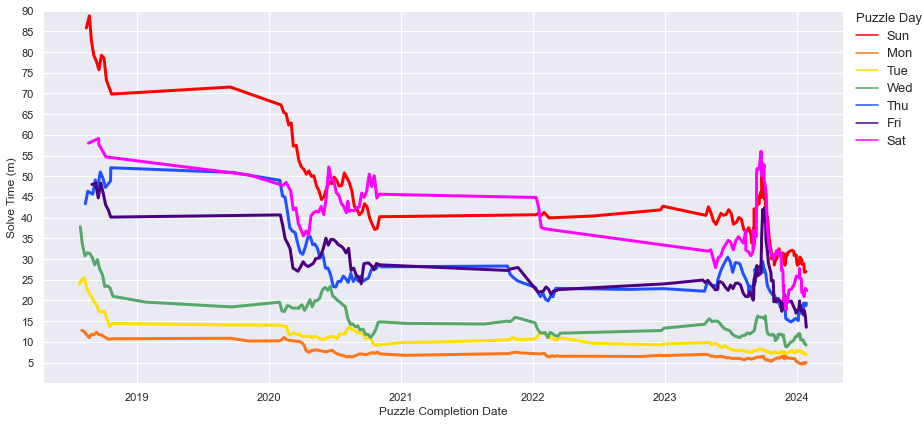

In [40]:
# Plot 10-puzzle moving average of IS2 Solve Times by Day of Week
#Figure2

sns.set(font_scale=1)

p = sns.relplot(
    data=df_IS2, marker = "", x="Comp_Date", y="IST(m)_10p_MA", hue="DOW", hue_order=["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], height=6, aspect=2, palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "indigo", "fuchsia"],
    kind="line", linewidth=3
).set(title="", 
    ylabel="Solve Time (m)",
    xlabel= "Puzzle Completion Date", yticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], ylim=[0,90]
)

# Modify legend
leg = p._legend
leg.set_title("Puzzle Day")
leg.set_bbox_to_anchor([.88, .975])  # coordinates of lower left of bounding box
leg.get_title().set_fontsize(13)
leg._loc = 2  # if required you can set the loc
leg.get_texts()[0].set_fontsize(13)
leg.get_texts()[0].set_text('Sun')
leg.get_texts()[1].set_fontsize(13)
leg.get_texts()[1].set_text('Mon')
leg.get_texts()[2].set_fontsize(13)
leg.get_texts()[2].set_text('Tue')
leg.get_texts()[3].set_fontsize(13)
leg.get_texts()[3].set_text('Wed')
leg.get_texts()[4].set_fontsize(13)
leg.get_texts()[4].set_text('Thu')
leg.get_texts()[5].set_fontsize(13)
leg.get_texts()[5].set_text('Fri')
leg.get_texts()[6].set_fontsize(13)
leg.get_texts()[6].set_text('Sat')
leg._legend_box.align = "left"  # or left, or center

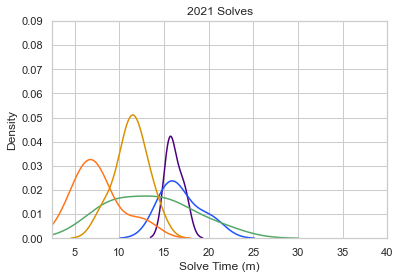

In [41]:
# Density Plot for 2021 Only 
# Figure 2
df1_2021 = df_IS2.loc[(df_IS2["Comp_Yr"] == "2021")]

df1_2021['plot_seq_map'] = df1_2021['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2021, x = "IST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 40)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40])
plt.title('2021 Solves')
ax.set_xlabel("Solve Time (m)")
plt.show()

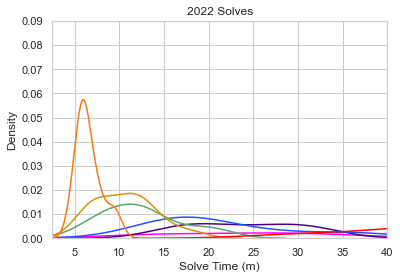

In [42]:
# Density Plot for 2022 Only 
# Figure 2
df1_2022 = df_IS2.loc[(df_IS2["Comp_Yr"] == "2022")]

df1_2022['plot_seq_map'] = df1_2022['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2022, x = "IST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 40)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40])
plt.title('2022 Solves')
ax.set_xlabel("Solve Time (m)")
plt.show()

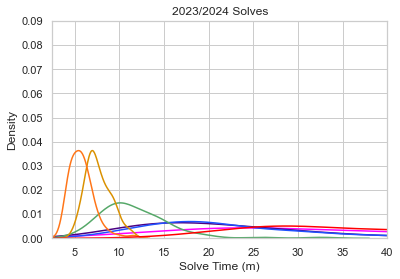

In [43]:
# Density Plot for 2023-2024 Only 
# Figure 2
df1_2023 = df_IS2.loc[(df_IS2["Comp_Yr"] == "2023") | (df_IS2["Comp_Yr"] == "2024")]

df1_2023['plot_seq_map'] = df1_2023['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df1_2023, x = "IST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 40)
plt.ylim(0, .09)
plt.xticks([5,10,15,20,25,30,35,40])
plt.title('2023/2024 Solves')
ax.set_xlabel("Solve Time (m)")
plt.show()

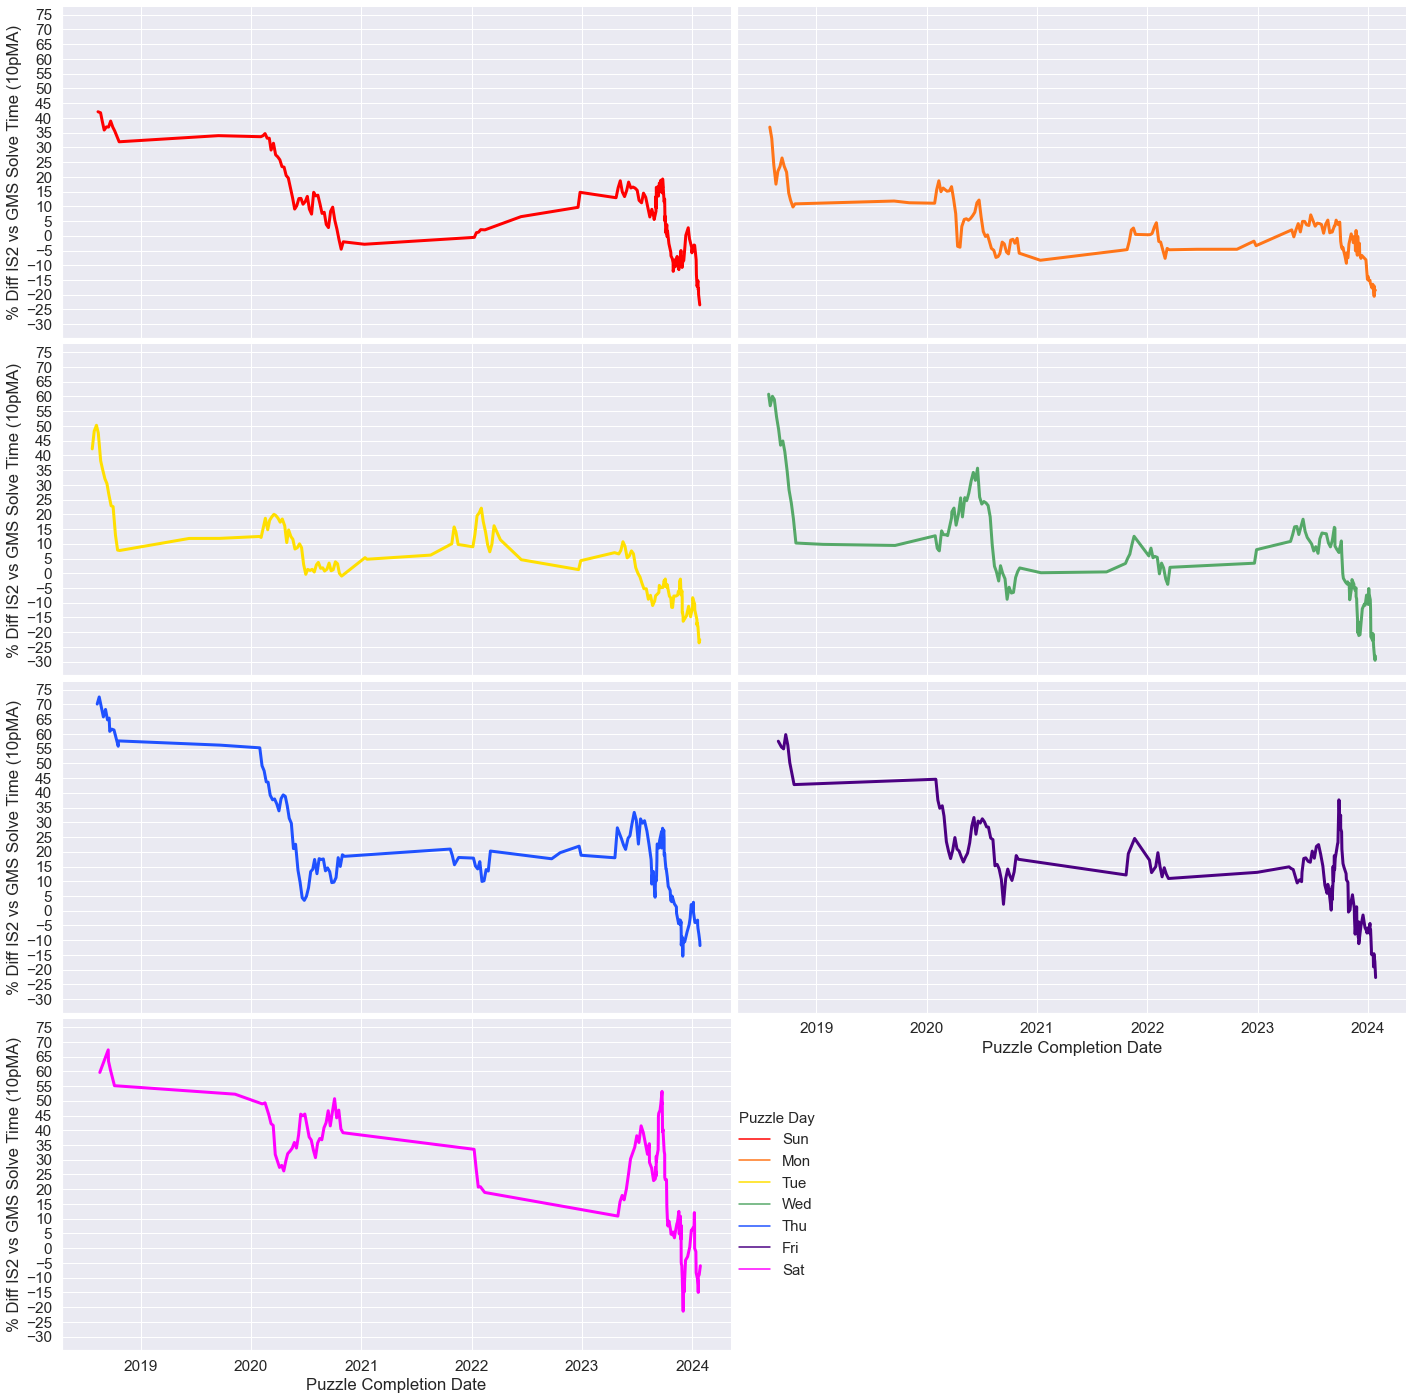

In [44]:
# Plot 10-puzzle moving average of % Difference in Individual Solve Times From Global Median Solve Times
# This normalizes for puzzle difficulty
# Supplmentary Figure 1

sns.set(font_scale=1.4)
#sns.set(rc={'axes.facecolor':'gray',"axes.grid":True,'xtick.labelsize':14,'ytick.labelsize':14})

p = sns.relplot(
    data=df_IS2, marker = "", x="Comp_Date", y="10pMA_of_IST_Diff%_from_GMST", hue="DOW", hue_order=["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], height=5, aspect=2, palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "indigo", "fuchsia"],
    kind="line", linewidth=3, col="DOW", col_wrap=2, col_order=["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"]
).set(title="", ylabel="% Diff IS2 vs GMS Solve Time (10pMA)",
    xlabel= "Puzzle Completion Date", yticks = [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
)

plt.subplots_adjust(wspace = 0.01) #decrease whitespace btwn subplot colums
plt.subplots_adjust(hspace = 0.02) #decrease whitespace btwn subplot rows

# # # Modify legend
leg = p._legend
leg.set_title("Puzzle Day")
leg.set_bbox_to_anchor([.46, .21])  # coordinates of lower left of bounding box
leg.get_title().set_fontsize(15)
leg._loc = 2  # if required you can set the loc
leg.get_texts()[0].set_fontsize(15)
leg.get_texts()[0].set_text('Sun')
leg.get_texts()[1].set_fontsize(15)
leg.get_texts()[1].set_text('Mon')
leg.get_texts()[2].set_fontsize(15)
leg.get_texts()[2].set_text('Tue')
leg.get_texts()[3].set_fontsize(15)
leg.get_texts()[3].set_text('Wed')
leg.get_texts()[4].set_fontsize(15)
leg.get_texts()[4].set_text('Thu')
leg.get_texts()[5].set_fontsize(15)
leg.get_texts()[5].set_text('Fri')
leg.get_texts()[6].set_fontsize(15)
leg.get_texts()[6].set_text('Sat')
leg._legend_box.align = "left"  # or left, or center

#title="10-Puzzle Moving Average of % Difference in Solve Times From Global Median Solve Times (Solver 1)", 

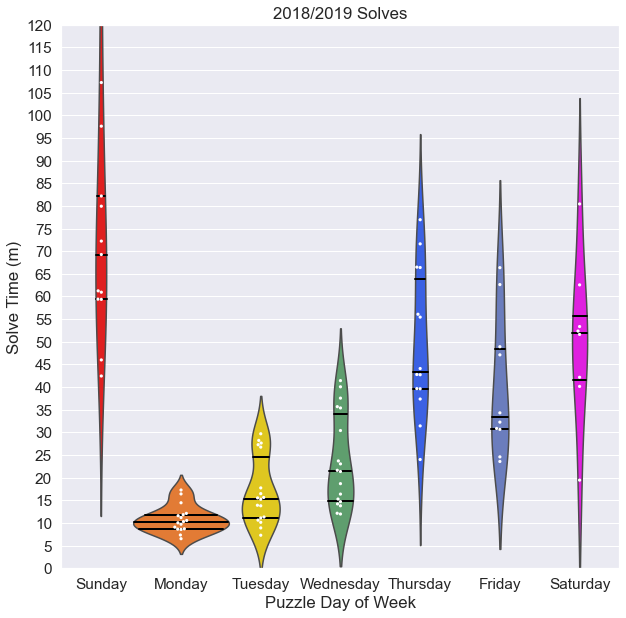

In [51]:
# Violin plots with swarm plot overlay by puzzle day 2018-2019 solves only

IS2_pre2020 = df_IS2.loc[df_IS2["Comp_Date_str"].str.contains("2018") | df_IS2["Comp_Date_str"].str.contains("2019")]

plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "IST(m)",data=IS2_pre2020 , size=3.2 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(IS2_pre2020['DOW'], IS2_pre2020['IST(m)'], width = 1.2, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 107.5)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2018/2019 Solves")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [46]:
# Calculate Median and IQR per puzzle day, for 2018/2019 solves
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Sunday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Monday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Tuesday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Wednesday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Thursday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Friday"), "IST(m)"].describe().round(1))
print(IS2_pre2020.loc[(IS2_pre2020["DOW"] == "Saturday"), "IST(m)"].describe().round(1))

count     13.0
mean      74.8
std       25.9
min       42.4
25%       59.4
50%       69.3
75%       82.2
max      135.0
Name: IST(m), dtype: float64
count    17.0
mean     10.9
std       3.0
min       6.5
25%       8.7
50%      10.3
75%      11.8
max      17.3
Name: IST(m), dtype: float64
count    18.0
mean     17.1
std       7.4
min       7.3
25%      11.2
50%      15.4
75%      24.5
max      29.7
Name: IST(m), dtype: float64
count    18.0
mean     23.8
std      10.3
min      12.0
25%      14.9
50%      21.5
75%      34.2
max      41.4
Name: IST(m), dtype: float64
count    14.0
mean     49.6
std      16.0
min      24.0
25%      39.6
50%      43.4
75%      63.8
max      77.0
Name: IST(m), dtype: float64
count    10.0
mean     40.1
std      15.3
min      23.6
25%      30.7
50%      33.3
75%      48.5
max      66.4
Name: IST(m), dtype: float64
count     8.0
mean     50.3
std      17.7
min      19.5
25%      41.7
50%      52.0
75%      55.7
max      80.4
Name: IST(m), dtype: float64


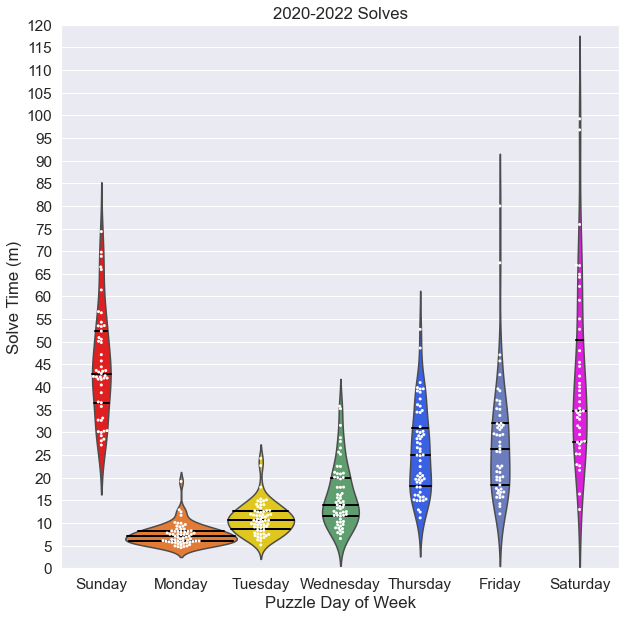

In [47]:
# Violin plots with swarm plot overlay by puzzle day 2020-2022 solves only

IS2_2022 = df_IS2.loc[df_IS2["Comp_Date_str"].str.contains("2020") | df_IS2["Comp_Date_str"].str.contains("2021") | df_IS2["Comp_Date_str"].str.contains("2022")]

plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "IST(m)",data=IS2_2022 , size=3.0 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(IS2_2022['DOW'], IS2_2022['IST(m)'], width = 1.4, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 120)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2020-2022 Solves")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [48]:
# Calculate Median and IQR per puzzle day, for 2020-2022 solves
print(IS2_2022.loc[(IS2_2022["DOW"] == "Sunday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Monday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Tuesday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Wednesday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Thursday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Friday"), "IST(m)"].describe().round(1))
print(IS2_2022.loc[(IS2_2022["DOW"] == "Saturday"), "IST(m)"].describe().round(1))

count    49.0
mean     44.9
std      11.9
min      27.2
25%      36.6
50%      43.0
75%      52.4
max      74.3
Name: IST(m), dtype: float64
count    62.0
mean      7.5
std       2.4
min       4.6
25%       5.9
50%       7.1
75%       8.2
max      19.2
Name: IST(m), dtype: float64
count    63.0
mean     11.0
std       3.5
min       5.2
25%       8.7
50%      10.6
75%      12.6
max      24.3
Name: IST(m), dtype: float64
count    61.0
mean     16.0
std       6.8
min       6.6
25%      11.5
50%      14.0
75%      20.0
max      35.8
Name: IST(m), dtype: float64
count    58.0
mean     25.9
std       9.6
min      11.1
25%      18.2
50%      25.0
75%      31.0
max      52.8
Name: IST(m), dtype: float64
count    53.0
mean     27.9
std      12.8
min      12.0
25%      18.4
50%      26.3
75%      32.0
max      80.0
Name: IST(m), dtype: float64
count    43.0
mean     41.6
std      19.5
min      13.0
25%      28.0
50%      34.8
75%      50.4
max      99.2
Name: IST(m), dtype: float64


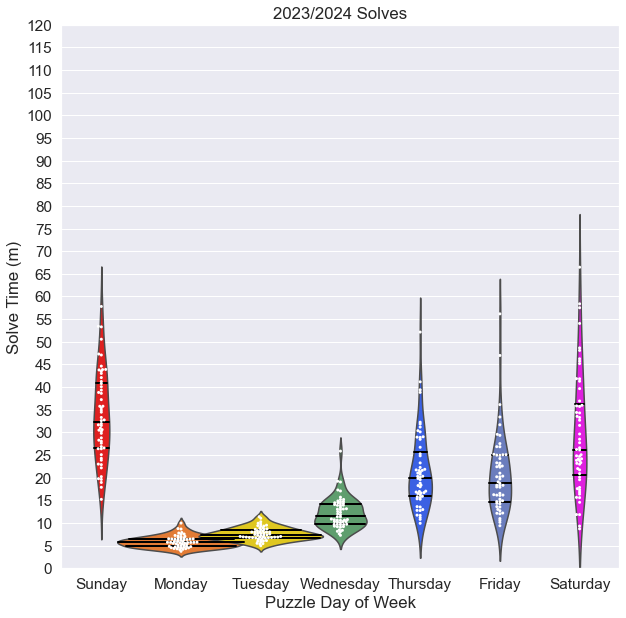

In [49]:
# Violin plots with swarm plot overlay by puzzle day -2023/4 only
sns.set(font_scale=1.4)

IS2_2023 = df_IS2.loc[df_IS2["P_Date_str"].str.contains("2023") | df_IS2["P_Date_str"].str.contains("2024")]

plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "IST(m)",data=IS2_2023 , size=3.0 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(IS2_2023['DOW'], IS2_2023['IST(m)'], width = 1.6, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 120)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2023/2024 Solves")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [50]:
# Calculate Median and IQR per puzzle day, for 2023/2024
print(IS2_2023.loc[(IS2_2023["DOW"] == "Sunday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Monday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Tuesday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Wednesday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Thursday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Friday"), "IST(m)"].describe().round(1))
print(IS2_2023.loc[(IS2_2023["DOW"] == "Saturday"), "IST(m)"].describe().round(1))

count    56.0
mean     33.7
std       9.9
min      15.2
25%      26.5
50%      32.3
75%      40.9
max      57.8
Name: IST(m), dtype: float64
count    56.0
mean      5.9
std       1.3
min       3.8
25%       4.8
50%       5.7
75%       6.5
max      10.0
Name: IST(m), dtype: float64
count    56.0
mean      7.6
std       1.4
min       5.0
25%       6.8
50%       7.4
75%       8.5
max      11.4
Name: IST(m), dtype: float64
count    56.0
mean     12.3
std       3.4
min       7.3
25%       9.7
50%      11.6
75%      14.2
max      25.9
Name: IST(m), dtype: float64
count    56.0
mean     21.5
std       8.5
min       9.9
25%      15.9
50%      20.0
75%      25.6
max      52.2
Name: IST(m), dtype: float64
count    56.0
mean     20.7
std       8.6
min       9.4
25%      14.7
50%      18.9
75%      25.0
max      56.2
Name: IST(m), dtype: float64
count    56.0
mean     29.7
std      13.1
min       8.7
25%      20.7
50%      26.2
75%      36.2
max      66.5
Name: IST(m), dtype: float64


###  Partition of 2023-2024 Data Only

In [52]:
df_recent = df_IS2.loc[(df_IS2["Comp_Date"] >='04/01/2023')]

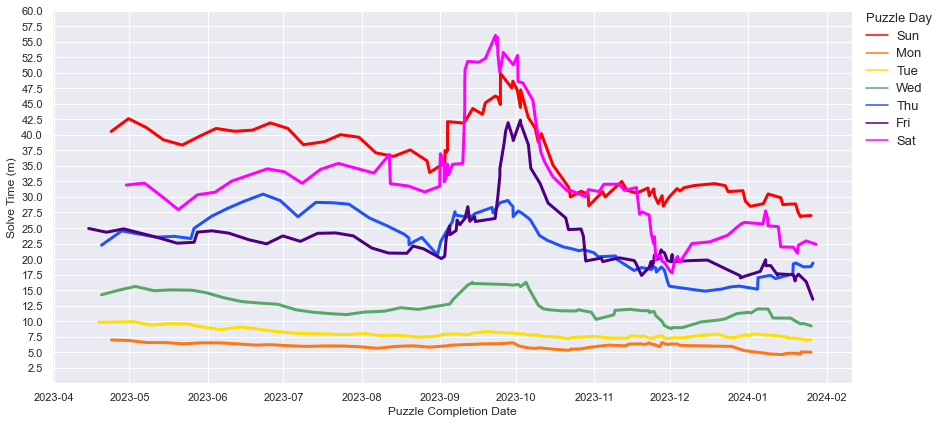

In [56]:
# Plot 10-puzzle moving average of IS2 Solve Times by Day of Week

sns.set(font_scale=1)

p = sns.relplot(
    data=df_recent, marker = "", x="Comp_Date", y="IST(m)_10p_MA", hue="DOW", hue_order=["Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], height=6, aspect=2, palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "indigo", "fuchsia"],
    kind="line", linewidth=3
).set(title="", 
    ylabel="Solve Time (m)",
    xlabel= "Puzzle Completion Date", yticks = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60], ylim=[0,60]
)

# Modify legend
leg = p._legend
leg.set_title("Puzzle Day")
leg.set_bbox_to_anchor([.89, .975])  # coordinates of lower left of bounding box
leg.get_title().set_fontsize(13)
leg._loc = 2  # if required you can set the loc
leg.get_texts()[0].set_fontsize(13)
leg.get_texts()[0].set_text('Sun')
leg.get_texts()[1].set_fontsize(13)
leg.get_texts()[1].set_text('Mon')
leg.get_texts()[2].set_fontsize(13)
leg.get_texts()[2].set_text('Tue')
leg.get_texts()[3].set_fontsize(13)
leg.get_texts()[3].set_text('Wed')
leg.get_texts()[4].set_fontsize(13)
leg.get_texts()[4].set_text('Thu')
leg.get_texts()[5].set_fontsize(13)
leg.get_texts()[5].set_text('Fri')
leg.get_texts()[6].set_fontsize(13)
leg.get_texts()[6].set_text('Sat')
leg._legend_box.align = "left"  # or left, or center

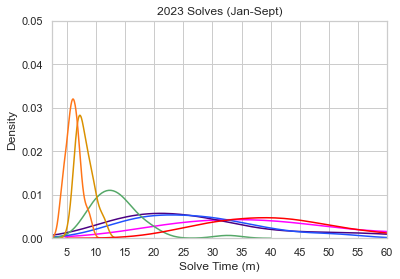

In [57]:
# Density Plot for 01/01/2023-09/30/2023 only 
df2_2023_2024_1 = df_recent.loc[(df_recent["Comp_Date"] <'10/01/2023')]

df2_2023_2024_1['plot_seq_map'] = df2_2023_2024_1['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df2_2023_2024_1, x = "IST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .05)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2023 Solves (Jan-Sept)')
ax.set_xlabel("Solve Time (m)")
plt.show()

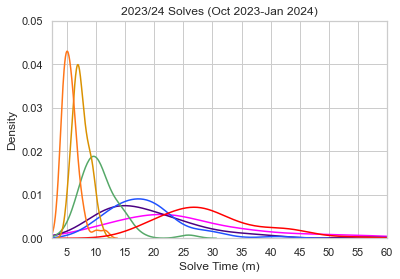

In [58]:
# Density Plot for 10/01/2023-01/21/2024 only 
df2_2023_2024_2 = df_recent.loc[(df_recent["Comp_Date"] >='10/01/2023')]

df2_2023_2024_2['plot_seq_map'] = df2_2023_2024_2['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
sns.set(style="whitegrid")
ax = sns.kdeplot(data=df2_2023_2024_2, x = "IST(m)", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], hue_order=["Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat"], legend=False)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(2.5, 60)
plt.ylim(0, .05)
plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60])
plt.title('2023/24 Solves (Oct 2023-Jan 2024)')
ax.set_xlabel("Solve Time (m)")
plt.show()

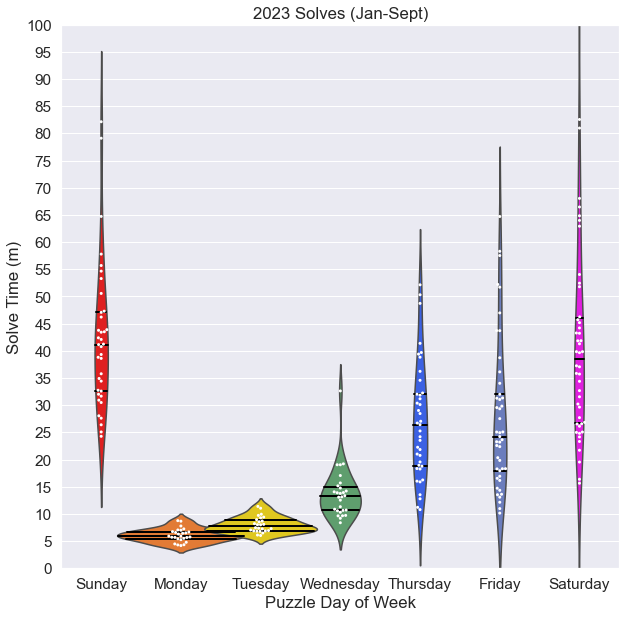

In [59]:
# Violin plots with swarm plot overlay by puzzle day -2023 first interval only
sns.set(font_scale=1.4)

plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "IST(m)",data=df2_2023_2024_1, size=3.0 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(df2_2023_2024_1['DOW'], df2_2023_2024_1['IST(m)'], width = 1.6, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 100)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2023 Solves (Jan-Sept)")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

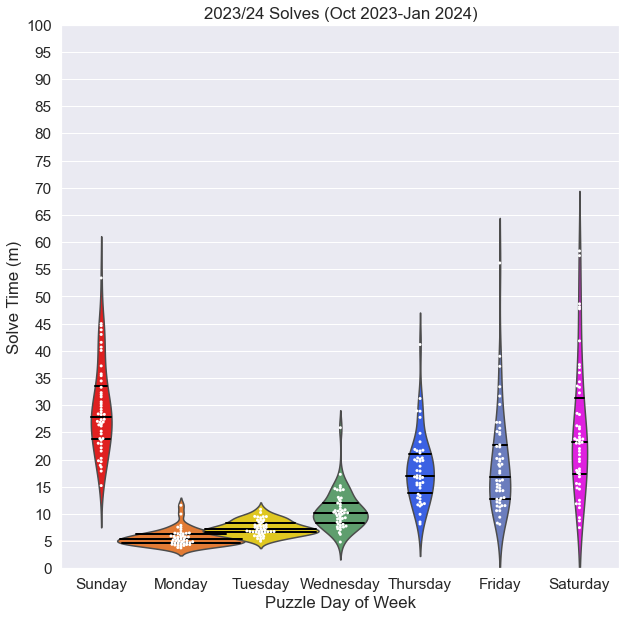

In [60]:
# Violin plots with swarm plot overlay by puzzle day -2023-2024 second interval only
sns.set(font_scale=1.4)

plt.figure(figsize=(10,10))
sns.swarmplot(x="DOW" , y = "IST(m)",data=df2_2023_2024_2, size=3.0 , order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], color="White")
ax = sns.violinplot(df2_2023_2024_2['DOW'], df2_2023_2024_2['IST(m)'], width = 1.6, inner = "quartile", order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], palette = ["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"])
plt.ylim(0, 100)
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
ax.set_xlabel("Puzzle Day of Week")
ax.set_ylabel("Solve Time (m)")
ax.set_title("2023/24 Solves (Oct 2023-Jan 2024)")

for l in ax.lines:
    l.set_linestyle('-')
    l.set_linewidth(2)
    l.set_color('black')
    l.set_alpha(1)
plt.show()

In [61]:
# Calculate Median and IQR per puzzle day, for 2023/2024 first interval
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Sunday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Monday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Tuesday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Wednesday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Thursday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Friday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_1.loc[(df2_2023_2024_1["DOW"] == "Saturday"), "IST(m)"].describe().round(1))

count    37.0
mean     42.3
std      13.4
min      24.3
25%      32.6
50%      41.2
75%      47.1
max      82.2
Name: IST(m), dtype: float64
count    26.0
mean      6.1
std       1.2
min       4.2
25%       5.5
50%       5.9
75%       6.7
max       8.8
Name: IST(m), dtype: float64
count    26.0
mean      8.0
std       1.4
min       6.0
25%       6.9
50%       7.7
75%       8.9
max      11.4
Name: IST(m), dtype: float64
count    28.0
mean     13.8
std       4.8
min       8.4
25%      10.6
50%      13.2
75%      14.9
max      32.6
Name: IST(m), dtype: float64
count    39.0
mean     27.1
std      10.7
min      10.8
25%      18.9
50%      26.4
75%      32.1
max      52.2
Name: IST(m), dtype: float64
count    45.0
mean     27.8
std      13.8
min      10.2
25%      18.0
50%      24.2
75%      32.0
max      64.7
Name: IST(m), dtype: float64
count     46.0
mean      41.4
std       19.2
min       15.6
25%       26.7
50%       38.5
75%       46.1
max      110.8
Name: IST(m), dtype: float64


In [62]:
# Calculate Median and IQR per puzzle day, for 2023/2024 second interval
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Sunday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Monday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Tuesday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Wednesday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Thursday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Friday"), "IST(m)"].describe().round(1))
print(df2_2023_2024_2.loc[(df2_2023_2024_2["DOW"] == "Saturday"), "IST(m)"].describe().round(1))

count    48.0
mean     29.5
std       8.3
min      15.2
25%      23.8
50%      27.8
75%      33.6
max      53.4
Name: IST(m), dtype: float64
count    47.0
mean      5.6
std       1.5
min       3.8
25%       4.7
50%       5.4
75%       6.3
max      11.6
Name: IST(m), dtype: float64
count    48.0
mean      7.4
std       1.4
min       5.0
25%       6.6
50%       7.2
75%       8.4
max      10.8
Name: IST(m), dtype: float64
count    48.0
mean     10.6
std       3.5
min       4.8
25%       8.4
50%      10.1
75%      12.1
max      25.9
Name: IST(m), dtype: float64
count    46.0
mean     18.3
std       6.3
min       8.2
25%      13.9
50%      17.0
75%      21.0
max      41.2
Name: IST(m), dtype: float64
count    50.0
mean     19.3
std       9.1
min       8.1
25%      12.8
50%      16.9
75%      22.6
max      56.2
Name: IST(m), dtype: float64
count    50.0
mean     25.2
std      12.1
min       7.5
25%      17.4
50%      23.3
75%      31.3
max      58.4
Name: IST(m), dtype: float64


In [63]:
# Number of solves in each sub-interview in figure 4
print(len(df2_2023_2024_1))
print(len(df2_2023_2024_2))

247
337


## IS2 Performance vs Global Median Solver

In [ ]:
df_IS2["plot_seq"].unique()

In [64]:
# Create new df with all rows copied and placed below current rows. 
# This is so we can plot all data together as its own subplot 

df_IS2_copy = df_IS2.copy()
df_IS2_copy["DOW"] = "All"

df_IS2_v2 = pd.concat([df_IS2, df_IS2_copy],ignore_index=True)

In [65]:
# Construct numerical categories in desired plotting sequence for combinations of puzzle day and pre-2023 or 2023+
# This is a hack to be able to use lmplot with subplot split and get regression lines - need to figure out more elegant solution

# A numerical column for puzzle day that starts with Sunday and ends with Saturday
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "All") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 1 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "All") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 2
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Sunday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 3 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Sunday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 4
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Monday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 5 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Monday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 6
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Tuesday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 7 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Tuesday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 8
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Wednesday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 9 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Wednesday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 10
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Thursday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 11 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Thursday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 12
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Friday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 13
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Friday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 14
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Saturday") & (df_IS2_v2["2023+_solve"] == 0) , "plot_seq"] = 15 
df_IS2_v2.loc[(df_IS2_v2["DOW"] == "Saturday") & (df_IS2_v2["2023+_solve"] == 1) , "plot_seq"] = 16

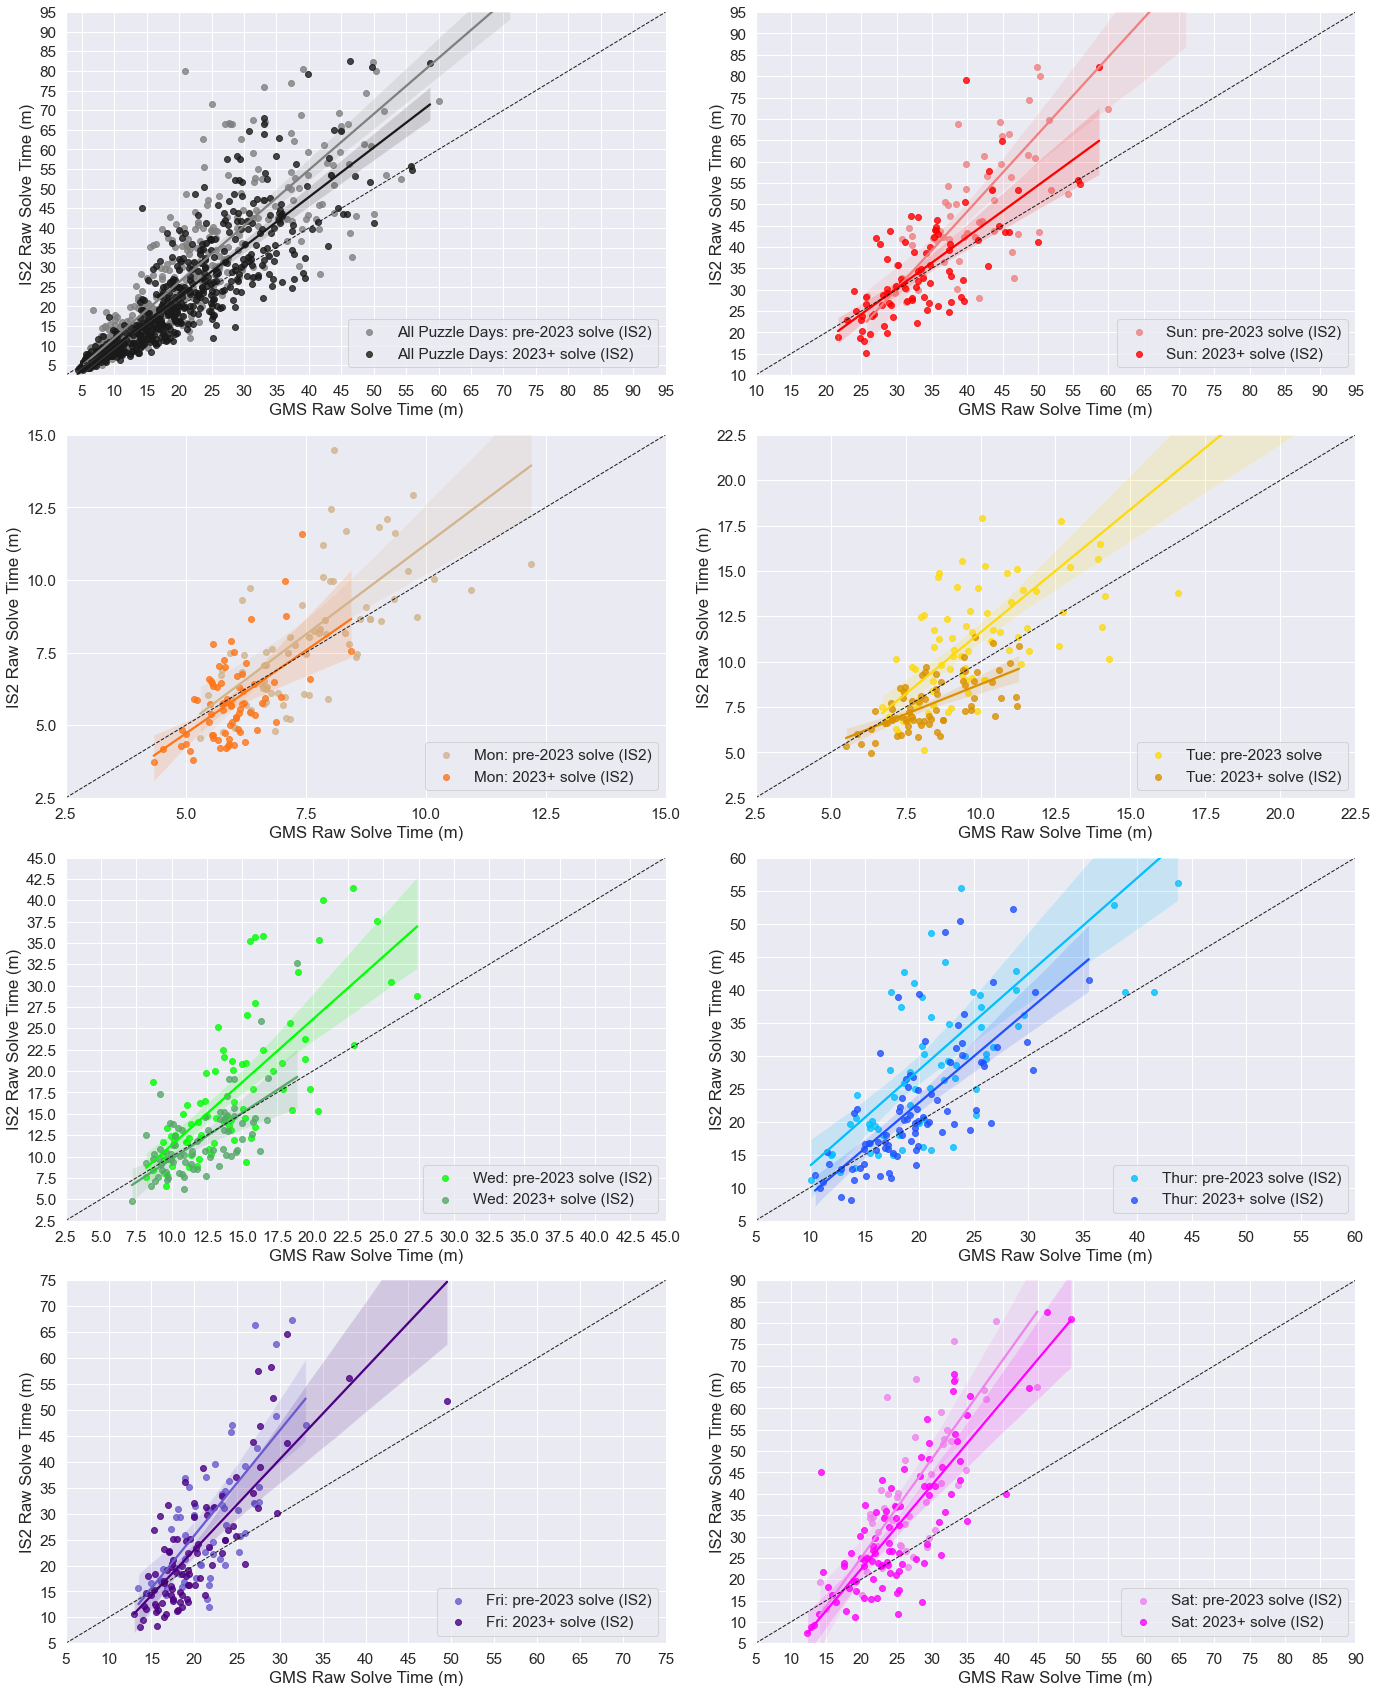

In [66]:
# Scatterplots of individual raw solve times vs global median solve times, per puzzle day
#Figure 4

df_IS2_v2 = df_IS2_v2.sort_values(by=['plot_seq'], ascending = True)

sns.set(font_scale=1.4)

df_IS2_v2['plot_seq_map'] = df_IS2_v2['plot_seq'].map({1: 'All Puzzle Days: pre-2023 solve (IS2)', 2: 'All Puzzle Days: 2023+ solve (IS2)', 3:'Sun: pre-2023 solve (IS2)', 4:'Sun: 2023+ solve (IS2)', 5:'Mon: pre-2023 solve (IS2)', 6:'Mon: 2023+ solve (IS2)', 7:'Tue: pre-2023 solve', 8:'Tue: 2023+ solve (IS2)', 9:'Wed: pre-2023 solve (IS2)', 10:'Wed: 2023+ solve (IS2)', 11:'Thur: pre-2023 solve (IS2)', 12:'Thur: 2023+ solve (IS2)', 13:'Fri: pre-2023 solve (IS2)', 14:'Fri: 2023+ solve (IS2)', 15:'Sat: pre-2023 solve (IS2)', 16:'Sat: 2023+ solve (IS2)'})

#sequence = {0:'pre-2023 solve', 1:'2023 solve', 2:'pre-2023 solve', 3:'2023 solve', 4:'pre-2023 solve', 5:'2023 solve', 6:'pre-2023 solve', 7:'2023 solve', 8:'pre-2023 solve', 9:'2023 solve', 10:'pre-2023 solve', 11:'2023 solve', 12:'pre-2023 solve', 13:'2023 solve'}

p = sns.lmplot(
    data=df_IS2_v2, x="GMST(m)", y="IST(m)", hue="plot_seq_map", col="DOW", col_order=["All", "Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], col_wrap=2, palette=["grey", "k", "lightcoral", "red", "tan", "#FF7518", "#FDDA0D", "#da9100", "lime", "g", "deepskyblue", "#1F51FF", "slateblue", "indigo", "violet", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False
).set(title="", xlabel= "GMS Raw Solve Time (m)", xticks = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85], yticks = [2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85],  
    ylabel="IS2 Raw Solve Time (m)" 
)

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

#Adjust subplots individually
p.axes[0].set_ylim((2.5,95))
p.axes[0].set_xlim((2.5,95))
p.axes[1].set_ylim((12.5,95))
p.axes[1].set_xlim((12.5,95))
p.axes[2].set_ylim((2.5,15))
p.axes[2].set_xlim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[3].set_xlim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[4].set_xlim((2.5,45))
p.axes[5].set_ylim((5,60))
p.axes[5].set_xlim((5,60))
p.axes[6].set_ylim((5,75))
p.axes[6].set_xlim((5,75))
p.axes[7].set_ylim((5,90))
p.axes[7].set_xlim((5,90))

p.axes[0].set_xticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95))
p.axes[0].set_yticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95))
p.axes[1].set_xticks((10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95))
p.axes[1].set_yticks((10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95))
p.axes[5].set_xticks((5,10,15,20,25,30,35,40,45,50,55,60))
p.axes[5].set_yticks((5,10,15,20,25,30,35,40,45,50,55,60))
p.axes[6].set_xticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75))
p.axes[6].set_yticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75))
p.axes[7].set_xticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90))
p.axes[7].set_yticks((5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90))

p.axes[0].plot([2.5, 95], [2.5, 95], 'k', linestyle='dashed', linewidth=1)
p.axes[1].plot([10, 95], [10, 95], 'k', linestyle='dashed', linewidth=1)
p.axes[2].plot([2.5, 15], [2.5, 15], 'k', linestyle='dashed', linewidth=1)
p.axes[3].plot([2.5, 22.5], [2.5, 22.5], 'k', linestyle='dashed', linewidth=1)
p.axes[4].plot([2.5, 45], [2.5, 45], 'k', linestyle='dashed', linewidth=1)
p.axes[5].plot([5, 60], [5, 60], 'k', linestyle='dashed', linewidth=1)
p.axes[6].plot([5, 75], [5, 75], 'k', linestyle='dashed', linewidth=1)
p.axes[7].plot([5, 90], [5, 90], 'k', linestyle='dashed', linewidth=1)

_= p.axes[0].legend(loc="lower right")
_= p.axes[1].legend(loc="lower right")
_= p.axes[2].legend(loc="lower right")
_= p.axes[3].legend(loc="lower right")
_= p.axes[4].legend(loc="lower right")
_= p.axes[5].legend(loc="lower right")
_= p.axes[6].legend(loc="lower right")
_= p.axes[7].legend(loc="lower right")

In [69]:
# Correlations for pre-2023 for IST vs GMST
# Careful not to use _v2, since that version has duplicated data for plotting only

df_IS2_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0)] #pre-2023 solves only
df_All = df_IS2_pre2023.copy() #all puzzle days
df_Sun = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Sunday")]
df_Mon = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Monday")]
df_Tue = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Tuesday")]
df_Wed = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Wednesday")]
df_Thu = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Thursday")]
df_Fri = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Friday")]
df_Sat = df_IS2_pre2023.loc[df_IS2_pre2023["DOW"]==("Saturday")]

print(df_All['IST(m)'].corr(df_All['GMST(m)']))
print(df_Sun['IST(m)'].corr(df_Sun['GMST(m)']))
print(df_Mon['IST(m)'].corr(df_Mon['GMST(m)']))
print(df_Tue['IST(m)'].corr(df_Tue['GMST(m)']))
print(df_Wed['IST(m)'].corr(df_Wed['GMST(m)']))
print(df_Thu['IST(m)'].corr(df_Thu['GMST(m)']))
print(df_Fri['IST(m)'].corr(df_Fri['GMST(m)']))
print(df_Sat['IST(m)'].corr(df_Sat['GMST(m)']))

0.8770678379382572
0.8163405670727236
0.6028254804444723
0.8006403192036122
0.7275313134707446
0.6793666331252081
0.6009940758329722
0.7812231261969627


In [70]:
# Correlations for 2023_24 for IST vs GMST
# Careful not to use _v2, since that version has duplicated data for plotting only

df_IS2_2023_24 = df_IS2.loc[(df_IS2["2023+_solve"] == 1)] #2023-2024 solves only
df_All = df_IS2_2023_24.copy() #all puzzle days
df_Sun = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Sunday")]
df_Mon = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Monday")]
df_Tue = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Tuesday")]
df_Wed = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Wednesday")]
df_Thu = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Thursday")]
df_Fri = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Friday")]
df_Sat = df_IS2_2023_24.loc[df_IS2_2023_24["DOW"]==("Saturday")]

print(df_All['IST(m)'].corr(df_All['GMST(m)']))
print(df_Sun['IST(m)'].corr(df_Sun['GMST(m)']))
print(df_Mon['IST(m)'].corr(df_Mon['GMST(m)']))
print(df_Tue['IST(m)'].corr(df_Tue['GMST(m)']))
print(df_Wed['IST(m)'].corr(df_Wed['GMST(m)']))
print(df_Thu['IST(m)'].corr(df_Thu['GMST(m)']))
print(df_Fri['IST(m)'].corr(df_Fri['GMST(m)']))
print(df_Sat['IST(m)'].corr(df_Sat['GMST(m)']))

0.8655652679495889
0.7281449971310319
0.5424591116209113
0.6381376286940382
0.6460894970280298
0.7116849355095519
0.7915292724873574
0.805599919582664


In [71]:
# IS2 vs GMS by Puzzle Day: pre-2023 solves
# Careful not to use _v2, since that version has duplicated data for plotting only

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
All_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(All_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Sun_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Sun_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Mon_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Mon_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Tue_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Tue_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Wed_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Wed_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Thu_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Thu_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Fri_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Fri_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Sat_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Sat_IST_win_pct)


28.74743326488706
24.193548387096776
48.10126582278481
34.5679012345679
29.11392405063291
20.833333333333336
22.22222222222222
13.725490196078432


In [72]:
# Win % for IS2 vs GMS by Puzzle Day: 2023_2024 solves
# Careful not to use _v2, since that version has duplicated data for plotting only

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
All_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(All_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Sun_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Sun_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Mon_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Mon_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Tue_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Tue_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Wed_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Wed_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Thu_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Thu_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Fri_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Fri_IST_win_pct)

IST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] < df_IS2["GMST(m)"])])
GMST_wins = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] > df_IS2["GMST(m)"])])
Ties = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST(m)"] == df_IS2["GMST(m)"])])
Sat_IST_win_pct = (IST_wins/(IST_wins + GMST_wins + Ties))*100
print(Sat_IST_win_pct)


50.0
49.411764705882355
65.75342465753424
71.62162162162163
57.89473684210527
41.17647058823529
43.15789473684211
30.208333333333332


In [73]:
# Mean difference for raw IST vs GMST pre2023 
# Careful not to use _v2, since that version has duplicated data for plotting only

df_IS2['IST_raw_Diff_GMST'] = (df_IS2['IST(m)'] - df_IS2['GMST(m)'])

print(df_IS2.loc[(df_IS2["2023+_solve"] == 0), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))

           mean
            std
mean   6.069336
std   10.519281
           mean
            std
mean   9.600806
std   13.559060
          mean
           std
mean  0.635021
std   2.303007
          mean
           std
mean  1.806173
std   3.354279
          mean
           std
mean  3.386709
std   6.057106
           mean
            std
mean   8.666435
std   11.076803
           mean
            std
mean   7.851323
std   11.811047
           mean
            std
mean  15.252614
std   14.760928


In [74]:
# Mean difference for raw IST vs GMST 2023_2024 
# Careful not to use _v2, since that version has duplicated data for plotting only
#df_IS2['IST_raw_Diff_GMST'] = (df_IS2['IST(m)'] - df_IS2['GMST(m)'])

print(df_IS2.loc[(df_IS2["2023+_solve"] == 1), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))
print(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday"), "IST_raw_Diff_GMST"].agg([('mean', 'std')]))

          mean
           std
mean  2.194720
std   8.083301
          mean
           std
mean  1.117843
std   8.711807
          mean
           std
mean -0.150913
std   1.193607
          mean
           std
mean -0.667793
std   1.183587
          mean
           std
mean -0.144518
std   3.256906
          mean
           std
mean  2.719412
std   7.023835
          mean
           std
mean  3.119298
std   8.557668
           mean
            std
mean   7.610764
std   12.668372


In [ ]:
#df_IS1 = df_IS1.drop(["IST_raw_Diff_GMST"], axis=1, inplace=True)

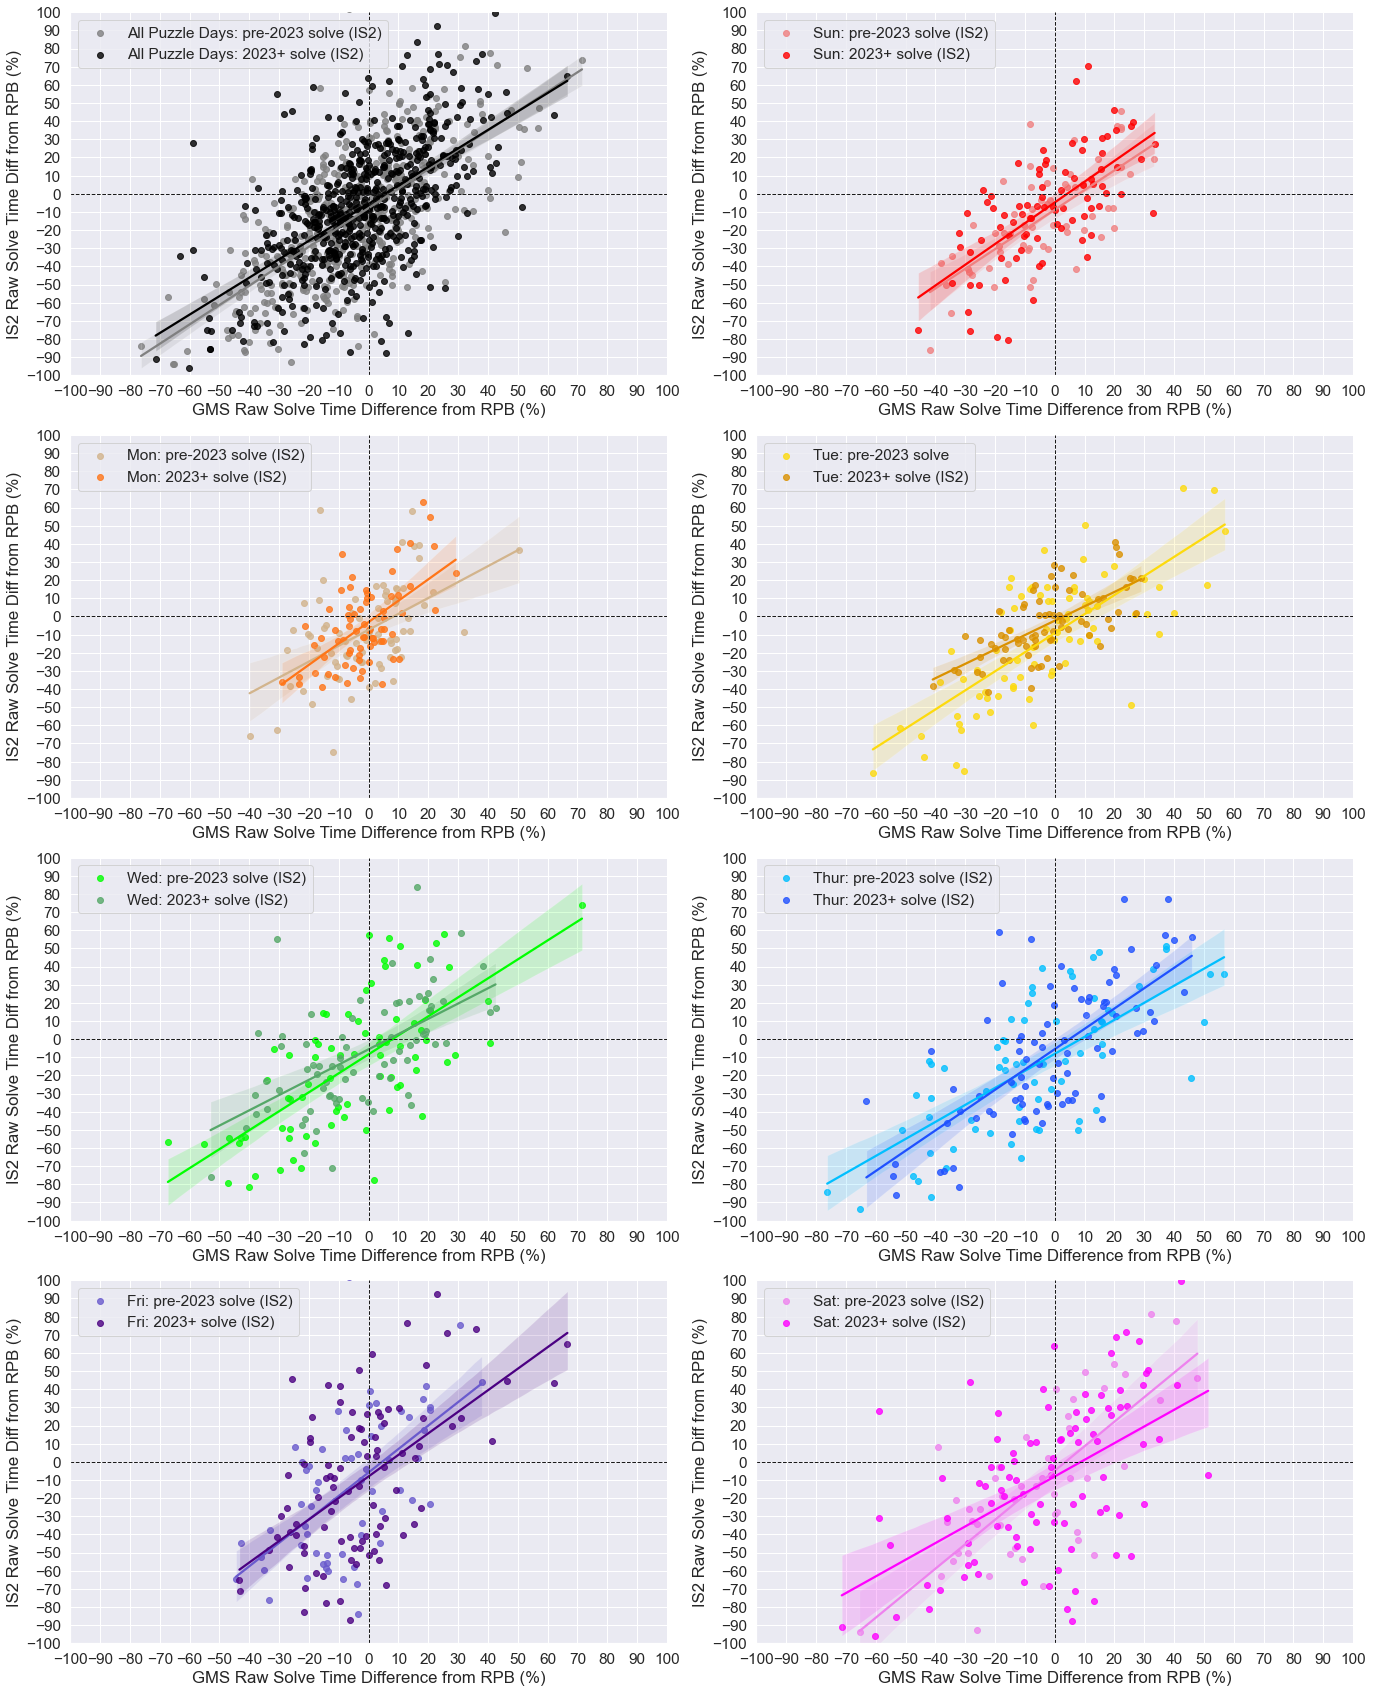

In [75]:
# Scatterplots of difference from time-decay weighted previous 20-puzzle average for individual solver for a given solve vs same for global median solver, per puzzle day
# This isolates RELATIVE performance for the individual solver on a given puzzle vs their recent performance, and how that relative performance compares to that for the median solver

df_IS2_v2 = df_IS2_v2.sort_values(by=['plot_seq'], ascending = True)

sns.set(font_scale=1.4)

df_IS2_v2['plot_seq_map'] = df_IS2_v2['plot_seq'].map({1: 'All Puzzle Days: pre-2023 solve (IS2)', 2: 'All Puzzle Days: 2023+ solve (IS2)', 3:'Sun: pre-2023 solve (IS2)', 4:'Sun: 2023+ solve (IS2)', 5:'Mon: pre-2023 solve (IS2)', 6:'Mon: 2023+ solve (IS2)', 7:'Tue: pre-2023 solve', 8:'Tue: 2023+ solve (IS2)', 9:'Wed: pre-2023 solve (IS2)', 10:'Wed: 2023+ solve (IS2)', 11:'Thur: pre-2023 solve (IS2)', 12:'Thur: 2023+ solve (IS2)', 13:'Fri: pre-2023 solve (IS2)', 14:'Fri: 2023+ solve (IS2)', 15:'Sat: pre-2023 solve (IS2)', 16:'Sat: 2023+ solve (IS2)'})

#sequence = {0:'pre-2023 solve', 1:'2023 solve', 2:'pre-2023 solve', 3:'2023 solve', 4:'pre-2023 solve', 5:'2023 solve', 6:'pre-2023 solve', 7:'2023 solve', 8:'pre-2023 solve', 9:'2023 solve', 10:'pre-2023 solve', 11:'2023 solve', 12:'pre-2023 solve', 13:'2023 solve'}

p = sns.lmplot(
    data=df_IS2_v2, x="GMST_Diff%_from_GMS_pds_l20_dw", y="IST_Diff%_from_IS_pds_l20_dw", hue="plot_seq_map", col="DOW", col_order=["All", "Sunday", "Monday", "Tuesday","Wednesday", "Thursday", "Friday", "Saturday"], col_wrap=2, palette=["grey","black","lightcoral", "red", "tan", "#FF7518", "#FDDA0D", "#da9100", "lime", "g", "deepskyblue", "#1F51FF", "slateblue", "indigo", "violet", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False
).set(title="", xlabel= "GMS Raw Solve Time Difference from RPB (%)",
    ylabel="IS2 Raw Solve Time Diff from RPB (%)", xticks = [-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100], yticks = [-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100]  
)

#Adjust subplots individually
p.axes[0].set_ylim((-100,100))
p.axes[0].set_xlim((-100,100))
p.axes[1].set_ylim((-100,100))
p.axes[1].set_xlim((-100,100))
p.axes[2].set_ylim((-100,100))
p.axes[2].set_xlim((-100,100))
p.axes[3].set_ylim((-100,100))
p.axes[3].set_xlim((-100,100))
p.axes[4].set_ylim((-100,100))
p.axes[4].set_xlim((-100,100))
p.axes[5].set_ylim((-100,100))
p.axes[5].set_xlim((-100,100))
p.axes[6].set_ylim((-100,100))
p.axes[6].set_xlim((-100,100))
p.axes[7].set_ylim((-100,100))
p.axes[7].set_xlim((-100,100))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

p.axes[0].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[0].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[1].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[1].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[2].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[2].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[3].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[3].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[4].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[4].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[5].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[5].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[6].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[6].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)
p.axes[7].plot([0, 0], [-100, 100], 'k', linestyle='dashed', linewidth=1)
p.axes[7].plot([-100, 100], [0, 0], 'k', linestyle='dashed', linewidth=1)

_= p.axes[0].legend(loc = 'upper left')
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [ ]:
df_IS2.info()

In [76]:
#Quadrant Analysis pre-2023 (note: very very rare exact zero difference puzzles are ignored for this calculation)
# Careful not to use _v2, since that version has duplicated data for plotting only

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

48.75 24.791666666666668 10.0 16.458333333333332
52.459016393442624 22.950819672131146 9.836065573770492 14.754098360655737
41.02564102564102 25.64102564102564 7.6923076923076925 25.64102564102564
43.75 27.500000000000004 15.0 13.750000000000002
47.43589743589743 23.076923076923077 7.6923076923076925 21.794871794871796
53.52112676056338 25.352112676056336 8.450704225352112 12.676056338028168
51.61290322580645 24.193548387096776 14.516129032258066 9.67741935483871
56.00000000000001 24.0 6.0 14.000000000000002


In [77]:
#Quadrant Analysis 2023+ (note: very very rare exact zero difference puzzles are ignored for this calculation)

# Careful not to use _v2, since that version has duplicated data for plotting only

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

Upper_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Lower_Left = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] < 0)])
Upper_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] > 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
Lower_Right = len(df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday") & (df_IS2["IST_Diff%_from_IS_pds_l20_dw"] < 0) & (df_IS2["GMST_Diff%_from_GMS_pds_l20_dw"] > 0)])
                 
Upper_Left_pct = (Upper_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Left_pct = (Lower_Left/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Upper_Right_pct = (Upper_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
Lower_Right_pct = (Lower_Right/(Upper_Left + Lower_Left + Upper_Right + Lower_Right))*100
print(Lower_Left_pct, Upper_Right_pct, Upper_Left_pct, Lower_Right_pct)

43.83561643835616 26.88356164383562 13.013698630136986 16.267123287671232
45.88235294117647 29.411764705882355 9.411764705882353 15.294117647058824
41.0958904109589 19.17808219178082 17.80821917808219 21.91780821917808
47.2972972972973 22.972972972972975 16.216216216216218 13.513513513513514
44.73684210526316 28.947368421052634 9.210526315789473 17.105263157894736
42.35294117647059 31.76470588235294 10.588235294117647 15.294117647058824
45.26315789473684 25.263157894736842 15.789473684210526 13.684210526315791
40.625 29.166666666666668 12.5 17.708333333333336


In [79]:
# Correlation analysis pre-2023
# Careful not to use _v2, since that version has duplicated data for plotting only

All_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"]==0)]
print(All_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(All_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Sun_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Sunday")]
print(Sun_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Sun_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Mon_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Monday")]
print(Mon_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Mon_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Tue_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Tuesday")]
print(Tue_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Tue_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Wed_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Wednesday")]
print(Wed_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Wed_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Thu_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Thursday")]
print(Thu_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Thu_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Fri_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Friday")]
print(Fri_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Fri_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

Sat_pre2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 0) & (df_IS2["DOW"] == "Saturday")]
print(Sat_pre2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Sat_pre2023['IST_Diff%_from_IS_pds_l20_dw']))

0.67208991423627
0.7061261933366404
0.5040374604673016
0.7389965727818268
0.6778224832945334
0.701669720253108
0.5803840556812582
0.7439994434872373


In [80]:
# Correlation analysis 2023+
# Careful not to use _v2, since that version has duplicated data for plotting only

All_2023 = df_IS2.loc[(df_IS2["2023+_solve"]==1)]
print(All_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(All_2023['IST_Diff%_from_IS_pds_l20_dw']))

Sun_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Sunday")]
print(Sun_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Sun_2023['IST_Diff%_from_IS_pds_l20_dw']))

Mon_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Monday")]
print(Mon_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Mon_2023['IST_Diff%_from_IS_pds_l20_dw']))

Tue_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Tuesday")]
print(Tue_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Tue_2023['IST_Diff%_from_IS_pds_l20_dw']))

Wed_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Wednesday")]
print(Wed_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Wed_2023['IST_Diff%_from_IS_pds_l20_dw']))

Thu_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Thursday")]
print(Thu_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Thu_2023['IST_Diff%_from_IS_pds_l20_dw']))

Fri_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Friday")]
print(Fri_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Fri_2023['IST_Diff%_from_IS_pds_l20_dw']))

Sat_2023 = df_IS2.loc[(df_IS2["2023+_solve"] == 1) & (df_IS2["DOW"] == "Saturday")]
print(Sat_2023['GMST_Diff%_from_GMS_pds_l20_dw'].corr(Sat_2023['IST_Diff%_from_IS_pds_l20_dw']))

0.5876669459966194
0.656490081784218
0.5849633849404569
0.6632068006708749
0.5908485404838683
0.7045270510596078
0.5452020097573037
0.521090192289613


In [ ]:
df_IS2.drop(['plot_seq', 'plot_seq_map'], axis=1, inplace=True)

### Constructor Analysis
Which constructors does individual solver 2 (IS2) struggle against? Which ones does IS2 do well against? This analysis is with respect to average deviation for solve performance on given puzzle from recent (time-weighted) performance per constructor/constructor team (aligns with what we have available for the global median solver). 

In [88]:
# Get stats for Individual Solver
constructor_avgs_IS = df_IS2.groupby(['Constructors'])['IST_Diff%_from_IS_pds_l20_dw'].agg(constructor_mean_IS=(np.mean), puzzle_count_IS=(np.count_nonzero))
constructor_avgs_IS["constructor_mean_IS"] = constructor_avgs_IS["constructor_mean_IS"].round(2)

#Get stats for Global Mean Solver
constructor_avgs_GMT = df_IS2.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].agg(constructor_mean_GMS=(np.mean), puzzle_count_GMS=(np.count_nonzero))
constructor_avgs_GMT["constructor_mean_GMS"] = constructor_avgs_GMT["constructor_mean_GMS"].round(2)

#Merge Individual and Global Mean stats into single df
constructor_avgs = constructor_avgs_IS.merge(constructor_avgs_GMT, on='Constructors', how='inner')

puzzle_min_threshold = 4 #min number of puzzles in sample for constructor/constructor team to be kept in the analysis 

# Pare down to only constructor(s) with at least n puzzles for which IS2 has completed
constructor_avgs_filter = constructor_avgs.loc[constructor_avgs['puzzle_count_IS'] >= puzzle_min_threshold] 

In [89]:
constructor_avgs_filter.head(35)

constructor_mean_IS  puzzle_count_IS  \
Constructors                                                     
Aaron M. Rosenberg                       1.80              4.0   
Adam Wagner                            -13.73              7.0   
Adrian Johnson                         -35.09              4.0   
Aimee Lucido                           -24.09              8.0   
Alex Eaton-Salners                       7.85             16.0   
Amanda Chung and Karl Ni               -29.97              7.0   
Andrew Kingsley                        -29.10              4.0   
Barbara Lin                            -22.86              6.0   
Billy Bratton                          -39.47              4.0   
Brandon Koppy                          -30.70              8.0   
Brian Thomas                           -58.68              4.0   
Bruce Haight                            -1.67              6.0   
Byron Walden                             3.51              6.0   
Damon Gulczynski                         5.74              7.0   
David Distenfeld                       -19.78              5.0   
David Steinberg                        -19.19             13.0   
Drew Schmenner                          -7.80              4.0   
Emily Carroll                           -5.93              8.0   
Erik Agard                              -9.44              8.0   
Gia Bosko                               -3.08              4.0   
Grant Thackray                         -33.95              7.0   
Hemant Mehta                           -31.28              4.0   
Jacob McDermott                          5.96              4.0   
Jacob Stulberg                          15.88              5.0   
Jeff Chen                               18.12              5.0   
Jeremy Newton                           -1.76              6.0   
Joe Deeney                             -15.57             10.0   
Joel Fagliano                          -19.80              5.0   
John Guzzetta                           -9.00              8.0   
John Hawksley                          -18.17              4.0   
John Westwig                            14.16              5.0   
John-Clark Levin                       -44.00              4.0   
Kameron Austin Collins                   5.98              9.0   
Kate Hawkins                            -8.86              4.0   
Kyle Dolan                              35.53              5.0   

                          constructor_mean_GMS  puzzle_count_GMS  
Constructors                                                      
Aaron M. Rosenberg                        8.30               4.0  
Adam Wagner                               3.18               7.0  
Adrian Johnson                           -1.31               4.0  
Aimee Lucido                            -14.95               8.0  
Alex Eaton-Salners                        5.00              16.0  
Amanda Chung and Karl Ni                -11.67               7.0  
Andrew Kingsley                         -18.49               4.0  
Barbara Lin                             -18.33               6.0  
Billy Bratton                           -23.04               4.0  
Brandon Koppy                            -9.51               8.0  
Brian Thomas                            -10.31               4.0  
Bruce Haight                              6.99               6.0  
Byron Walden                             15.34               6.0  
Damon Gulczynski                         -1.85               7.0  
David Distenfeld                        -20.88               5.0  
David Steinberg                          -8.50              13.0  
Drew Schmenner                            6.86               4.0  
Emily Carroll                            -1.65               8.0  
Erik Agard                               -1.16               8.0  
Gia Bosko                                -0.13               4.0  
Grant Thackray                          -13.06               7.0  
Hemant Mehta                            -1

In [90]:
constructor_avgs_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, Aaron M. Rosenberg to Zhouqin Burnikel
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructor_mean_IS   69 non-null     float64
 1   puzzle_count_IS       69 non-null     float64
 2   constructor_mean_GMS  69 non-null     float64
 3   puzzle_count_GMS      69 non-null     float64
dtypes: float64(4)
memory usage: 2.7+ KB


In [86]:
constructor_avgs_filter.to_csv('../data/constructor_avgs_filter.csv', index=True)

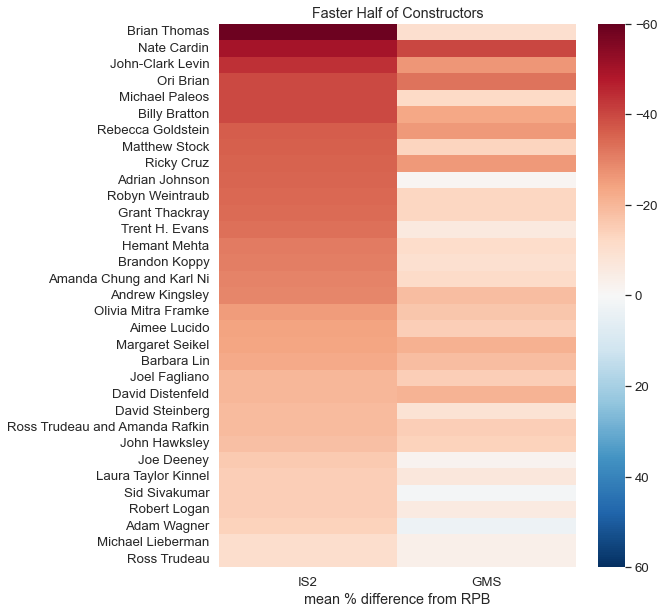

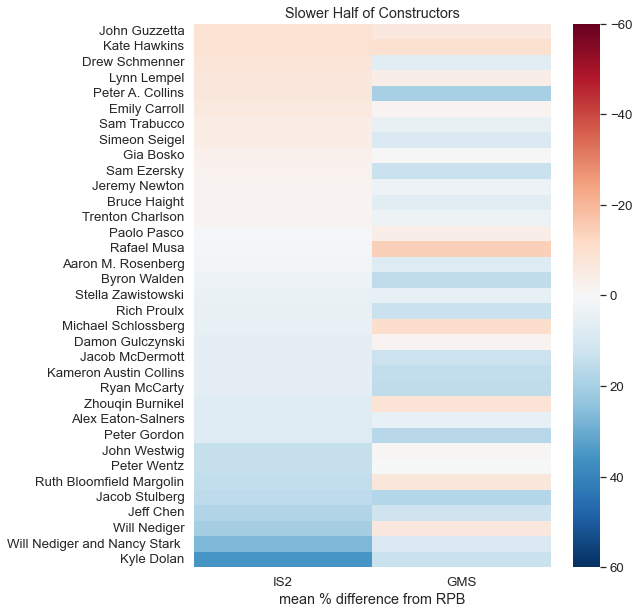

In [94]:
# Construct Heat Map sorted by fastest constructor relative to Individual solver 10 puzzle moving average to slowest

#Remove puzzle ns columns and sort for heatmapping
avgs = constructor_avgs_filter[["constructor_mean_IS", "constructor_mean_GMS"]]
avgs = avgs.sort_values(by=['constructor_mean_IS'], ascending = True)

first_half_end = int((len(avgs)/2)-1)
avgs_end = int(len(avgs))
first_half = avgs[0:first_half_end]
second_half = avgs[(first_half_end+1):avgs_end]

first_half = first_half.sort_values(by=['constructor_mean_IS'], ascending = True)
plt.figure(figsize=(8,10))
sns.set(font_scale=1.2)
ax = sns.heatmap(first_half, xticklabels=['IS2', 'GMS'], cmap="RdBu", vmin=-60, vmax=60, yticklabels=True)
plt.gcf().axes[1].invert_yaxis() #flip color bar to show fastest at the top
plt.xlabel('mean % difference from RPB')
plt.ylabel('')
plt.title("Faster Half of Constructors")
plt.show()

second_half = second_half.sort_values(by=['constructor_mean_IS'], ascending = True)
plt.figure(figsize=(8,10))
sns.set(font_scale=1.2)
ax2 = sns.heatmap(second_half, xticklabels=['IS2', 'GMS'], cmap="RdBu", vmin=-60, vmax=60, yticklabels=True)
plt.gcf().axes[1].invert_yaxis() #flip color bar to show fastest at the top
plt.xlabel('mean % difference from RPB')
plt.ylabel('')
plt.title("Slower Half of Constructors")
plt.show()

In [92]:
print(constructor_avgs_filter[["constructor_mean_IS"]].agg(['min', 'max']))
print(constructor_avgs_filter[["constructor_mean_GMS"]].agg(['min', 'max']))

     constructor_mean_IS
min               -58.68
max                35.53
     constructor_mean_GMS
min                -40.28
max                 20.13


In [95]:
# Calculate past performance (using COMP date to sort) for IS2 against a given constructor (% difference from RPB) for each puzzle in sample
# Individual Solver mean past performance versus a given constructor(s), per puzzle. 
# This is calculated off of deviation from 20-RPB, so that it can be collapsed across puzzle days
# Getting the count as well will allow filtering by past number of puzzles for a second version of the figure

df_IS2 = df_IS2.sort_values(by=['Constructors','Comp_Date'], ascending = False)

df_IS2 = df_IS2.iloc[::-1]
df_IS2['IS_per_constr_avg_past_diff_from_RPB'] = df_IS2.groupby(['Constructors'])['IST_Diff%_from_IS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).mean().round(2).shift(1))
df_IS2['IS_per_constr_past_diff_from_RPB_ct'] = df_IS2.groupby(['Constructors'])['IST_Diff%_from_IS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).count().shift(1))
df_IS2 = df_IS2.iloc[::-1]

# col = df_IS2.pop('GMS_per_constr_avg_past_diff_from_10pMA')
# df_IS2.insert(17, col.name, col)

In [96]:
# Checkpoint
df_IS2.to_csv('../data/df_IS2.csv', index=False)

In [97]:
# Create df that includes only puzzles with Constructor(s) where there are >=3 prior puzzles by them
df_IS2_filter = df_IS2.loc[(df_IS2["IS_per_constr_past_diff_from_RPB_ct"] >= 3)]
df_IS2_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 1828 to 332
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   P_Date                                233 non-null    datetime64[ns]
 1   P_Date_str                            233 non-null    object        
 2   P_Yr                                  233 non-null    period[A-DEC] 
 3   2023+_puzzle                          233 non-null    float64       
 4   DOW                                   233 non-null    object        
 5   DOW_num                               233 non-null    float64       
 6   GMST(m)                               233 non-null    float64       
 7   GMST(m)_10p_MA                        233 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA            233 non-null    int64         
 9   GMS_pds_l20_dw                        233 non-null    float64       
 10 

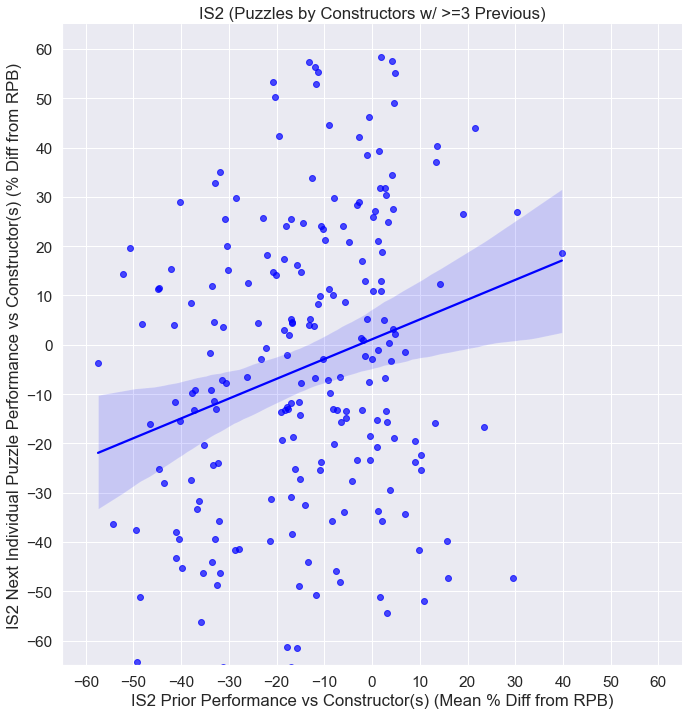

In [98]:
#Plot IS_per_constr_avg_past_diff_from_20pMA vs diff%_from_20pMA(IS) for all puzzles whose constructor had at least 3 prior puzzles in the sample
# Idea here is to get correlation between past performance vs a given constructor and performance on a given puzzle, in a way that is normalized for both puzzle day difficulty and recent past performance

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=df_IS2_filter, x="IS_per_constr_avg_past_diff_from_RPB", y="IST_Diff%_from_IS_pds_l20_dw",
    height=10, aspect=1, legend=False, scatter_kws = {"color": "blue", "alpha": 0.7}, line_kws = {"color": "blue"}
).set(title="IS2 (Puzzles by Constructors w/ >=3 Previous)", xlabel= "IS2 Prior Performance vs Constructor(s) (Mean % Diff from RPB)",
    ylabel="IS2 Next Individual Puzzle Performance vs Constructor(s) (% Diff from RPB)", xticks =[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60], yticks =[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]
)

# #Adjust subplots individually
_= p.set(ylim=(-65, 65))
_= p.set(xlim=(-65, 65))

In [99]:
# Correlation Calculation (Pearson r)
print(df_IS2_filter['IS_per_constr_avg_past_diff_from_RPB'].corr(df_IS2_filter['IST_Diff%_from_IS_pds_l20_dw']))

0.20489859670257954


In [100]:
# Calculate past performance (using PUZZLE ISSUE date to sort) for GMS against a given constructor (% difference from RPB) for each puzzle in sample
# GMS mean past performance versus a given constructor(s), per puzzle. 
# This is calculated off of deviation from DTW last 20-puzzle moving average, so that it can be collapsed across puzzle days
# Getting the count as well will allow filtering by past number of puzzles for a second version of the figure
#Important reminder that 'GMST_Diff%_from_GMS_pds_l20_dw' was calculated per puzzle BEFORE stripping down to only IS2 solves (and sorting using puzzle issue date)

df_IS2 = df_IS2.sort_values(by=['Constructors','P_Date'], ascending = False)

df_IS2 = df_IS2.iloc[::-1]
df_IS2['GMS_per_constr_avg_past_diff_from_RPB'] = df_IS2.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).mean().round(2).shift(1))
df_IS2['GMS_per_constr_past_diff_from_RPB_ct'] = df_IS2.groupby(['Constructors'])['GMST_Diff%_from_GMS_pds_l20_dw'].transform(lambda x: x.rolling(window=100, min_periods = 1).count().shift(1))
df_IS2 = df_IS2.iloc[::-1]

# col = df_IS2.pop('GMS_per_constr_avg_past_diff_from_10pMA')
# df_IS2.insert(17, col.name, col)

In [101]:
# Create df that includes only puzzles with Constructor(s) where there are >=3 prior puzzles by them
df_IS2_filter = df_IS2.loc[(df_IS2["GMS_per_constr_past_diff_from_RPB_ct"] >= 3)]
df_IS2_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 725 to 200
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 237 non-null    datetime64[ns]
 1   P_Date_str                             237 non-null    object        
 2   P_Yr                                   237 non-null    period[A-DEC] 
 3   2023+_puzzle                           237 non-null    float64       
 4   DOW                                    237 non-null    object        
 5   DOW_num                                237 non-null    float64       
 6   GMST(m)                                237 non-null    float64       
 7   GMST(m)_10p_MA                         237 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             237 non-null    int64         
 9   GMS_pds_l20_dw                         237 non-null    float64 

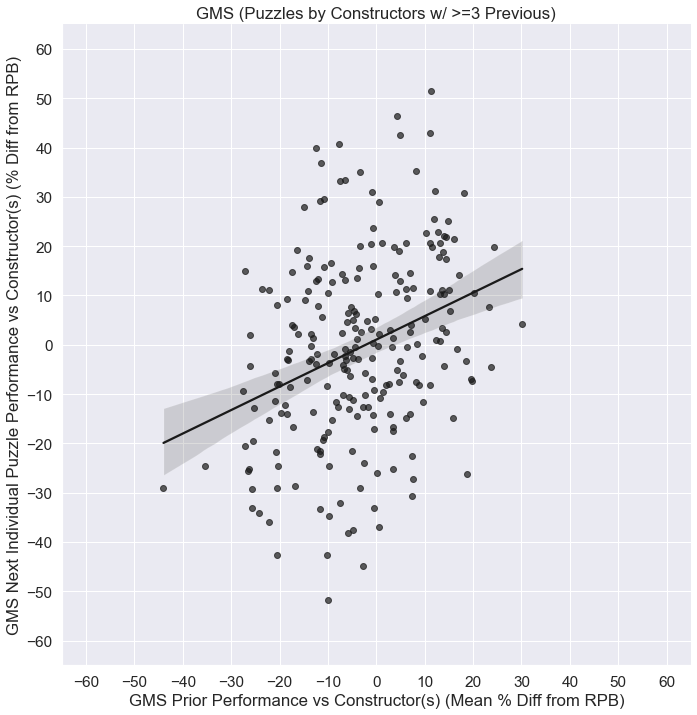

In [102]:
#Plot GMS_per_constr_avg_past_diff_from_10pMA vs diff%_from_20pMA(GMS) for all puzzles whose constructor had at least 4 prior puzzles in the sample
# Idea here is to get correlation between past performance vs a given constructor and performance on a given puzzle, in a way that is normalized for both puzzle day difficulty and recent past performance

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=df_IS2_filter, x="GMS_per_constr_avg_past_diff_from_RPB", y="GMST_Diff%_from_GMS_pds_l20_dw",
    height=10, aspect=1, legend=False, scatter_kws = {"color": "k", "alpha": 0.7}, line_kws = {"color": "k"}
).set(title="GMS (Puzzles by Constructors w/ >=3 Previous)", xlabel= "GMS Prior Performance vs Constructor(s) (Mean % Diff from RPB)",
    ylabel="GMS Next Individual Puzzle Performance vs Constructor(s) (% Diff from RPB)", xticks =[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60], yticks =[-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]
)

# #Adjust subplots individually
_= p.set(ylim=(-65, 65))
_= p.set(xlim=(-65, 65))

In [103]:
# Correlation Calculation (Pearson r)
print(df_IS2_filter['GMS_per_constr_avg_past_diff_from_RPB'].corr(df_IS2_filter['GMST_Diff%_from_GMS_pds_l20_dw']))

0.30301373130081116


### Completion Time of Day Analysis

In [104]:
IS2_df2 = df_IS2.copy()

In [105]:
#Creates a column where Individual Solver completion timestamps are binned to the hour in 24-hour cycle
IS2_df2['Comp_Hr'] = IS2_df2['Comp_Date'].dt.hour
IS2_df2['Comp_Hr'].value_counts()
IS2_df2['Comp_Hr']= IS2_df2['Comp_Hr'].astype('int64')
IS2_df2 = IS2_df2.sort_values('Comp_Hr')

In [106]:
IS2_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 465 to 370
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 1071 non-null   datetime64[ns]
 1   P_Date_str                             1071 non-null   object        
 2   P_Yr                                   1071 non-null   period[A-DEC] 
 3   2023+_puzzle                           1071 non-null   float64       
 4   DOW                                    1071 non-null   object        
 5   DOW_num                                1071 non-null   float64       
 6   GMST(m)                                1071 non-null   float64       
 7   GMST(m)_10p_MA                         1071 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             1071 non-null   int64         
 9   GMS_pds_l20_dw                         1071 non-null   float64

In [107]:
col = IS2_df2.pop('Comp_Hr')
IS2_df2.insert(9, col.name, col)

In [108]:
# Construct numerical categories in desired plotting sequence for combinations of puzzle day and pre-2023 or 2023+

IS2_df2.loc[(IS2_df2["DOW"] == "Sunday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 1 
IS2_df2.loc[(IS2_df2["DOW"] == "Sunday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 2
IS2_df2.loc[(IS2_df2["DOW"] == "Monday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 3 
IS2_df2.loc[(IS2_df2["DOW"] == "Monday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 4
IS2_df2.loc[(IS2_df2["DOW"] == "Tuesday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 5 
IS2_df2.loc[(IS2_df2["DOW"] == "Tuesday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 6
IS2_df2.loc[(IS2_df2["DOW"] == "Wednesday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 7 
IS2_df2.loc[(IS2_df2["DOW"] == "Wednesday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 8
IS2_df2.loc[(IS2_df2["DOW"] == "Thursday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 9 
IS2_df2.loc[(IS2_df2["DOW"] == "Thursday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 10
IS2_df2.loc[(IS2_df2["DOW"] == "Friday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 11 
IS2_df2.loc[(IS2_df2["DOW"] == "Friday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 12
IS2_df2.loc[(IS2_df2["DOW"] == "Saturday") & (IS2_df2["2023+_solve"] == 0) , "plot_seq"] = 13 
IS2_df2.loc[(IS2_df2["DOW"] == "Saturday") & (IS2_df2["2023+_solve"] == 1) , "plot_seq"] = 14

In [109]:
# For subplot collapsed across puzzle days for puzzle completions by hour of day, make a copy of all data, label it '0' and concatenate with
#main df

IS2_df2_copy = IS2_df2.copy()
IS2_df2_copy["DOW_num"] = 0

IS2_df2a = pd.concat([IS2_df2, IS2_df2_copy],ignore_index=True)

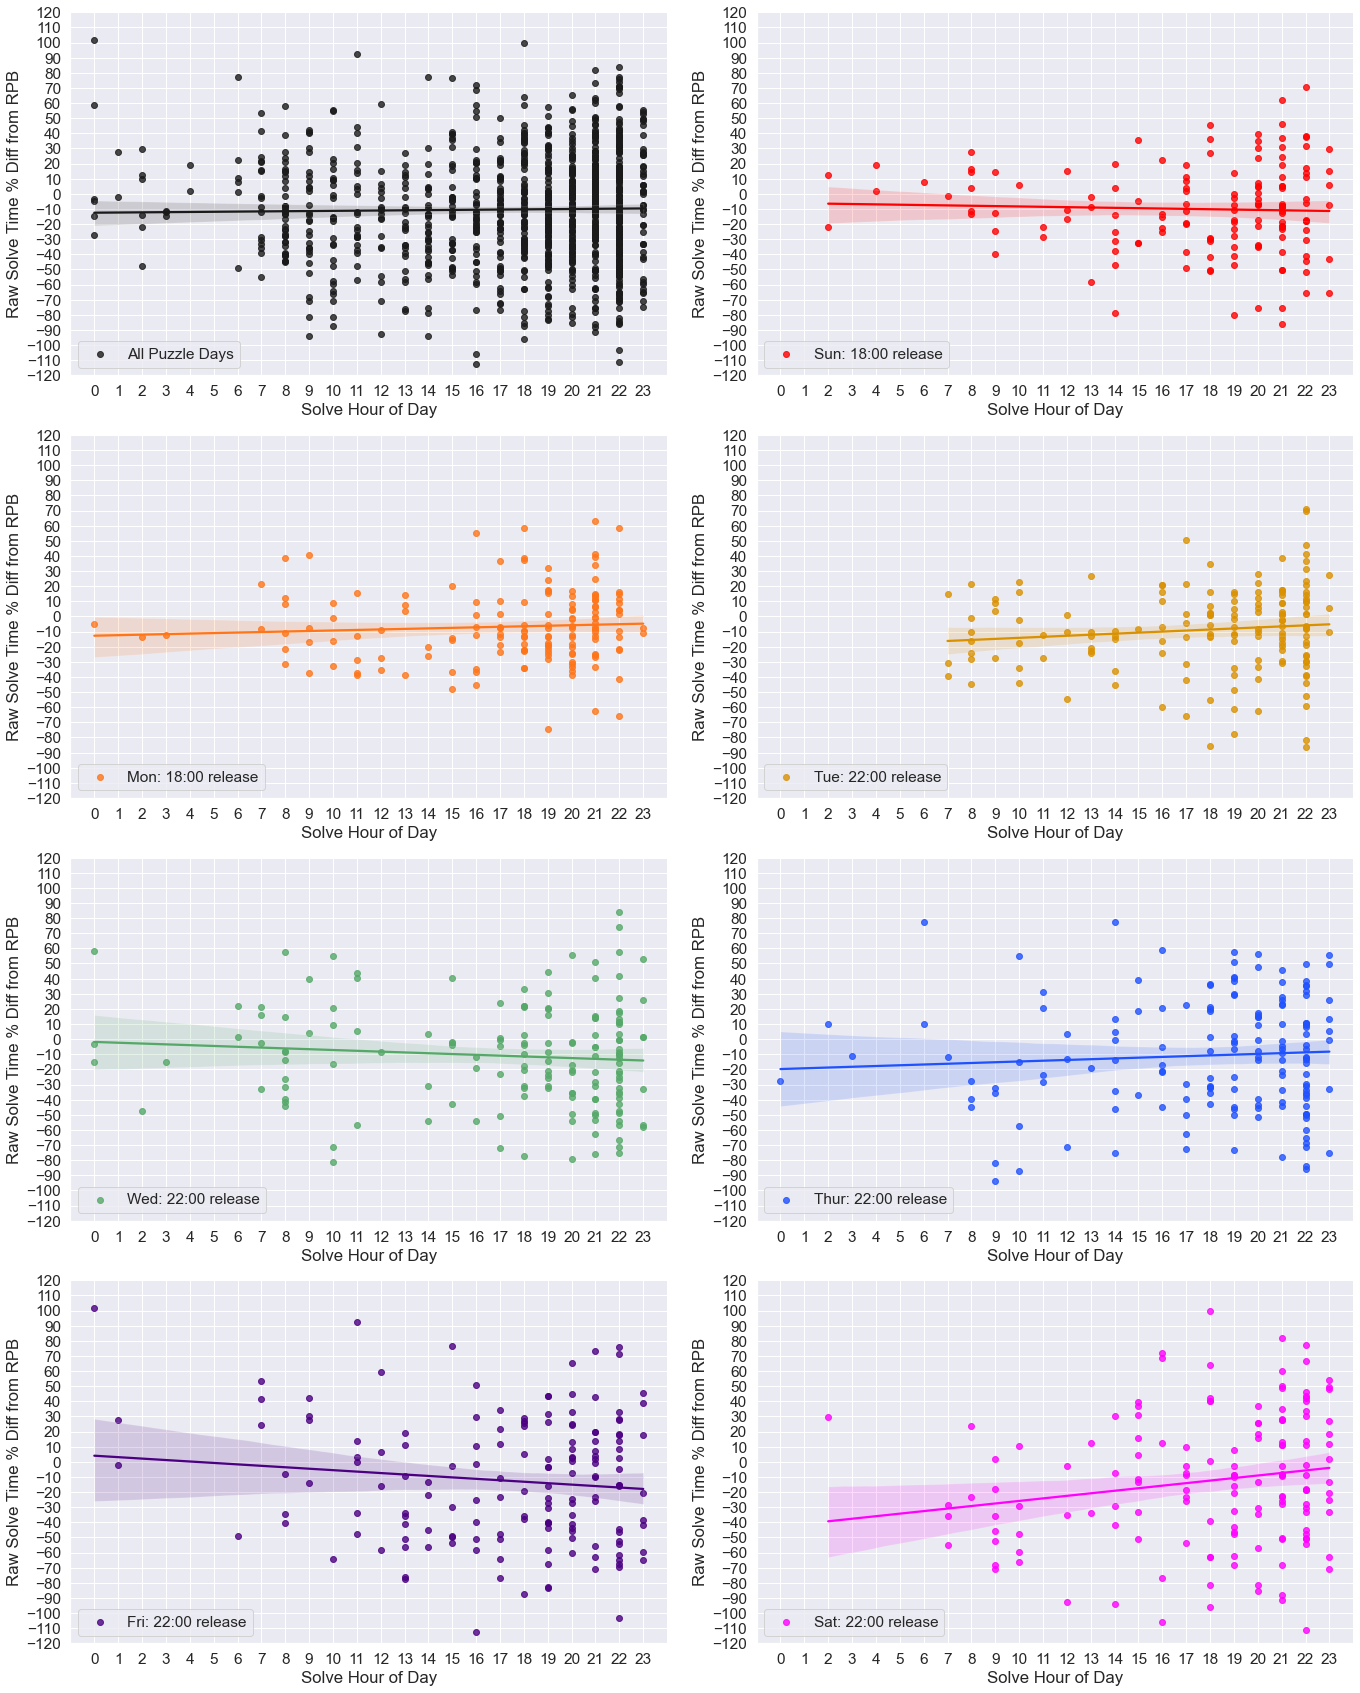

In [110]:
# Individual Solver 2 (IS2) Puzzle Completions by Solve Hour

IS2_df2a = IS2_df2a.sort_values(by=['DOW_num'], ascending = True)

IS2_df2a['plot_seq_map'] = IS2_df2a['DOW_num'].map({0: 'All Puzzle Days', 1:'Sun: 18:00 release', 2:'Mon: 18:00 release', 3:'Tue: 22:00 release', 4:'Wed: 22:00 release', 5: 'Thur: 22:00 release', 6:'Fri: 22:00 release', 7:'Sat: 22:00 release'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df2a, x="Comp_Hr", y="IST_Diff%_from_IS_pds_l20_dw", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], col_wrap=2, palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False
).set(title="", xlabel= "Solve Hour of Day",
    ylabel="Raw Solve Time % Diff from RPB", yticks = [-120,-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110,120], xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]  
)

#Adjust subplots individually
p.axes[0].set_ylim((-120,120))
p.axes[0].set_xlim((-1,24))
p.axes[1].set_ylim((-120,120))
p.axes[1].set_xlim((-1,24))
p.axes[2].set_ylim((-120,120))
p.axes[2].set_xlim((-1,24))
p.axes[3].set_ylim((-120,120))
p.axes[3].set_xlim((-1,24))
p.axes[4].set_ylim((-120,120))
p.axes[4].set_xlim((-1,24))
p.axes[5].set_ylim((-120,120))
p.axes[5].set_xlim((-1,24))
p.axes[6].set_ylim((-120,120))
p.axes[6].set_xlim((-1,24))
p.axes[7].set_ylim((-120,120))
p.axes[7].set_xlim((-1,24))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'lower left', title="")
_= p.axes[1].legend(loc = 'lower left')
_= p.axes[2].legend(loc = 'lower left')
_= p.axes[3].legend(loc = 'lower left')
_= p.axes[4].legend(loc = 'lower left')
_= p.axes[5].legend(loc = 'lower left')
_= p.axes[6].legend(loc = 'lower left')
_= p.axes[7].legend(loc = 'lower left')

IS2_df2a.drop(['plot_seq_map'], axis=1, inplace=True)

In [111]:
#counts of common hours for puzzle completion for IS1
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 18)]))
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 21)]))
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 0)]))

print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 7) & (IS2_df2["Comp_Hr"] <= 10)]))

693
391
1071
111


In [113]:
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 0) & (IS2_df2["Comp_Hr"] <= 8)]))
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 0) & (IS2_df2["Comp_Hr"] <= 8) & (IS2_df2["IST_Diff%_from_IS_pds_l20_dw"] <= -50)]))

80
1


In [114]:
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 20) & (IS2_df2["Comp_Hr"] <= 24)]))
print(len(IS2_df2.loc[(IS2_df2["Comp_Hr"] >= 20) & (IS2_df2["Comp_Hr"] <= 23) & (IS2_df2["IST_Diff%_from_IS_pds_l20_dw"] <= -50)]))

501
67


### Correlation of Puzzle, Answer and Past Performance Feature Parameters to Individual IS2 Puzzle Solve Times 

In [115]:
# Make a deep copy of individual solver df
IS2_df3 = IS2_df2.copy()

In [116]:
IS2_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 465 to 370
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 1071 non-null   datetime64[ns]
 1   P_Date_str                             1071 non-null   object        
 2   P_Yr                                   1071 non-null   period[A-DEC] 
 3   2023+_puzzle                           1071 non-null   float64       
 4   DOW                                    1071 non-null   object        
 5   DOW_num                                1071 non-null   float64       
 6   GMST(m)                                1071 non-null   float64       
 7   GMST(m)_10p_MA                         1071 non-null   float64       
 8   GMST_Diff%_from_GMS_10p_MA             1071 non-null   int64         
 9   Comp_Hr                                1071 non-null   int64  

In [ ]:
# Create new df with all rows copied and placed below current rows. 
# This is so we can plot all 15x15 data together as a subplot in the feature correlation scatterplot figures 

# IS1_df3_copy = IS1_df3.loc[(IS1_df3["DOW_num"] != 1)] #15x15 only
# IS1_df3_copy["DOW_num"] = 0

# IS1_df3a = pd.concat([IS1_df3, IS1_df3_copy],ignore_index=True)

In [ ]:
IS2_df3a.to_csv('../data/IS2_df3a.csv', index=False)

In [117]:
# Restricting time range to beginning of 2020 onward to minimize baseline shift effects on correlations to puzzle features

IS2_df4 = IS2_df3.loc[(IS2_df3["Comp_Yr"]==("2020")) | (IS2_df3["Comp_Yr"]==("2021")) |(IS2_df3["Comp_Yr"]==("2022")) | (IS2_df3["Comp_Yr"]==("2023")) | (IS2_df3["Comp_Yr"]==("2024"))]

# #print(df_IS1.loc[df_IS1["Comp_Yr"]==("2021"), "IST(m)"].sum())

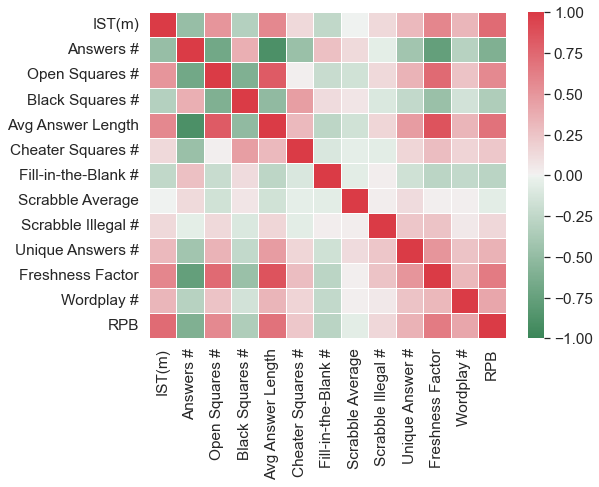

In [126]:
# 15x15 Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]
puzzle_features = IS2_15x15[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',    
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triangle - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #','RPB'])
#_= ans.set_yticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Average Answer Length', 'Rebus #', 'Cheater Squares #', 'Fill in the Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Recent Adj Perf', 'Past Perf vs Constructor(s)'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [127]:
IS2_15x15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 465 to 1429
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 839 non-null    datetime64[ns]
 1   P_Date_str                             839 non-null    object        
 2   P_Yr                                   839 non-null    period[A-DEC] 
 3   2023+_puzzle                           839 non-null    float64       
 4   DOW                                    839 non-null    object        
 5   DOW_num                                839 non-null    float64       
 6   GMST(m)                                839 non-null    float64       
 7   GMST(m)_10p_MA                         839 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             839 non-null    int64         
 9   Comp_Hr                                839 non-null    int64  

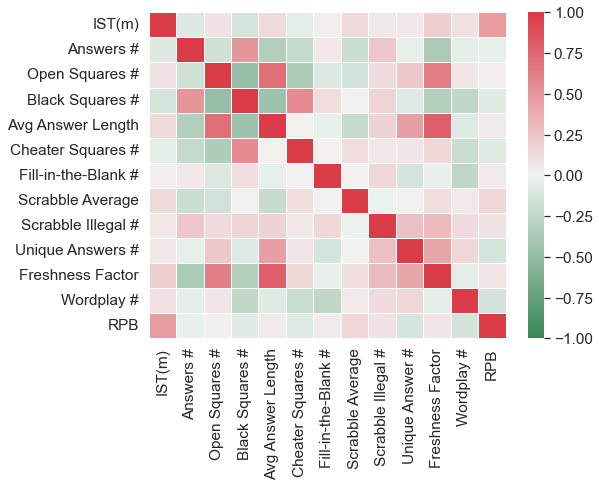

In [128]:
# 21x21 (Sunday) Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_21x21 = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
puzzle_features = IS2_21x21[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',     
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RPB'    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [129]:
IS2_21x21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 594 to 370
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 134 non-null    datetime64[ns]
 1   P_Date_str                             134 non-null    object        
 2   P_Yr                                   134 non-null    period[A-DEC] 
 3   2023+_puzzle                           134 non-null    float64       
 4   DOW                                    134 non-null    object        
 5   DOW_num                                134 non-null    float64       
 6   GMST(m)                                134 non-null    float64       
 7   GMST(m)_10p_MA                         134 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             134 non-null    int64         
 9   Comp_Hr                                134 non-null    int64   

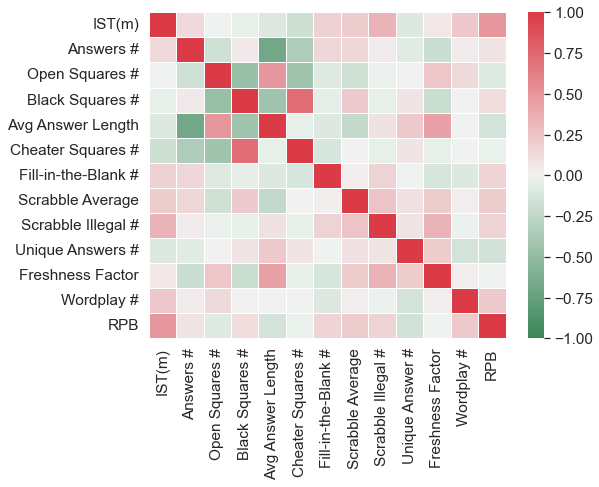

In [130]:
# Monday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
puzzle_features = IS2_df4_Mon[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RPB',    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

In [131]:
IS1_df4_Mon.info()

NameError: name 'IS1_df4_Mon' is not defined

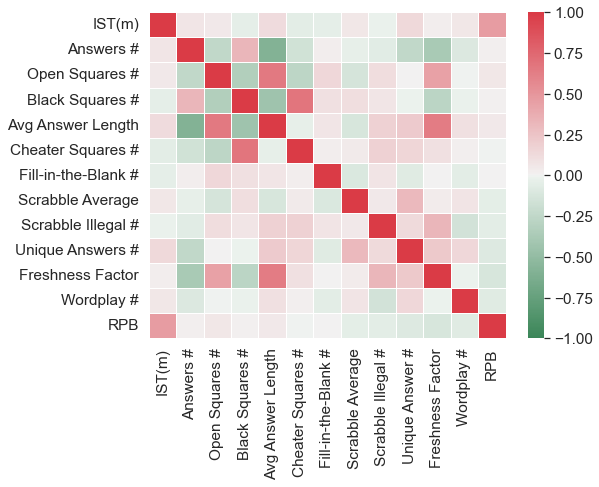

In [132]:
# Tuesday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
puzzle_features = IS2_df4_Tue[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay': 'Wordplay #',
'IS_pds_l20_dw': 'RPB'    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

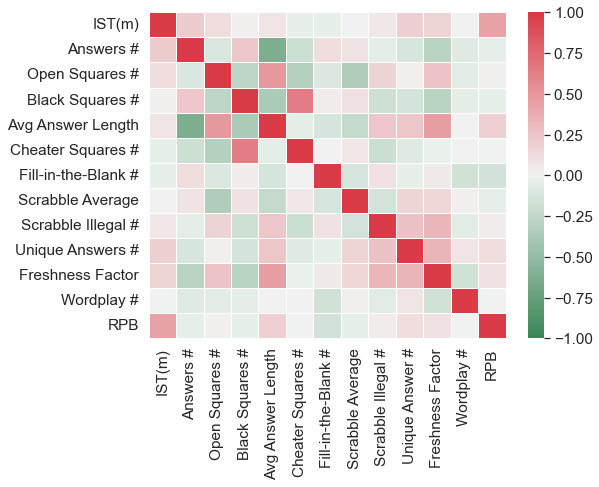

In [133]:
# Wednesday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
puzzle_features = IS2_df4_Wed[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay': 'Wordplay #',
'IS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

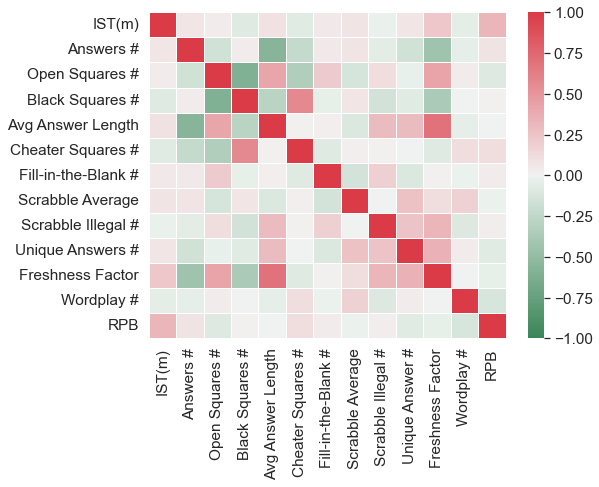

In [134]:
# Thursday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Thurs = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
puzzle_features = IS2_df4_Thurs[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',    
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RPB',    
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])
#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

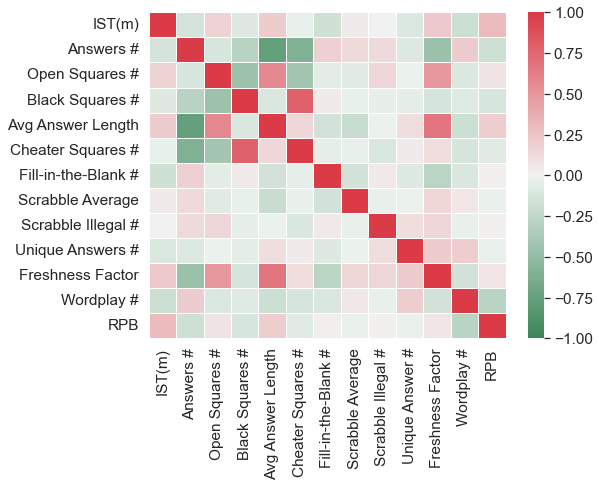

In [135]:
# Friday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
puzzle_features = IS2_df4_Fri[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RPB'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

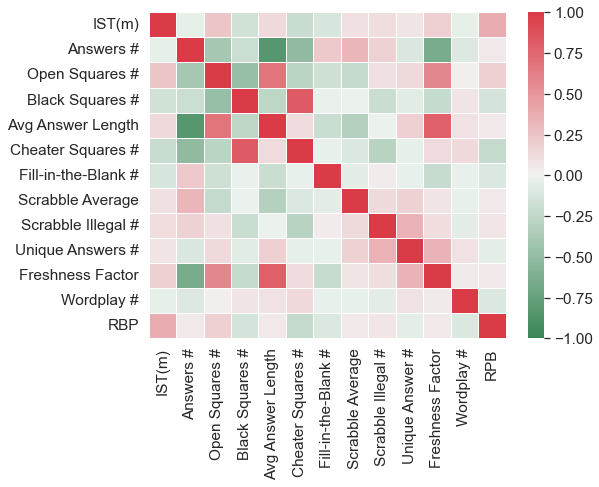

In [136]:
# Saturday Puzzles Features Correlation to Individual Solver Raw Solve Times Heat Map

IS2_df4_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
puzzle_features = IS2_df4_Sat[["IST(m)", "Words", "Open_Squares", "Blocks", "AWL", "Cheater_Squares", "FITB", "Scrabble_Avg", "Scrabble_Illegal", "Unique_Answers", "Freshness_Factor", "Wordplay", "IS_pds_l20_dw"]]

corr = puzzle_features.corr()

labels = {
'IST(m)':'IST(m)',  
'Words':'Answers #', 
'Open_Squares':'Open Squares #',
'Blocks': 'Black Squares #',
'AWL':'Avg Answer Length',   
'Cheater_Squares':'Cheater Squares #',
'FITB':'Fill-in-the-Blank #',
'Scrabble_Avg':'Scrabble Average',
'Scrabble_Illegal':'Scrabble Illegal #',
'Unique_Answers':'Unique Answers #',
'Freshness_Factor':'Freshness Factor',
'Wordplay':'Wordplay #',
'IS_pds_l20_dw': 'RBP'
}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)
plt.figure(figsize=(8,6))
ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0, xticklabels=True, yticklabels=True, vmin=-1, vmax=1)

_= ans.set_xticklabels(['IST(m)', 'Answers #', 'Open Squares #', 'Black Squares #', 'Avg Answer Length', 'Cheater Squares #', 'Fill-in-the-Blank #', 'Scrabble Average', 'Scrabble Illegal #', 'Unique Answer #', 'Freshness Factor', 'Wordplay #', 'RPB'])

#save image 
# figure = ans.get_figure()    
# figure.savefig('correlations.png', dpi=800)

### Scatterplots of Relationship of Grid, Answer and Past-Performance Parameters to IS1 Per Puzzle Performance

In [116]:
IS2_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 123 to 1218
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   P_Date                                 955 non-null    datetime64[ns]
 1   P_Date_str                             955 non-null    object        
 2   P_Yr                                   955 non-null    period[A-DEC] 
 3   2023+_puzzle                           955 non-null    float64       
 4   DOW                                    955 non-null    object        
 5   DOW_num                                955 non-null    float64       
 6   GMST(m)                                955 non-null    float64       
 7   GMST(m)_10p_MA                         955 non-null    float64       
 8   GMST_Diff%_from_GMS_10p_MA             955 non-null    int64         
 9   Comp_Hr                                955 non-null    int64  

In [137]:
# Create new df with all 15x15 puzzle rows copied and placed below current rows. 
# This is so we can plot all 15x15 data together as a subplot in the feature correlation scatterplot figures 

IS2_df4_copy = IS2_df4.loc[(IS2_df4["DOW_num"] != 1)] #15x15 only
IS2_df4_copy["DOW_num"] = 0

IS2_df4a = pd.concat([IS2_df4, IS2_df4_copy],ignore_index=True)

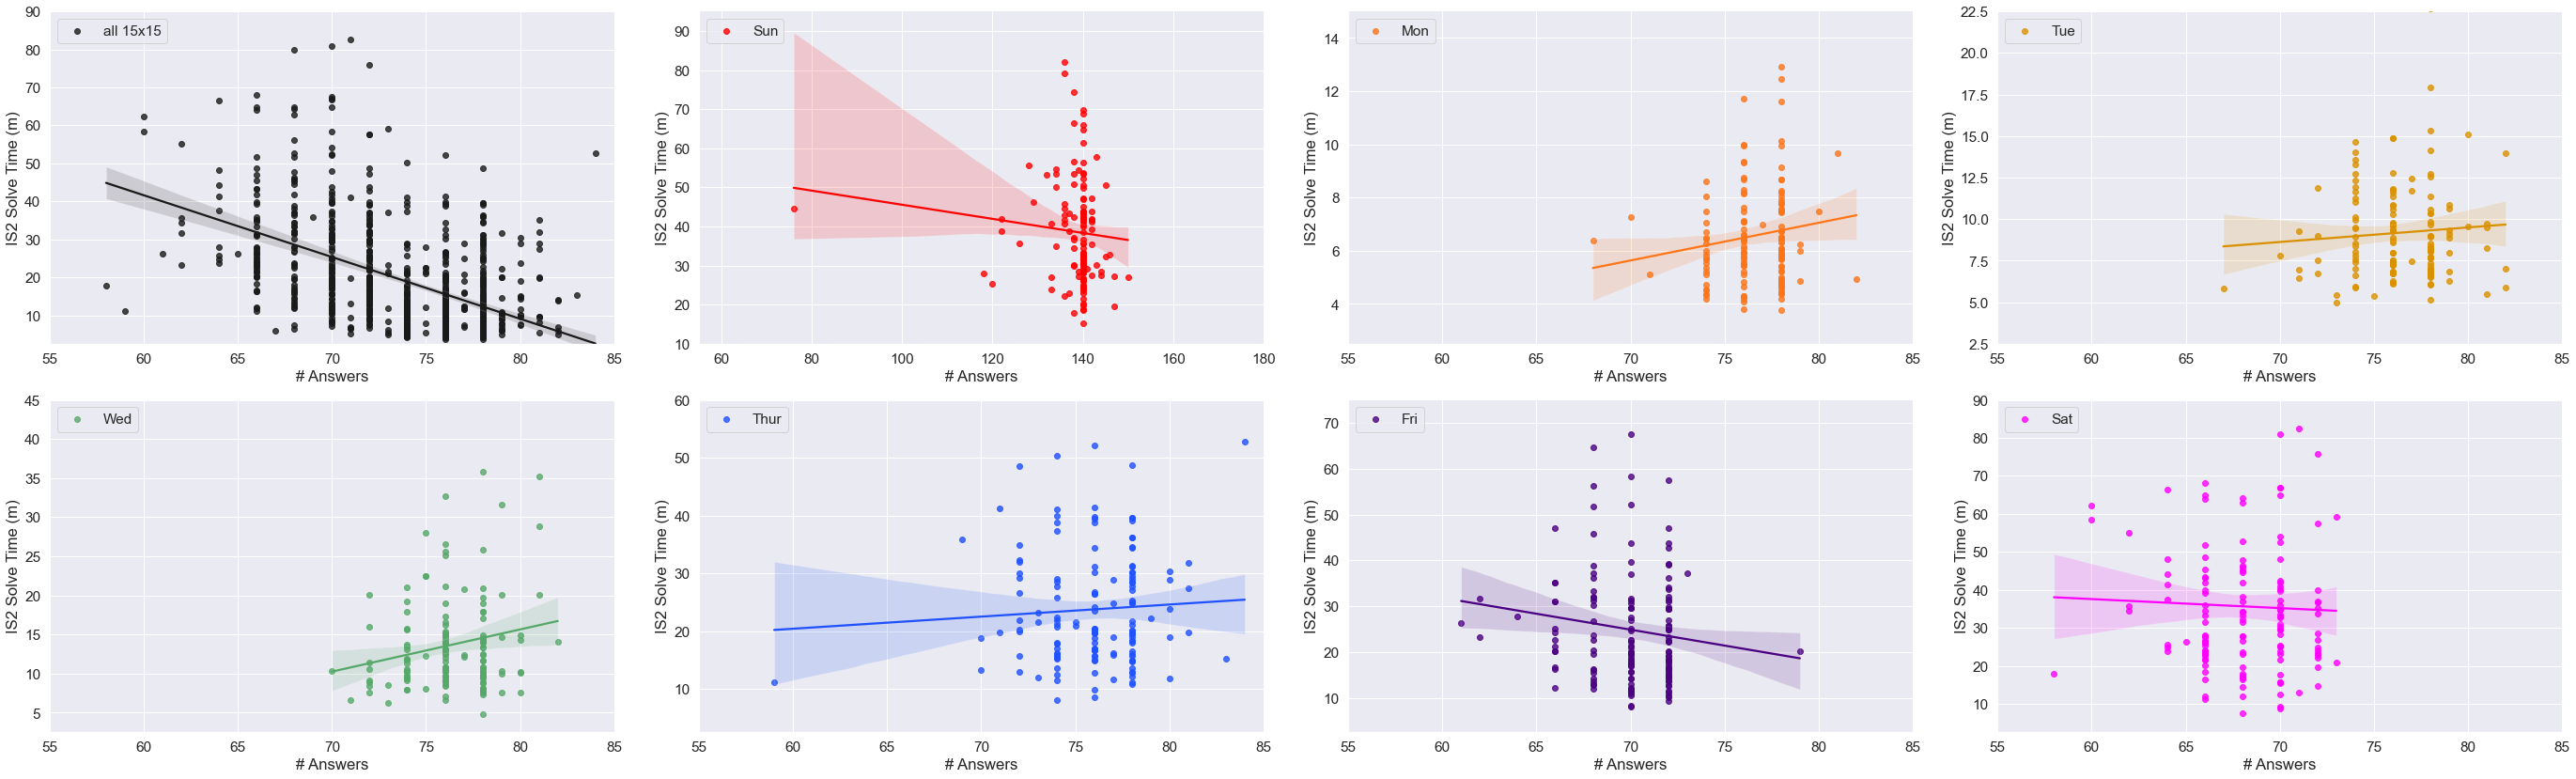

In [138]:
# Number of Answers vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Words", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Answers",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((55,85))
p.axes[1].set_xlim((55,180))
p.axes[2].set_xlim((55,85))
p.axes[3].set_xlim((55,85))
p.axes[4].set_xlim((55,85))
p.axes[5].set_xlim((55,85))
p.axes[6].set_xlim((55,85))
p.axes[7].set_xlim((55,85))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [139]:
# Calculate IS2 Pearson R for 15x15 grids for this feature
IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")] #only need to filter down this one time, and can apply to correlations for all subsequent features analysed

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Words']))

-0.48355367212465095


In [140]:
# Calculate GMS Pearson R for 15x15 grids for this feature

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Words']))

-0.5547246054353987


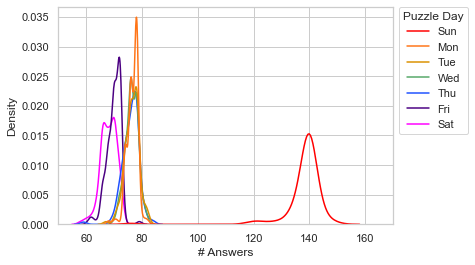

In [141]:
# Density plot of number of answers in puzzles solved by IS2
IS2_df4['plot_seq_map'] = IS2_df4['DOW_num'].map({1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri', 7:'Sat'})
IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Words", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(50, 170)
ax.set_xlabel("# Answers")
plt.show()

In [142]:
IS2_df4["Words"].agg(['min', 'max'])

min     58
max    150
Name: Words, dtype: int64

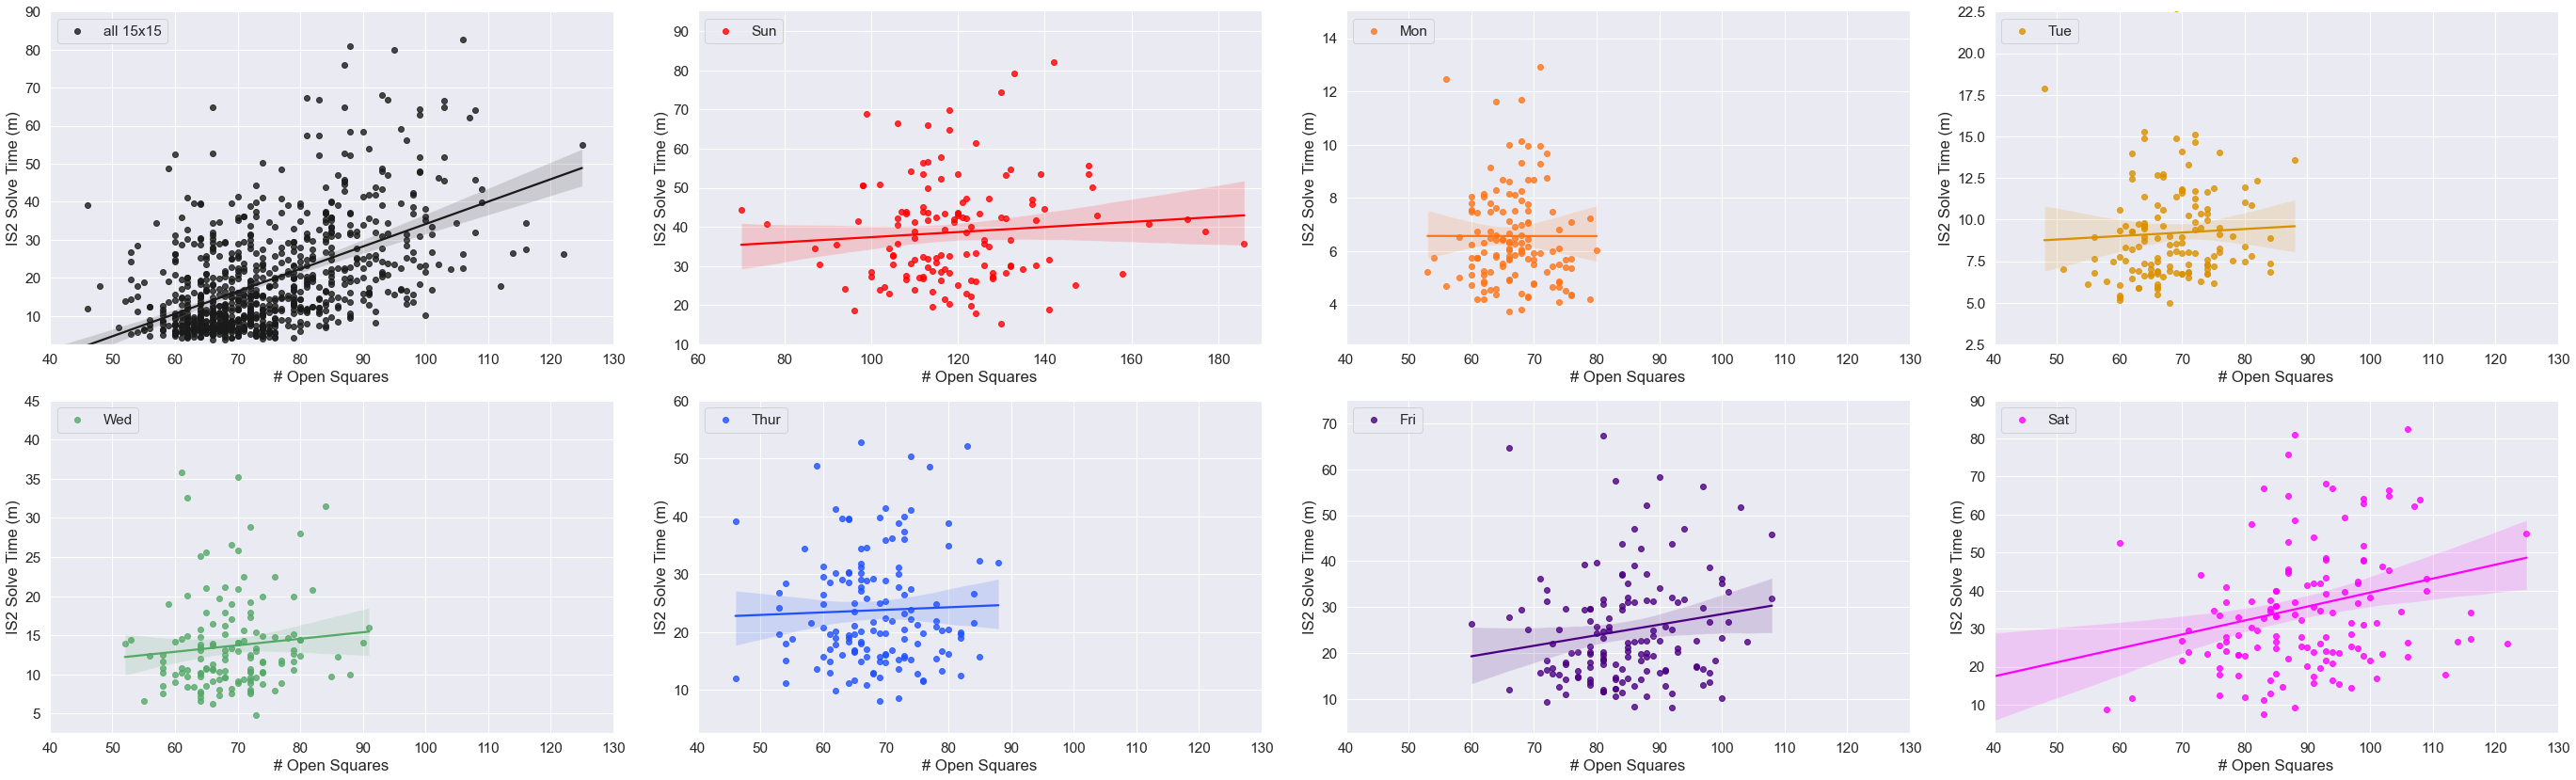

In [143]:
# Open Squares vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Open_Squares", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Open Squares",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((40,130))
p.axes[1].set_xlim((60,190))
p.axes[2].set_xlim((40,130))
p.axes[3].set_xlim((40,130))
p.axes[4].set_xlim((40,130))
p.axes[5].set_xlim((40,130))
p.axes[6].set_xlim((40,130))
p.axes[7].set_xlim((40,130))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [144]:
# Calculate IS2 Pearson R for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Open_Squares']))

0.5074230880279461


In [145]:
# Calculate GMS Pearson R for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Open_Squares']))

0.5619531492542238


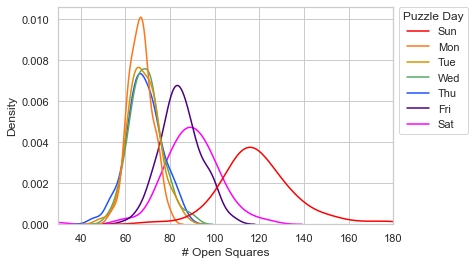

In [146]:
# Density plot of number of open squares in puzzles solved by IS2

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Open_Squares", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(30, 180)
ax.set_xlabel("# Open Squares")
plt.show()

In [147]:
IS2_df4["Open_Squares"].agg(['min', 'max'])

min     29
max    186
Name: Open_Squares, dtype: int64

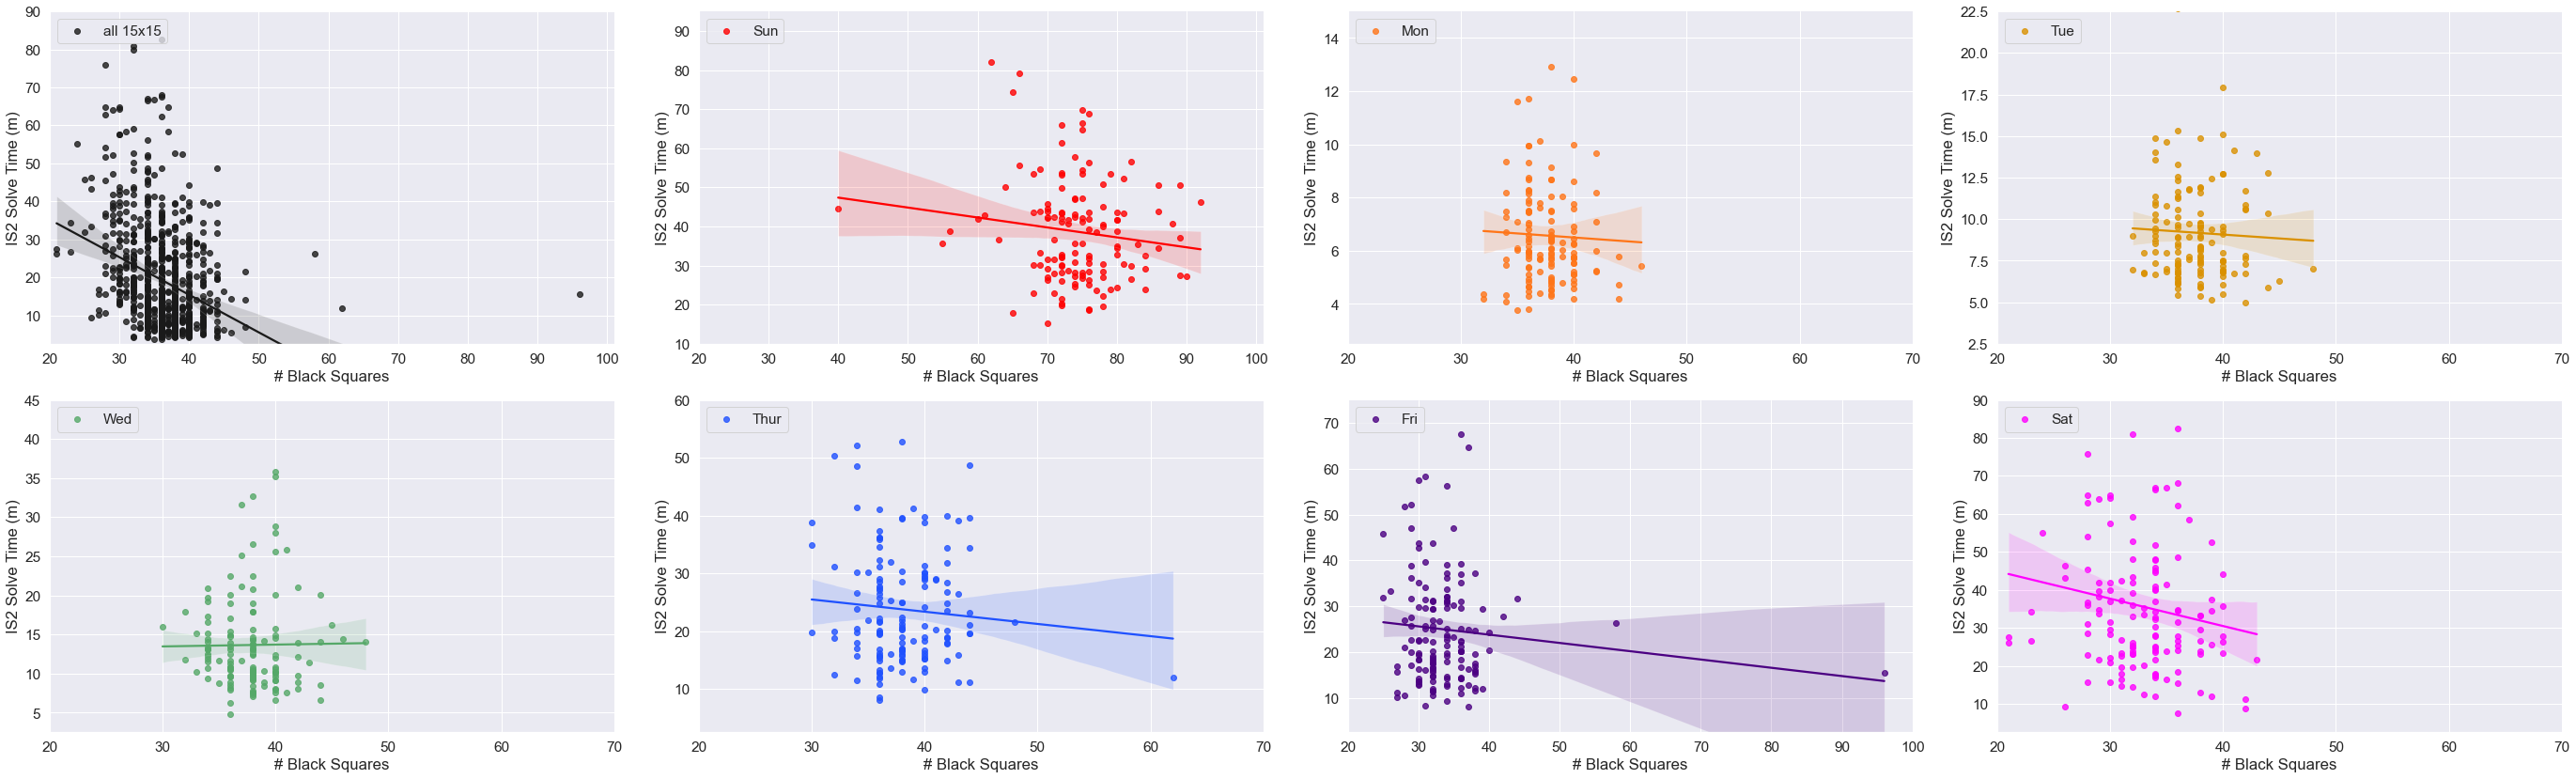

In [148]:
# Black Squares (blocks) vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Blocks", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Black Squares",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((20,101))
p.axes[1].set_xlim((20,101))
p.axes[2].set_xlim((20,70))
p.axes[3].set_xlim((20,70))
p.axes[4].set_xlim((20,70))
p.axes[5].set_xlim((20,70))
p.axes[6].set_xlim((20,100))
p.axes[7].set_xlim((20,70))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [149]:
# Calculate Pearson R for IS2 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Blocks']))

-0.3147385407834581


In [150]:
# Calculate Pearson R for GMS 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Blocks']))

-0.3450284557820278


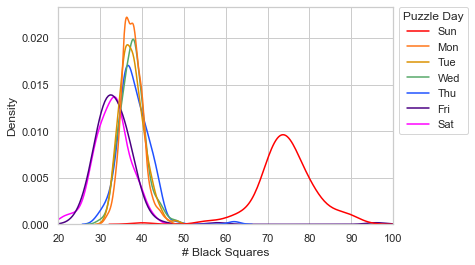

In [151]:
# Density plot of number of black squares (blocks) in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Blocks", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(20, 100)
ax.set_xlabel("# Black Squares")
plt.show()

In [152]:
IS2_df4["Blocks"].agg(['min', 'max'])

min    21
max    96
Name: Blocks, dtype: int64

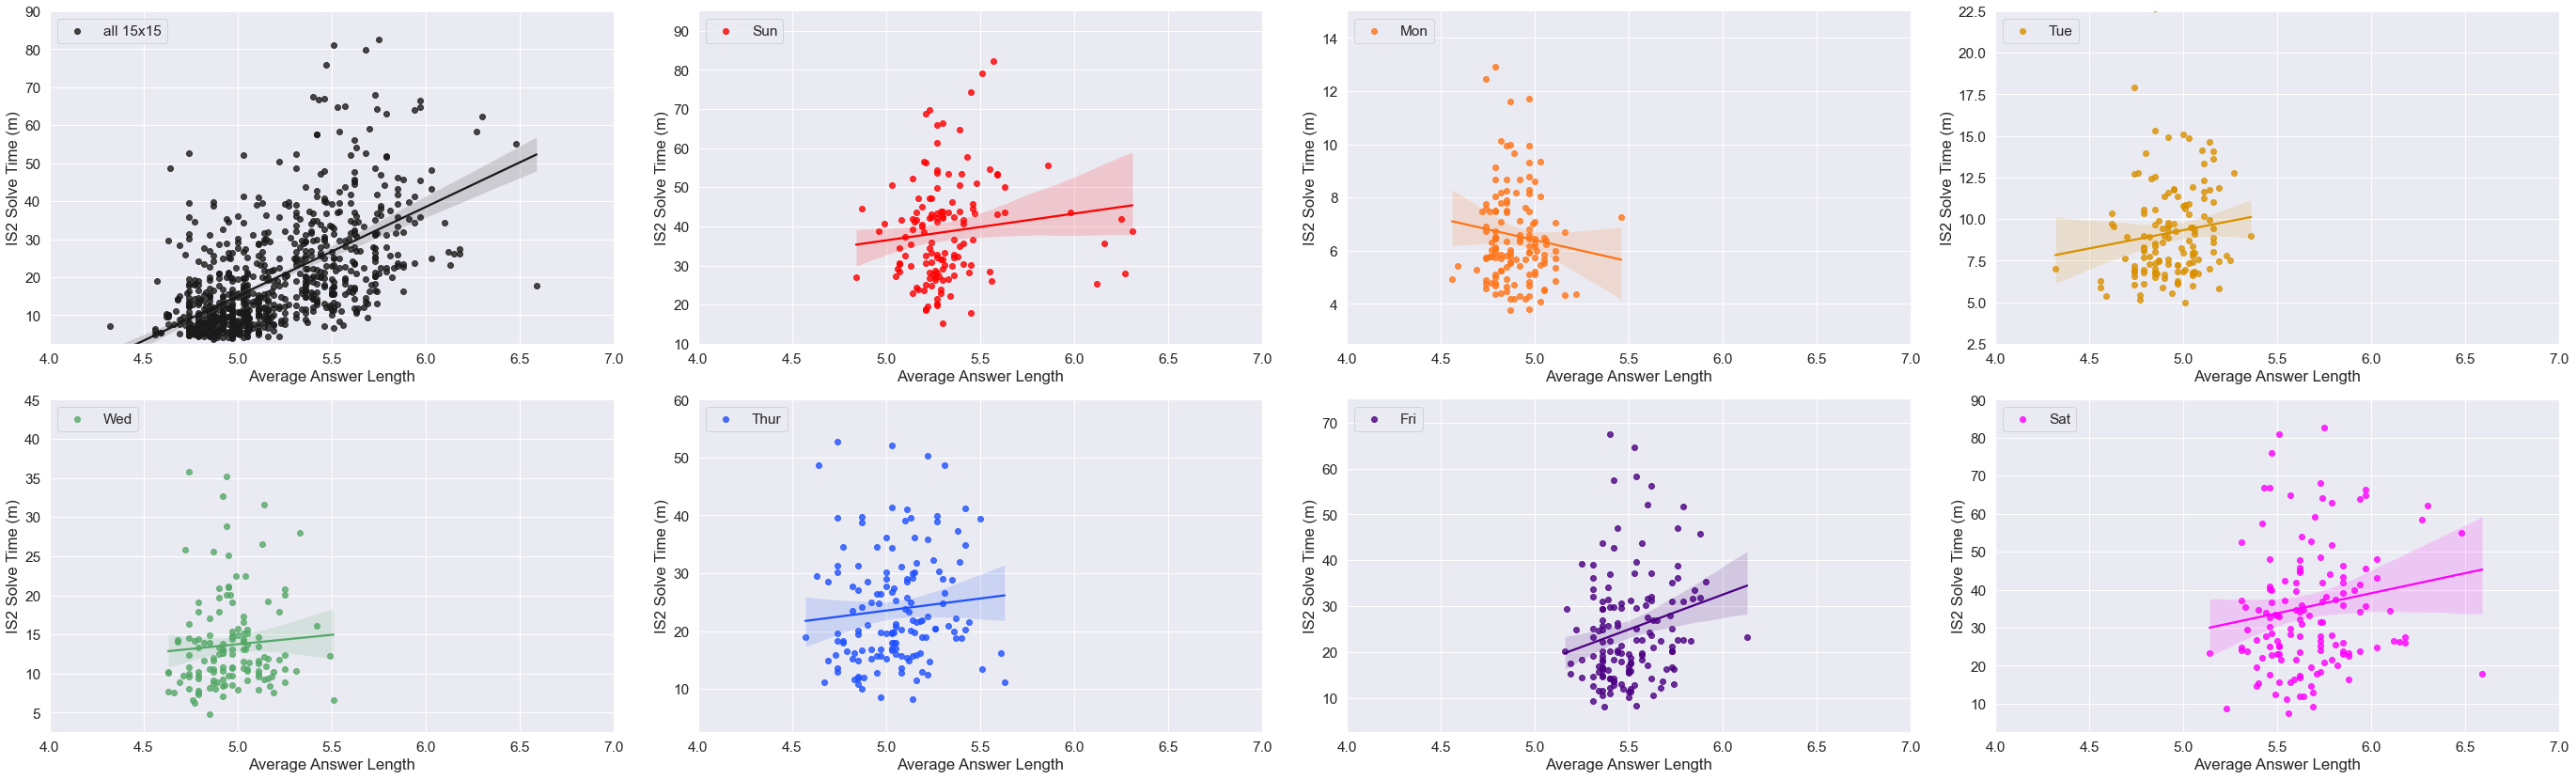

In [153]:
# Average Answer Length vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="AWL", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Average Answer Length",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((4,7))
p.axes[1].set_xlim((4,7))
p.axes[2].set_xlim((4,7))
p.axes[3].set_xlim((4,7))
p.axes[4].set_xlim((4,7))
p.axes[5].set_xlim((4,7))
p.axes[6].set_xlim((4,7))
p.axes[7].set_xlim((4,7))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [154]:
# Calculate Pearson R for IS2 for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['AWL']))

0.5767171202802849


In [155]:
# Calculate Pearson R for GMS for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['AWL']))

0.667261167777061


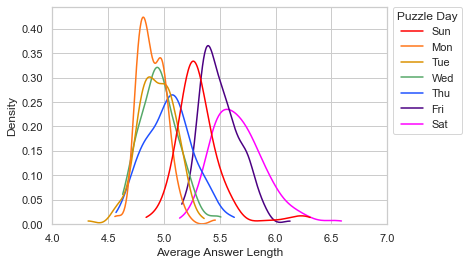

In [156]:
# Density plot of average answer length in puzzles solved by IS2

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "AWL", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(3,7))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(4, 7)
ax.set_xlabel("Average Answer Length")
plt.show()

In [157]:
IS2_df4["AWL"].agg(['min', 'max'])

min    4.32
max    6.59
Name: AWL, dtype: float64

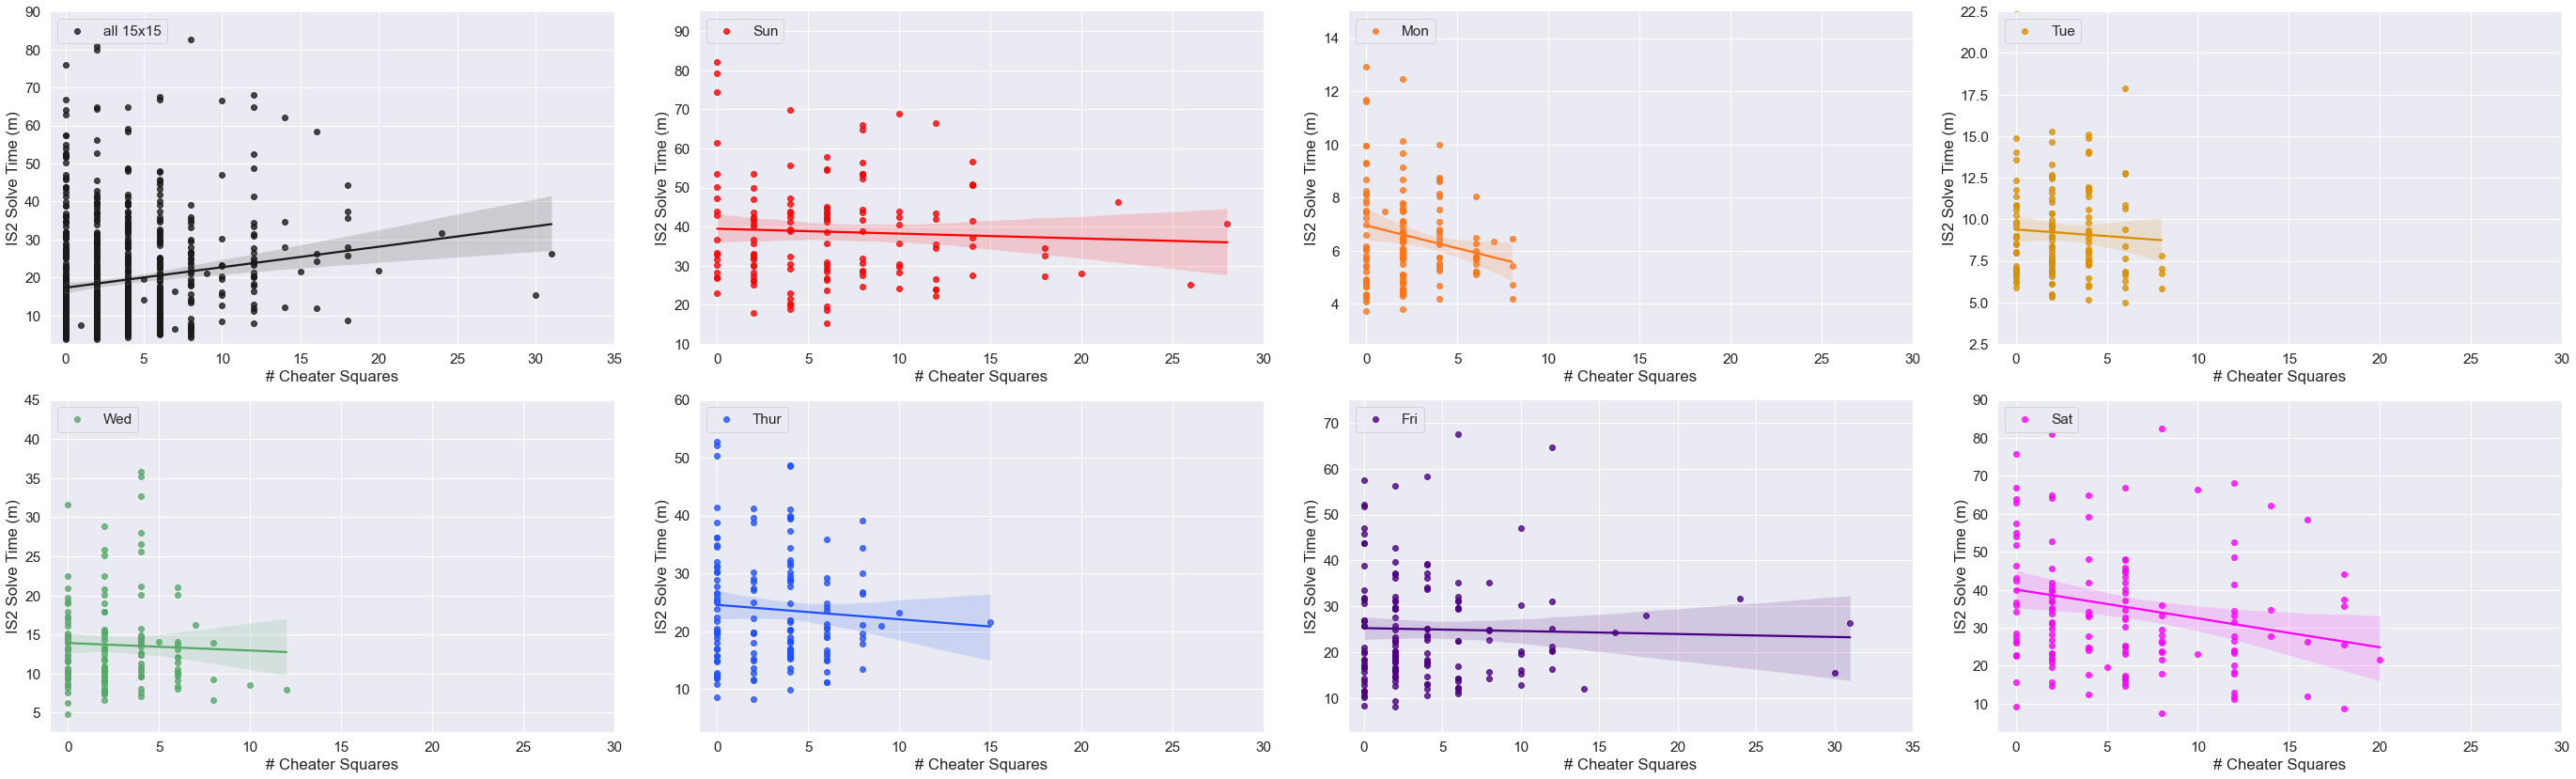

In [158]:
# Cheater Squares vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Cheater_Squares", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Cheater Squares",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,35))
p.axes[1].set_xlim((-1,30))
p.axes[2].set_xlim((-1,30))
p.axes[3].set_xlim((-1,30))
p.axes[4].set_xlim((-1,30))
p.axes[5].set_xlim((-1,30))
p.axes[6].set_xlim((-1,35))
p.axes[7].set_xlim((-1,30))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [159]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Cheater_Squares']))

0.13991809999219026


In [160]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Cheater_Squares']))

0.20063205431577927


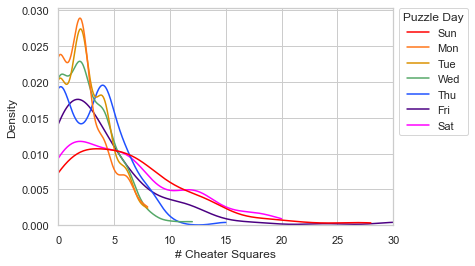

In [161]:
# Density plot of number of cheater squares in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Cheater_Squares", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,30))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 30)
ax.set_xlabel("# Cheater Squares")
plt.show()

In [162]:
IS2_df4["Cheater_Squares"].agg(['min', 'max'])

min     0
max    31
Name: Cheater_Squares, dtype: int64

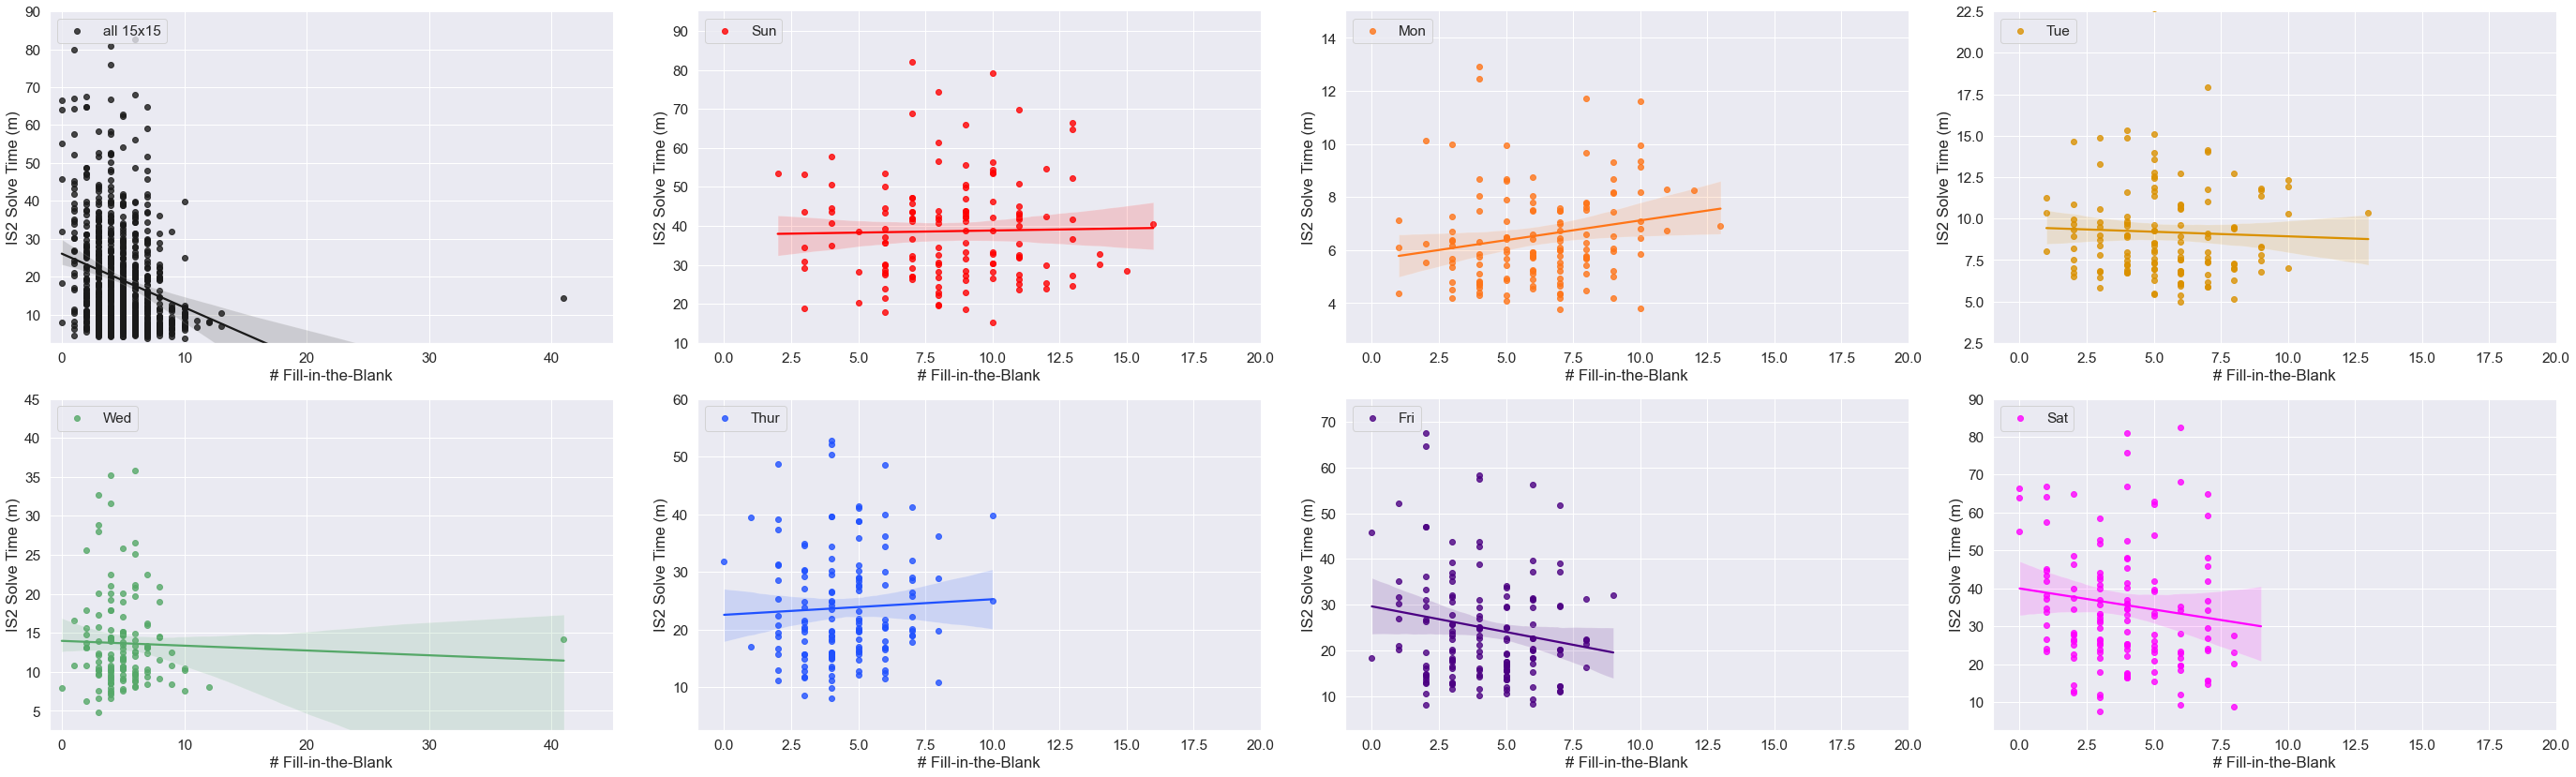

In [163]:
# Fill-in-the-blank clues vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="FITB", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Fill-in-the-Blank",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,45))
p.axes[1].set_xlim((-1,20))
p.axes[2].set_xlim((-1,20))
p.axes[3].set_xlim((-1,20))
p.axes[4].set_xlim((-1,45))
p.axes[5].set_xlim((-1,20))
p.axes[6].set_xlim((-1,20))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [164]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['FITB']))

-0.24704957121794432


In [165]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['FITB']))

-0.2568037702100666


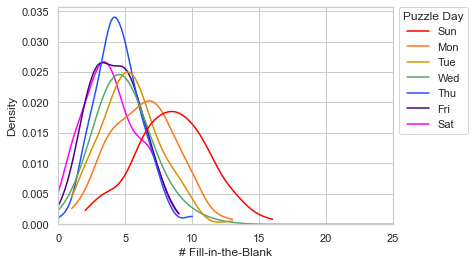

In [166]:
# Density plot of number of fill-in-the-blank clues in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "FITB", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,45))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 25)
ax.set_xlabel("# Fill-in-the-Blank")
plt.show()

In [167]:
IS2_df4["FITB"].agg(['min', 'max'])

min     0
max    41
Name: FITB, dtype: int64

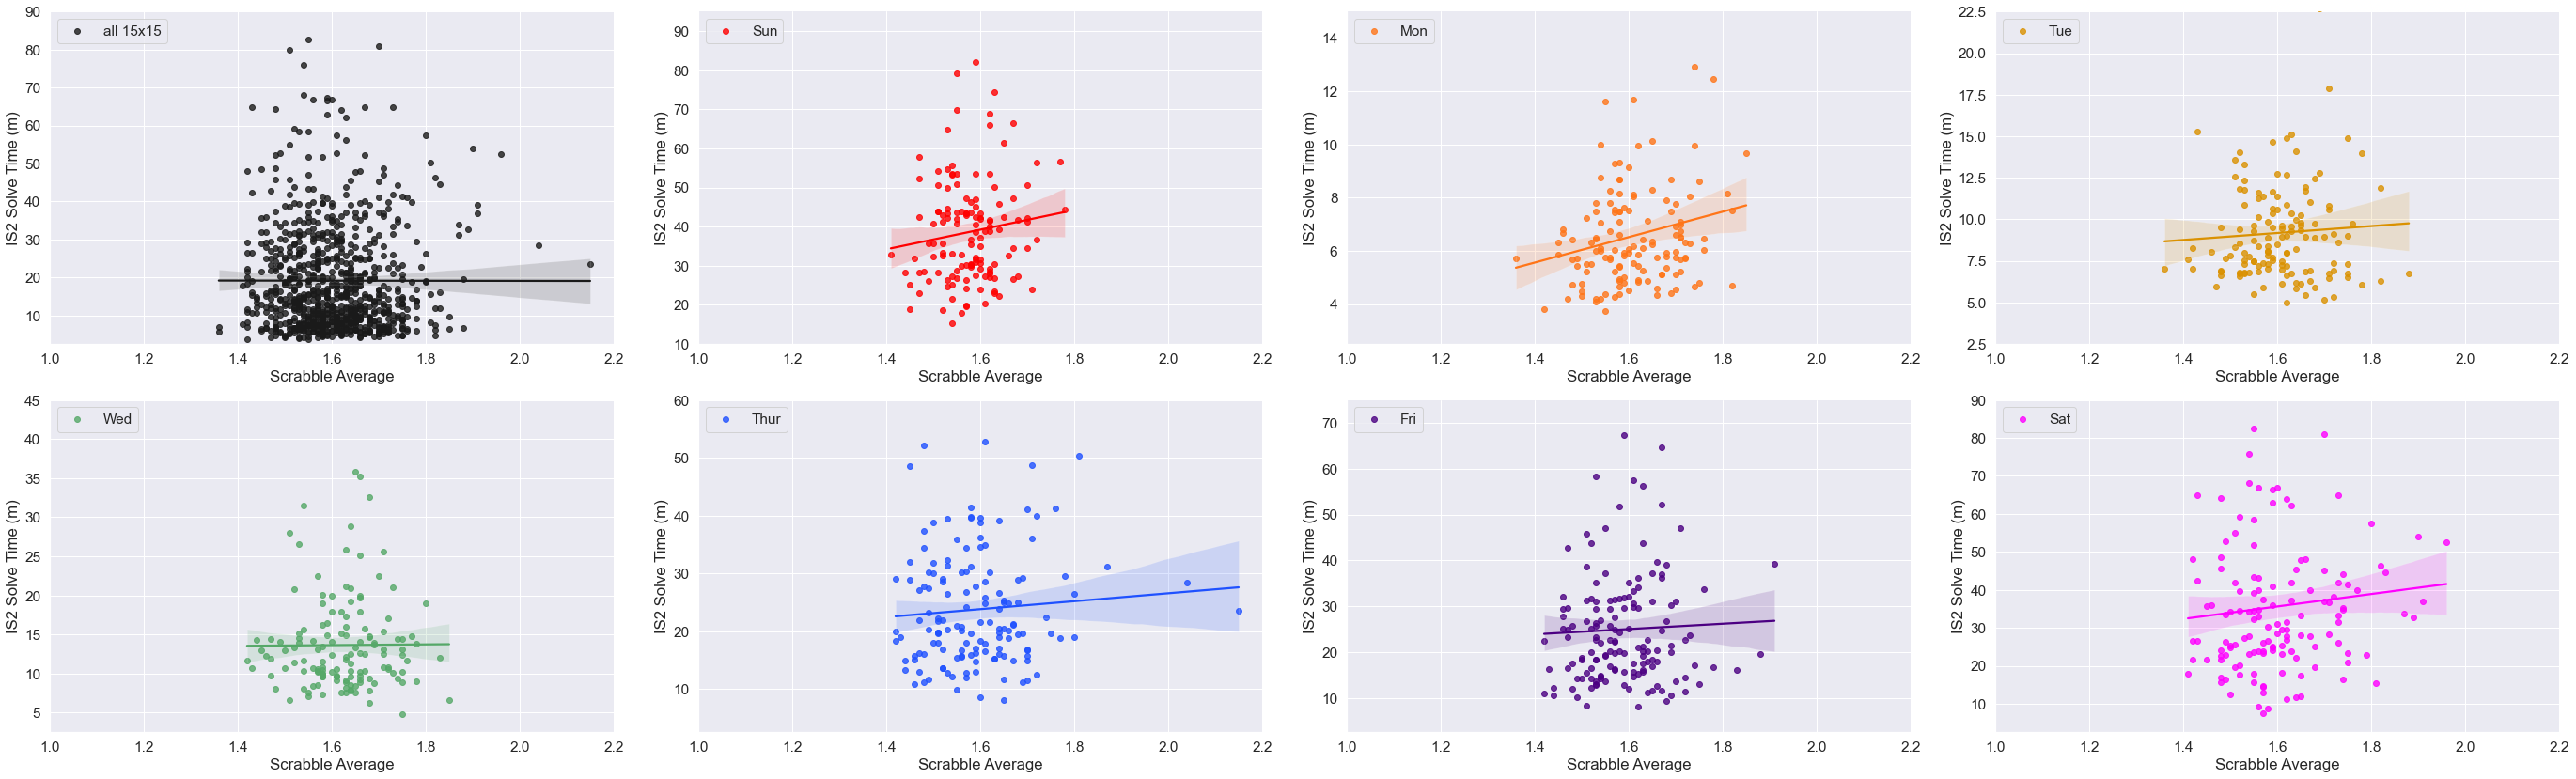

In [168]:
# Scrabble Average vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Scrabble_Avg", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Scrabble Average",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((1,2.2))
p.axes[1].set_xlim((1,2.2))
p.axes[2].set_xlim((1,2.2))
p.axes[3].set_xlim((1,2.2))
p.axes[4].set_xlim((1,2.2))
p.axes[5].set_xlim((1,2.2))
p.axes[6].set_xlim((1,2.2))
p.axes[7].set_xlim((1,2.2))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [169]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Scrabble_Avg']))

-0.0008775284017691553


In [170]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Scrabble_Avg']))

-0.025619435809148897


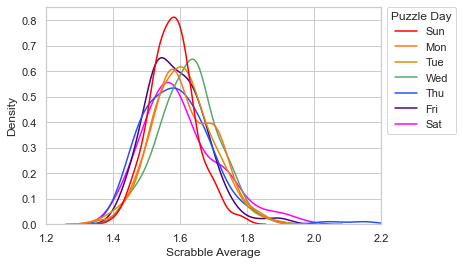

In [171]:
# Density plot of Scrabble Average in puzzles solved by IS2

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Scrabble_Avg", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(1.2, 2.2)
ax.set_xlabel("Scrabble Average")
plt.show()

In [172]:
IS2_df4["Scrabble_Avg"].agg(['min', 'max'])

min    1.36
max    2.15
Name: Scrabble_Avg, dtype: float64

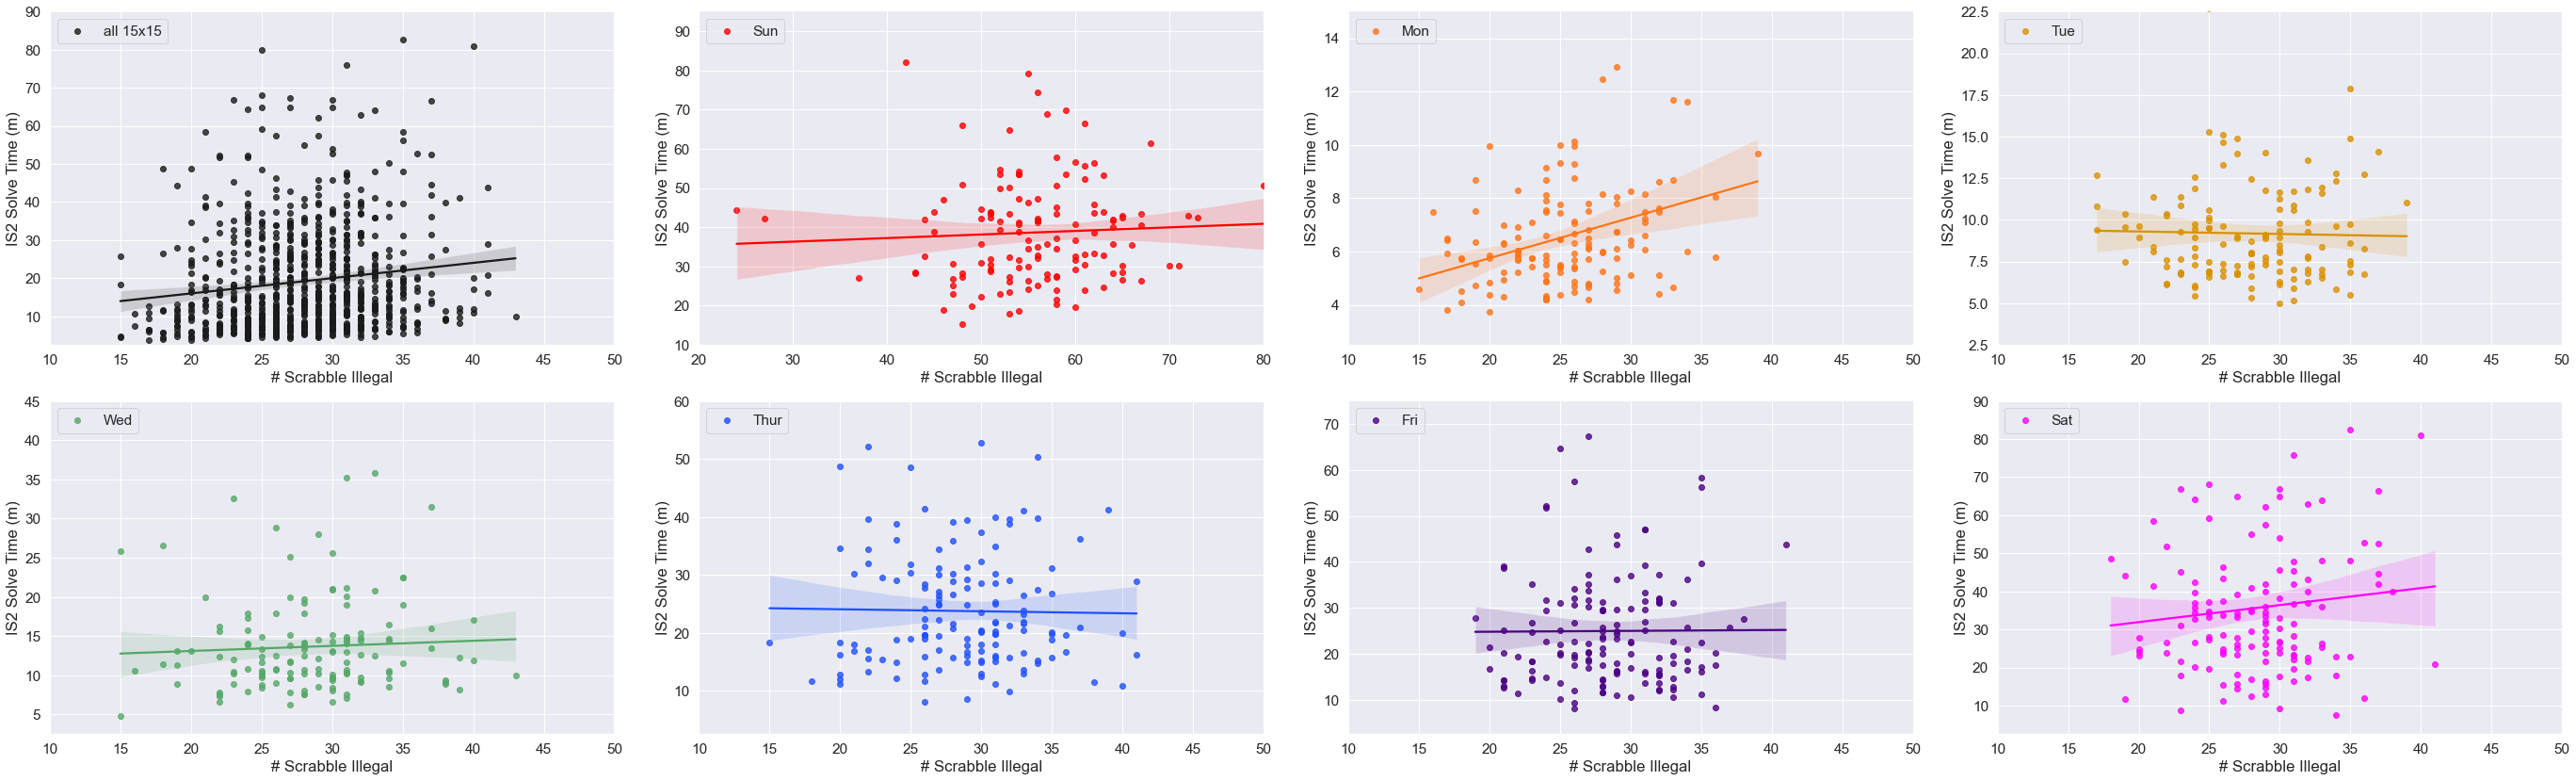

In [173]:
# Scrabble Illegal # vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Scrabble_Illegal", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Scrabble Illegal",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((10,50))
p.axes[1].set_xlim((20,80))
p.axes[2].set_xlim((10,50))
p.axes[3].set_xlim((10,50))
p.axes[4].set_xlim((10,50))
p.axes[5].set_xlim((10,50))
p.axes[6].set_xlim((10,50))
p.axes[7].set_xlim((10,50))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [174]:
# Calculate Pearson R for IS2 for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Scrabble_Illegal']))

0.13354602554546277


In [175]:
# Calculate Pearson R for GMS for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Scrabble_Illegal']))

0.18960127699397197


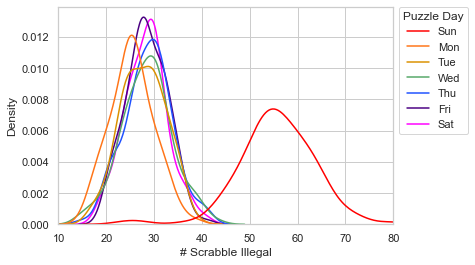

In [176]:
# Density plot of Scrabble Illegal # in puzzles solved by IS2

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Scrabble_Illegal", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(10, 80)
ax.set_xlabel("# Scrabble Illegal")
plt.show()

In [177]:
IS2_df4["Scrabble_Illegal"].agg(['min', 'max'])

min    15
max    80
Name: Scrabble_Illegal, dtype: int64

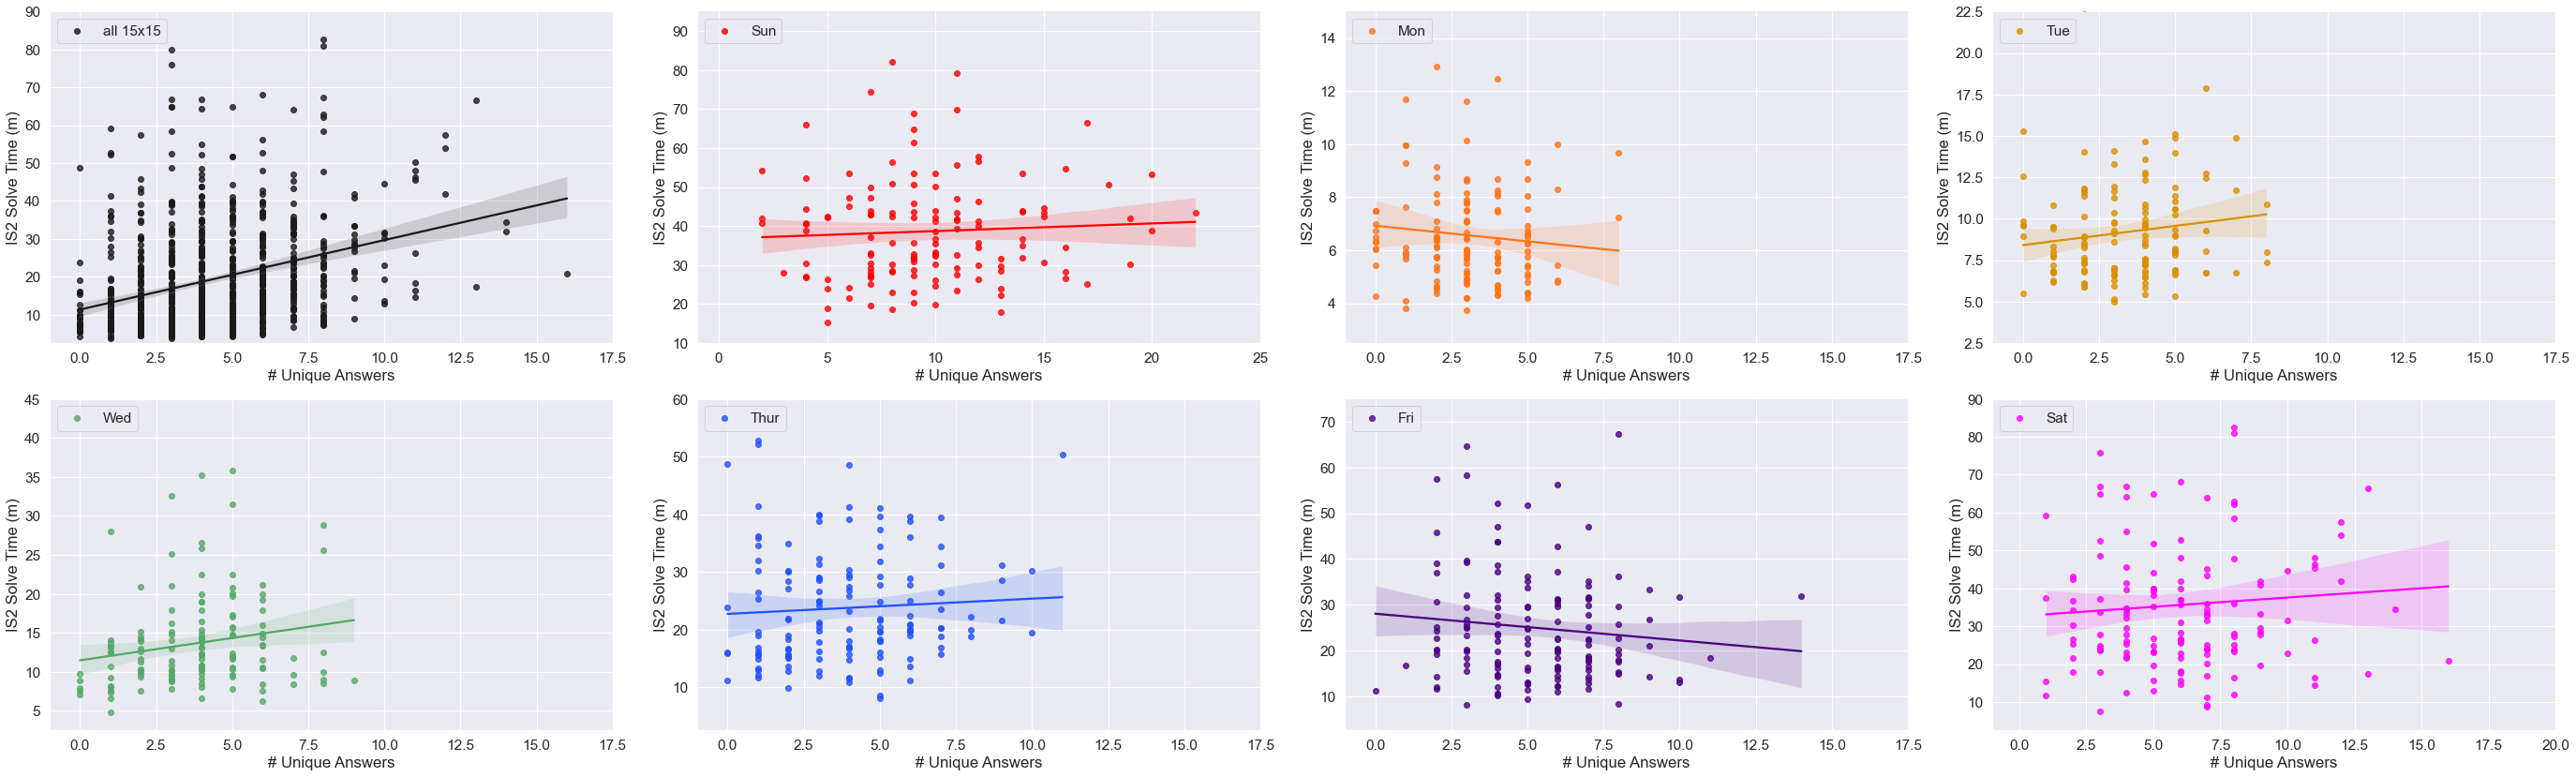

In [178]:
# Unique Answers # # vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Unique_Answers", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Unique Answers",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,17.5))
p.axes[1].set_xlim((-1,25))
p.axes[2].set_xlim((-1,17.5))
p.axes[3].set_xlim((-1,17.5))
p.axes[4].set_xlim((-1,17.5))
p.axes[5].set_xlim((-1,17.5))
p.axes[6].set_xlim((-1,17.5))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [179]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Unique_Answers']))

0.31016426918026907


In [180]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Unique_Answers']))

0.3809226668737031


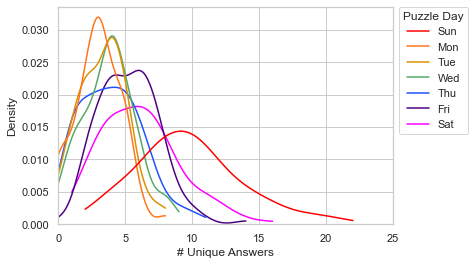

In [181]:
# Density plot of Unique Answers # in puzzles solved by IS2

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Unique_Answers", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True, cut=0, clip=(0,25))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(0, 25)
ax.set_xlabel("# Unique Answers")
plt.show()

In [182]:
IS2_df4["Unique_Answers"].agg(['min', 'max'])

min     0
max    22
Name: Unique_Answers, dtype: int64

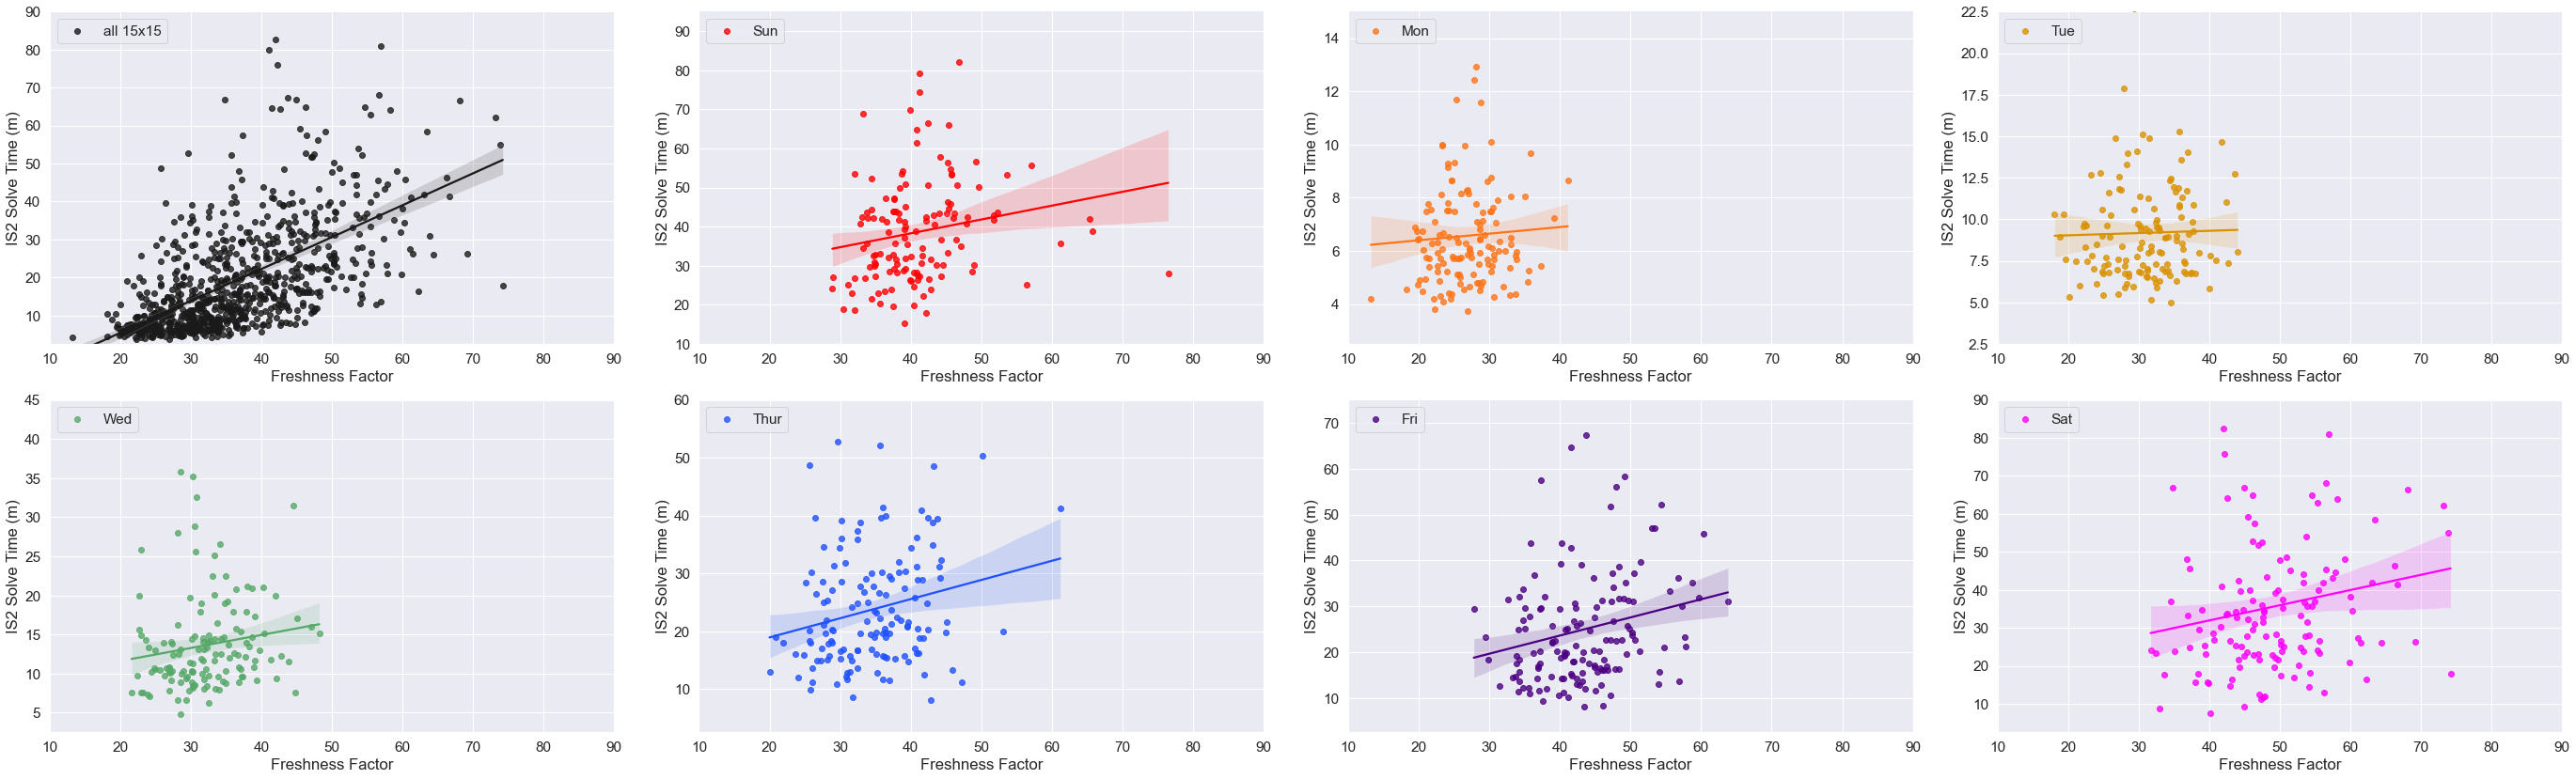

In [183]:
# Freshness Factor vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Freshness_Factor", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "Freshness Factor",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((10,90))
p.axes[1].set_xlim((10,90))
p.axes[2].set_xlim((10,90))
p.axes[3].set_xlim((10,90))
p.axes[4].set_xlim((10,90))
p.axes[5].set_xlim((10,90))
p.axes[6].set_xlim((10,90))
p.axes[7].set_xlim((10,90))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [184]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Freshness_Factor']))

0.5817722634555598


In [185]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Freshness_Factor']))

0.6718557628045986


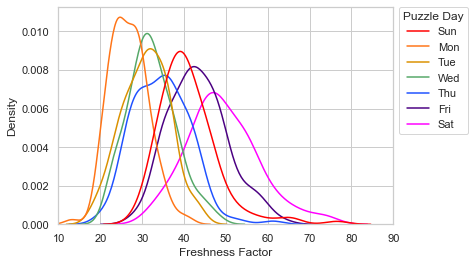

In [186]:
# Density plot of Freshness Factor in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Freshness_Factor", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(10, 90)
ax.set_xlabel("Freshness Factor")
plt.show()

In [187]:
IS2_df4["Freshness_Factor"].agg(['min', 'max'])

min    13.2
max    76.5
Name: Freshness_Factor, dtype: float64

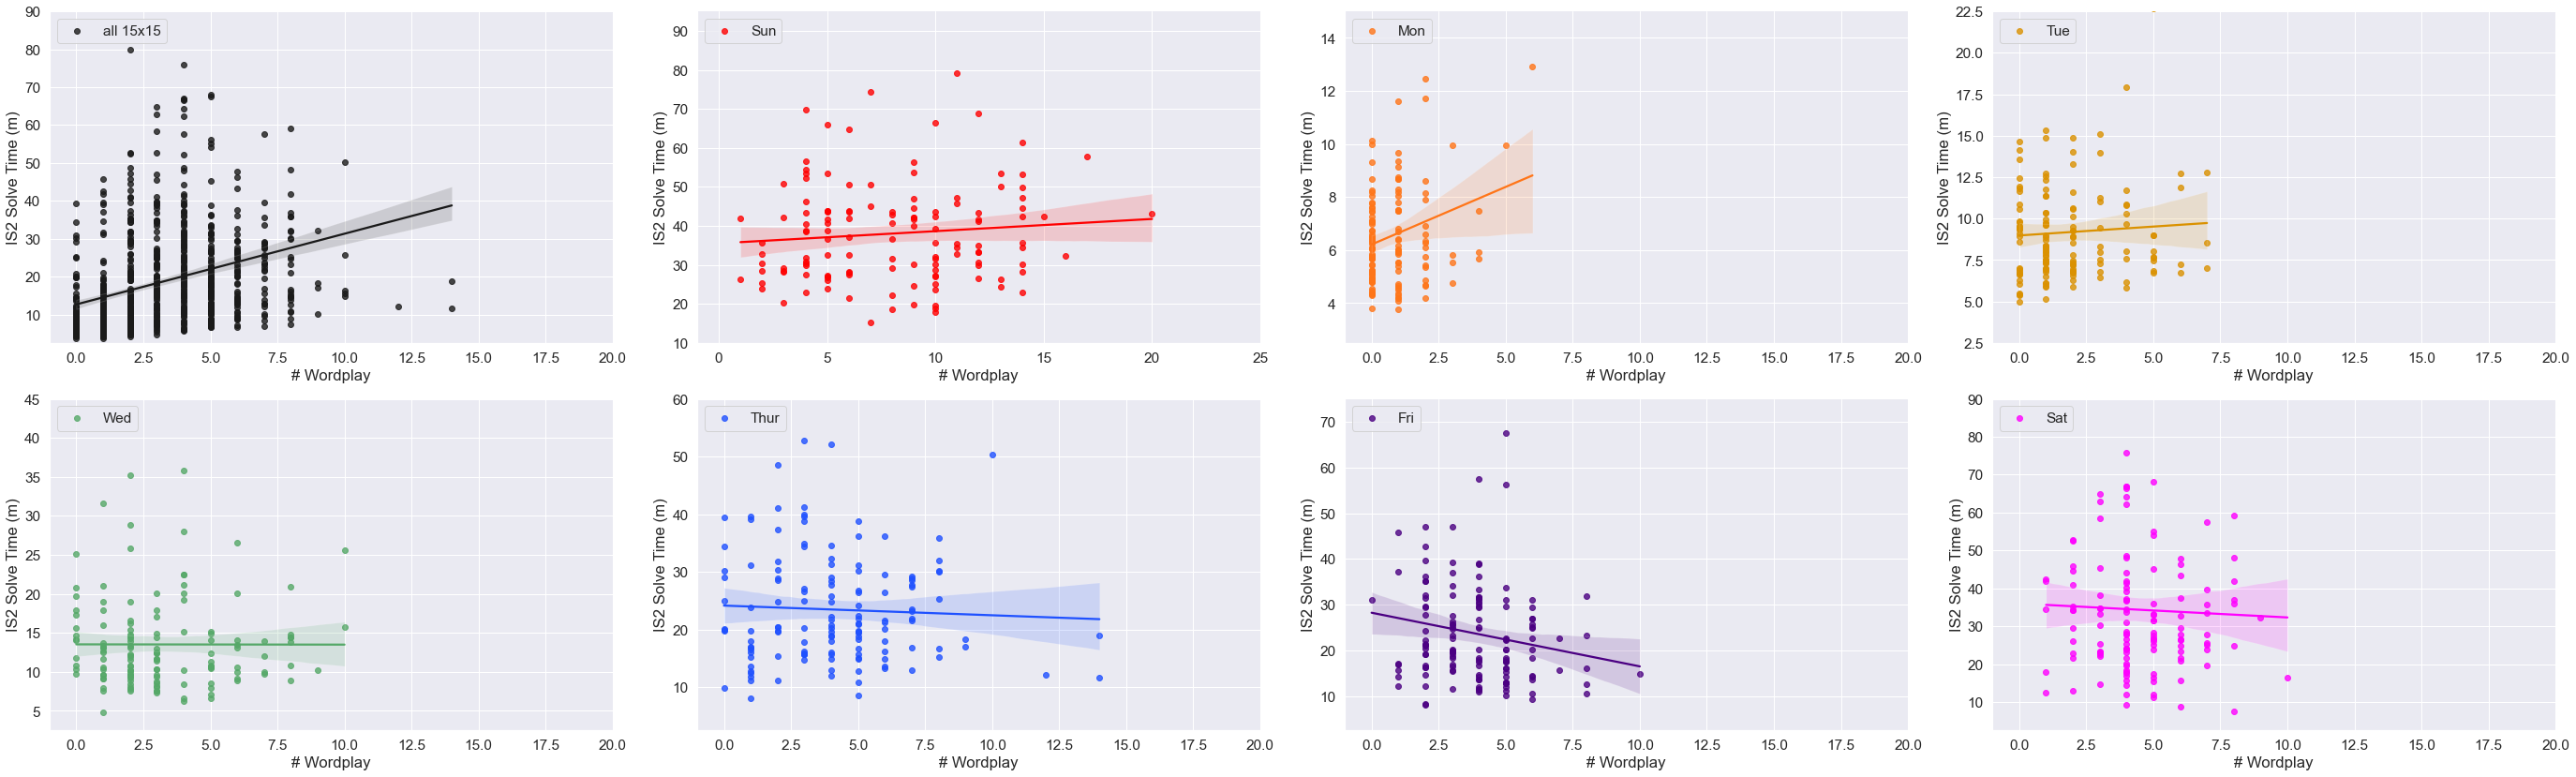

In [188]:
# Wordplay vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Wordplay", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Wordplay",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,20))
p.axes[1].set_xlim((-1,25))
p.axes[2].set_xlim((-1,20))
p.axes[3].set_xlim((-1,20))
p.axes[4].set_xlim((-1,20))
p.axes[5].set_xlim((-1,20))
p.axes[6].set_xlim((-1,20))
p.axes[7].set_xlim((-1,20))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [189]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Wordplay']))

0.3232891885223449


In [190]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Wordplay']))

0.44519575295487973


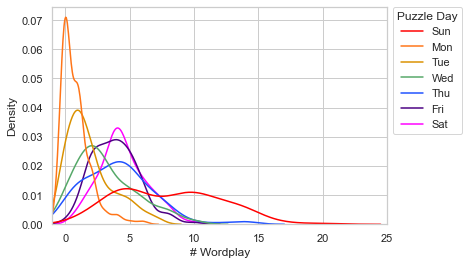

In [191]:
# Density plot of Wordplay in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Wordplay", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(-1, 25)
ax.set_xlabel("# Wordplay")
plt.show()

In [192]:
IS2_df4["Wordplay"].agg(['min', 'max'])

min     0.0
max    20.0
Name: Wordplay, dtype: float64

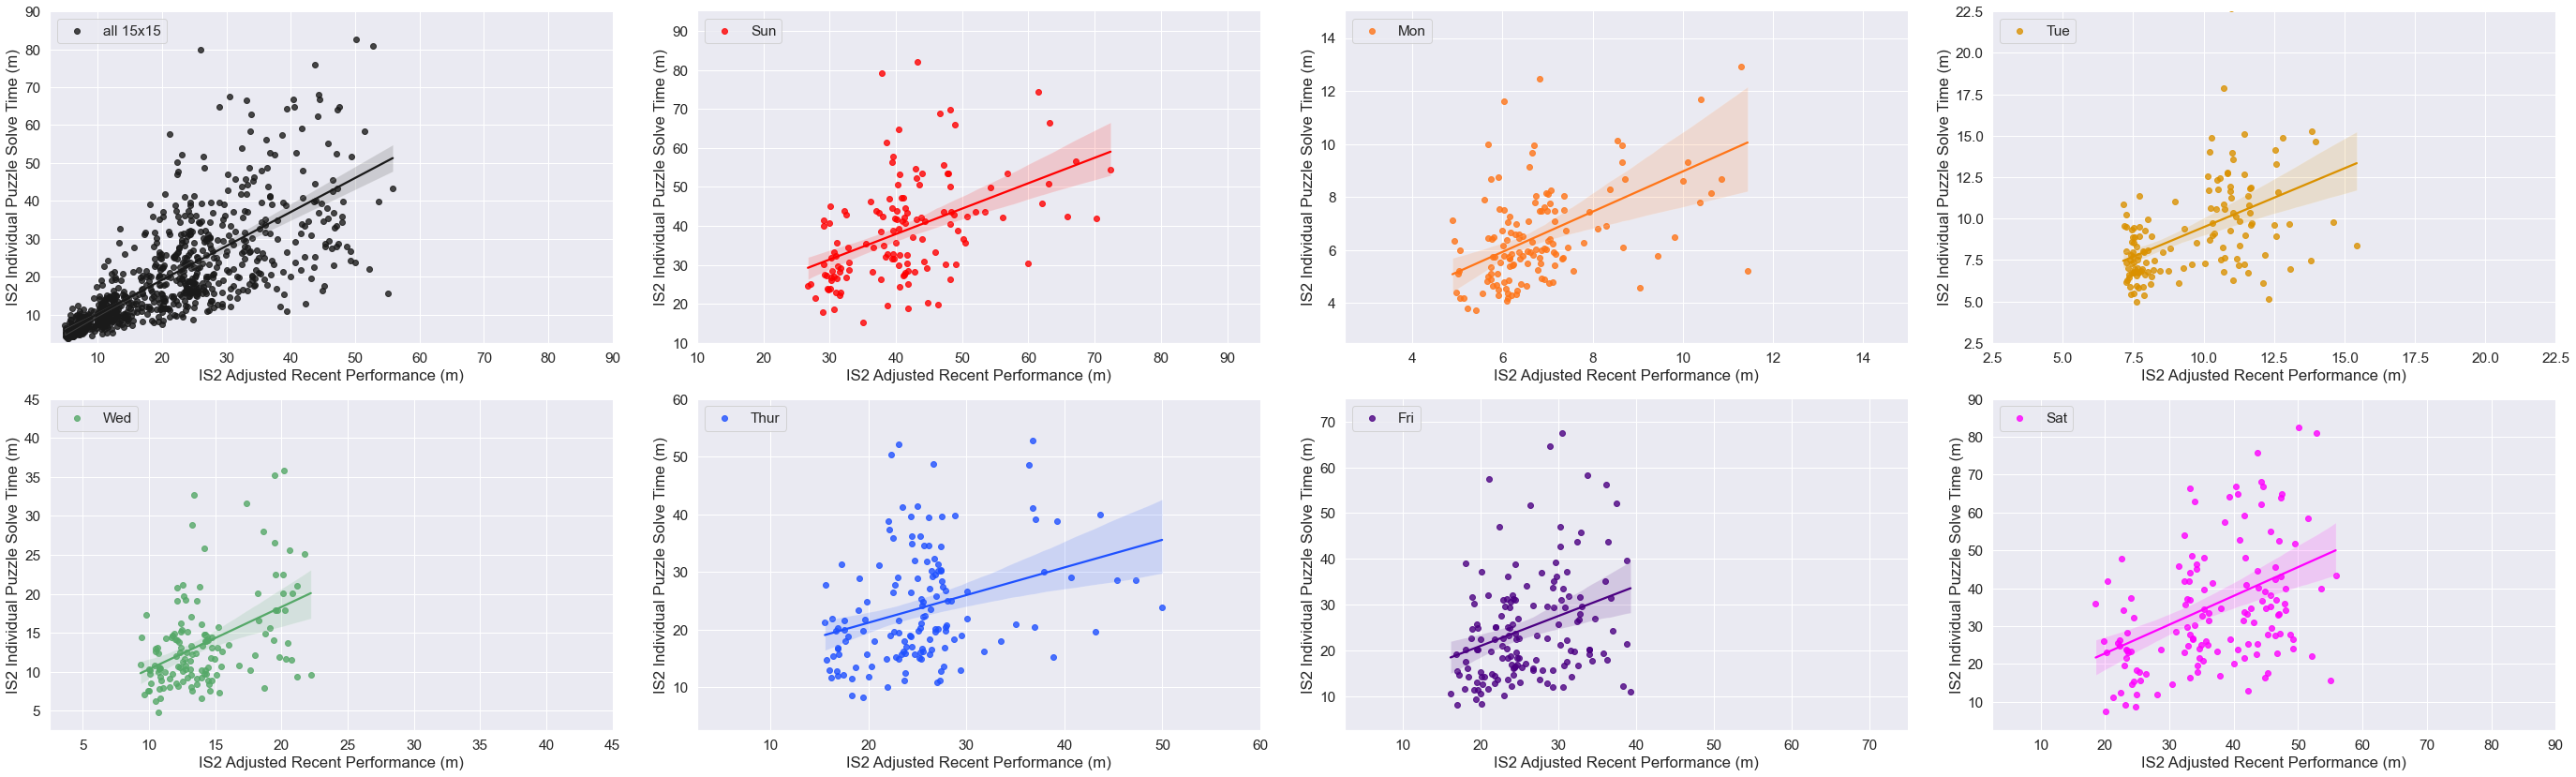

In [193]:
# IS2 Recent Past Performance (Time-Decay Weighted Immediately Previous 20 Puzzles Prior to a given puzzle) vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="IS_pds_l20_dw", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "IS2 Adjusted Recent Performance (m)",
    ylabel="IS2 Individual Puzzle Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((2.5,90))
p.axes[1].set_xlim((10,95))
p.axes[2].set_xlim((2.5,15))
p.axes[3].set_xlim((2.5,22.5))
p.axes[4].set_xlim((2.5,45))
p.axes[5].set_xlim((2.5,60))
p.axes[6].set_xlim((2.5,75))
p.axes[7].set_xlim((2.5,90))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [ ]:
# #GMS Recent Past Performance (Time-Decay Weighted Immediately Previous 10 Puzzles Prior to a given puzzle) vs GMS Raw Solve Times

# IS1_df4a = IS1_df4a.sort_values(by=['DOW_num'], ascending = True)

# IS1_df4a['plot_seq_map'] = IS1_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

# sns.set(font_scale=1.4)

# p = sns.lmplot(
#     data=IS1_df4a, x="GMS_pds_l10_dw", y="GMST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
#     sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
# ).set(title="", xlabel= "GMS Adjusted Recent Performance (m)",
#     ylabel="GMS Individual Puzzle Solve Time (m)"
# )

# #Adjust subplots individually
# p.axes[0].set_xlim((2.5,42.5))
# p.axes[1].set_xlim((10,60))
# p.axes[2].set_xlim((2.5,14))
# p.axes[3].set_xlim((2.5,14))
# p.axes[4].set_xlim((2.5,20))
# p.axes[5].set_xlim((2.5,32.5))
# p.axes[6].set_xlim((2.5,35))
# p.axes[7].set_xlim((2.5,42.5))

# p.axes[0].set_ylim((2.5,42.5))
# p.axes[1].set_ylim((10,60))
# p.axes[2].set_ylim((2.5,14))
# p.axes[3].set_ylim((2.5,14))
# p.axes[4].set_ylim((2.5,20))
# p.axes[5].set_ylim((2.5,32.5))
# p.axes[6].set_ylim((2.5,35))
# p.axes[7].set_ylim((2.5,42.5))

# plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

# _= p.axes[0].legend(loc = 'upper left', title="")
# _= p.axes[1].legend(loc = 'upper left')
# _= p.axes[2].legend(loc = 'upper left')
# _= p.axes[3].legend(loc = 'upper left')
# _= p.axes[4].legend(loc = 'upper left')
# _= p.axes[5].legend(loc = 'upper left')
# _= p.axes[6].legend(loc = 'upper left')
# _= p.axes[7].legend(loc = 'upper left')

In [194]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['IS_pds_l20_dw']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['IST(m)'].corr(IS2_Sun['IS_pds_l20_dw']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['IST(m)'].corr(IS2_Mon['IS_pds_l20_dw']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['IST(m)'].corr(IS2_Tue['IS_pds_l20_dw']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['IST(m)'].corr(IS2_Wed['IS_pds_l20_dw']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['IST(m)'].corr(IS2_Thu['IS_pds_l20_dw']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['IST(m)'].corr(IS2_Fri['IS_pds_l20_dw']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['IST(m)'].corr(IS2_Sat['IS_pds_l20_dw']))

0.7323653809892128
0.4674544837855078
0.49717477430588636
0.46646000780526004
0.4442223327629929
0.3235211484967891
0.2982308353906829
0.3785569234901312


In [195]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

# print(IS2_15x15['GMST(m)'].corr(IS2_15x15['GMS_pds_l10_dw']))

# # Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['GMST(m)'].corr(IS2_Sun['GMS_pds_l20_dw']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['GMST(m)'].corr(IS2_Mon['GMS_pds_l20_dw']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['GMST(m)'].corr(IS2_Tue['GMS_pds_l20_dw']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['GMST(m)'].corr(IS2_Wed['GMS_pds_l20_dw']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['GMST(m)'].corr(IS2_Thu['GMS_pds_l20_dw']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['GMST(m)'].corr(IS2_Fri['GMS_pds_l20_dw']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['GMST(m)'].corr(IS2_Sat['GMS_pds_l20_dw']))

0.5811891638064325
0.5649314797300669
0.37620043519907315
0.3485250820313731
0.292305244904169
0.46356242988200547
0.4312284682571556


In [ ]:
IS1_Thu.to_csv('../data/IS1_Thu.csv', index=False)

In [ ]:
IS1_15x15.info()

### Data Supplement

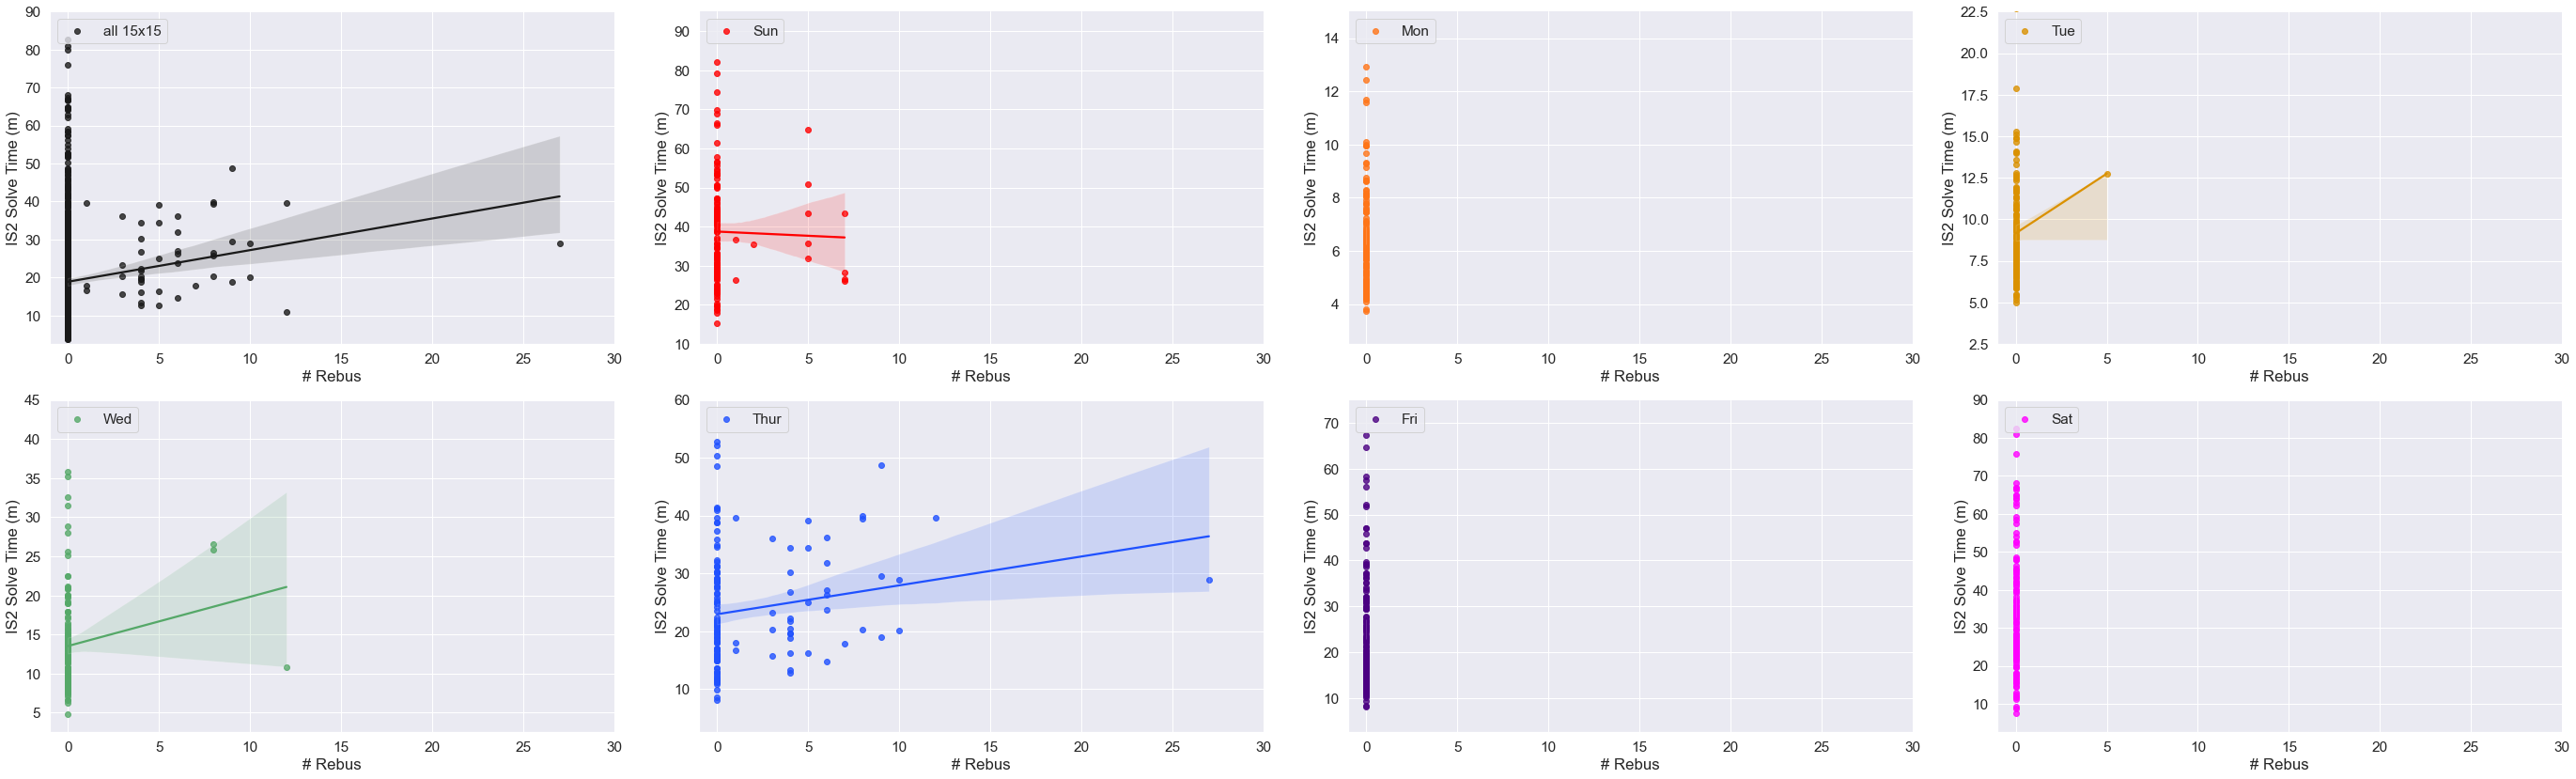

In [196]:
# Rebus vs IS2 Raw Solve Times
#Supp. Fig. 2

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Rebus_Count", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Rebus",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,30))
p.axes[1].set_xlim((-1,30))
p.axes[2].set_xlim((-1,30))
p.axes[3].set_xlim((-1,30))
p.axes[4].set_xlim((-1,30))
p.axes[5].set_xlim((-1,30))
p.axes[6].set_xlim((-1,30))
p.axes[7].set_xlim((-1,30))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [197]:
# Calculate Pearson R for 15x15 grids for IS2 for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Rebus_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['IST(m)'].corr(IS2_Sun['Rebus_Count']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['IST(m)'].corr(IS2_Mon['Rebus_Count']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['IST(m)'].corr(IS2_Tue['Rebus_Count']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['IST(m)'].corr(IS2_Wed['Rebus_Count']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['IST(m)'].corr(IS2_Thu['Rebus_Count']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['IST(m)'].corr(IS2_Fri['Rebus_Count']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['IST(m)'].corr(IS2_Sat['Rebus_Count']))

0.0953177704998965
-0.02471556116004876
nan
0.09925448423397797
0.14878357925604055
0.17846234313581572
nan
nan


In [198]:
# Calculate Pearson R for 15x15 grids for GMST for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Rebus_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['GMST(m)'].corr(IS2_Sun['Rebus_Count']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['GMST(m)'].corr(IS2_Mon['Rebus_Count']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['GMST(m)'].corr(IS2_Tue['Rebus_Count']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['GMST(m)'].corr(IS2_Wed['Rebus_Count']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['GMST(m)'].corr(IS2_Thu['Rebus_Count']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['GMST(m)'].corr(IS2_Fri['Rebus_Count']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['GMST(m)'].corr(IS2_Sat['Rebus_Count']))

0.14113257134374263
0.0704741916628094
nan
0.16384958176374728
0.1086384412446858
0.26798990128243655
nan
nan


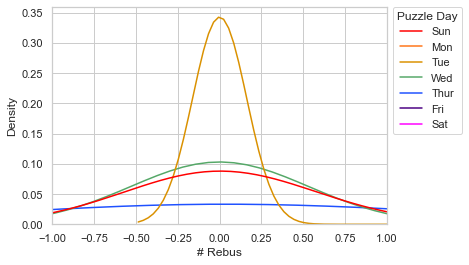

In [196]:
# Density plot of Rebus Count in puzzles solved by IS2
# Rememember to use df3 because df4 has the copied-in data for plotting all completed puzzles together

IS2_df4 = IS2_df4.sort_values(by=['DOW_num'], ascending = True)

sns.set(style="whitegrid")
ax = sns.kdeplot(data=IS2_df4, x = "Rebus_Count", hue= "plot_seq_map", palette=["red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"], legend=True)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.026), title='Puzzle Day')

plt.xlim(-1, 1)
ax.set_xlabel("# Rebus")
plt.show()

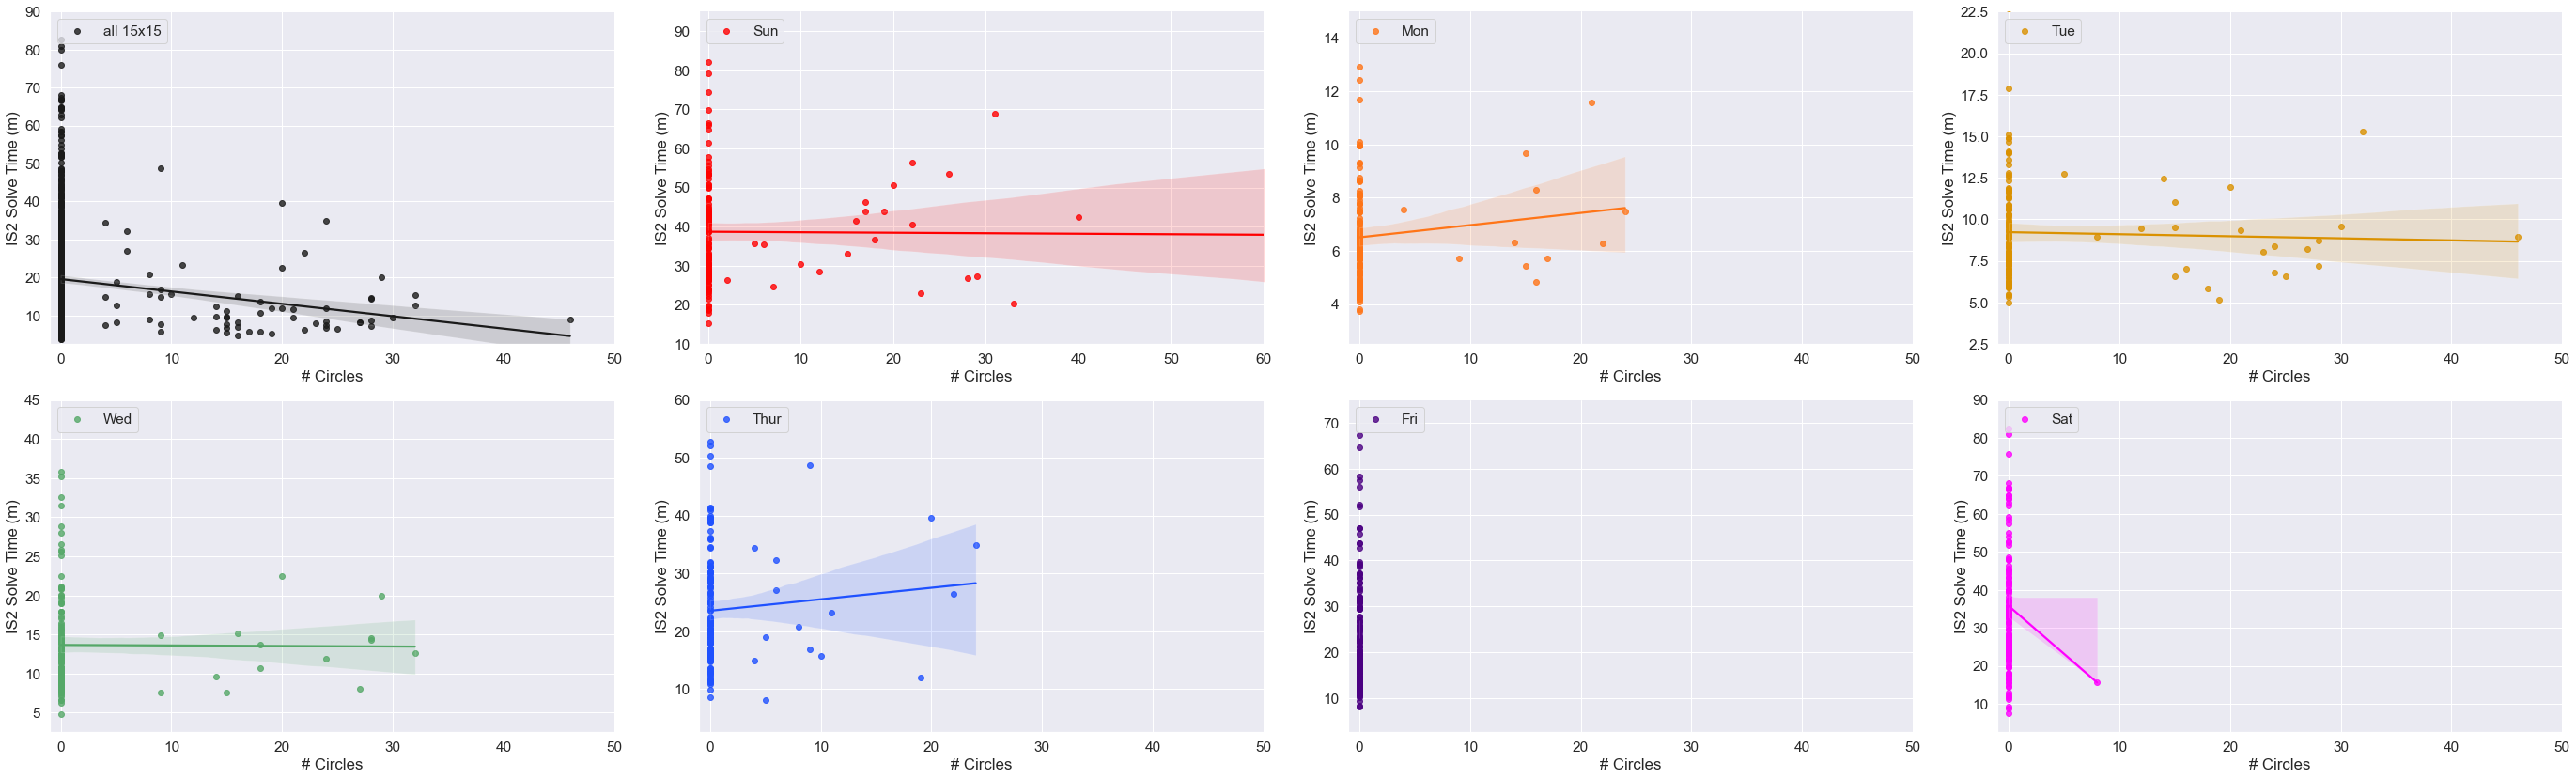

In [199]:
# Circles vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Circle_Count", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Circles",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,50))
p.axes[1].set_xlim((-1,60))
p.axes[2].set_xlim((-1,50))
p.axes[3].set_xlim((-1,50))
p.axes[4].set_xlim((-1,50))
p.axes[5].set_xlim((-1,50))
p.axes[6].set_xlim((-1,50))
p.axes[7].set_xlim((-1,50))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [200]:
# Calculate Pearson R for IS2 for 15x15 grids for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Circle_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['IST(m)'].corr(IS2_Sun['Circle_Count']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['IST(m)'].corr(IS2_Mon['Circle_Count']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['IST(m)'].corr(IS2_Tue['Circle_Count']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['IST(m)'].corr(IS2_Wed['Circle_Count']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['IST(m)'].corr(IS2_Thu['Circle_Count']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['IST(m)'].corr(IS2_Fri['Circle_Count']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['IST(m)'].corr(IS2_Sat['Circle_Count']))

-0.11566532383251013
-0.009422422426610602
0.10116479263557063
-0.03423926116733577
-0.0074620849702099964
0.0811263906315089
nan
-0.09166025290525757


In [201]:
# Calculate Pearson R for 15x15 grids for GMS for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Circle_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['GMST(m)'].corr(IS2_Sun['Circle_Count']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['GMST(m)'].corr(IS2_Mon['Circle_Count']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['GMST(m)'].corr(IS2_Tue['Circle_Count']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['GMST(m)'].corr(IS2_Wed['Circle_Count']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['GMST(m)'].corr(IS2_Thu['Circle_Count']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['GMST(m)'].corr(IS2_Fri['Circle_Count']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['GMST(m)'].corr(IS2_Sat['Circle_Count']))

-0.13603819786264093
-0.03723238956915231
0.20644971493891326
0.023230166525789426
0.05989313001131291
-0.024089182794978115
nan
-0.04665862813097514


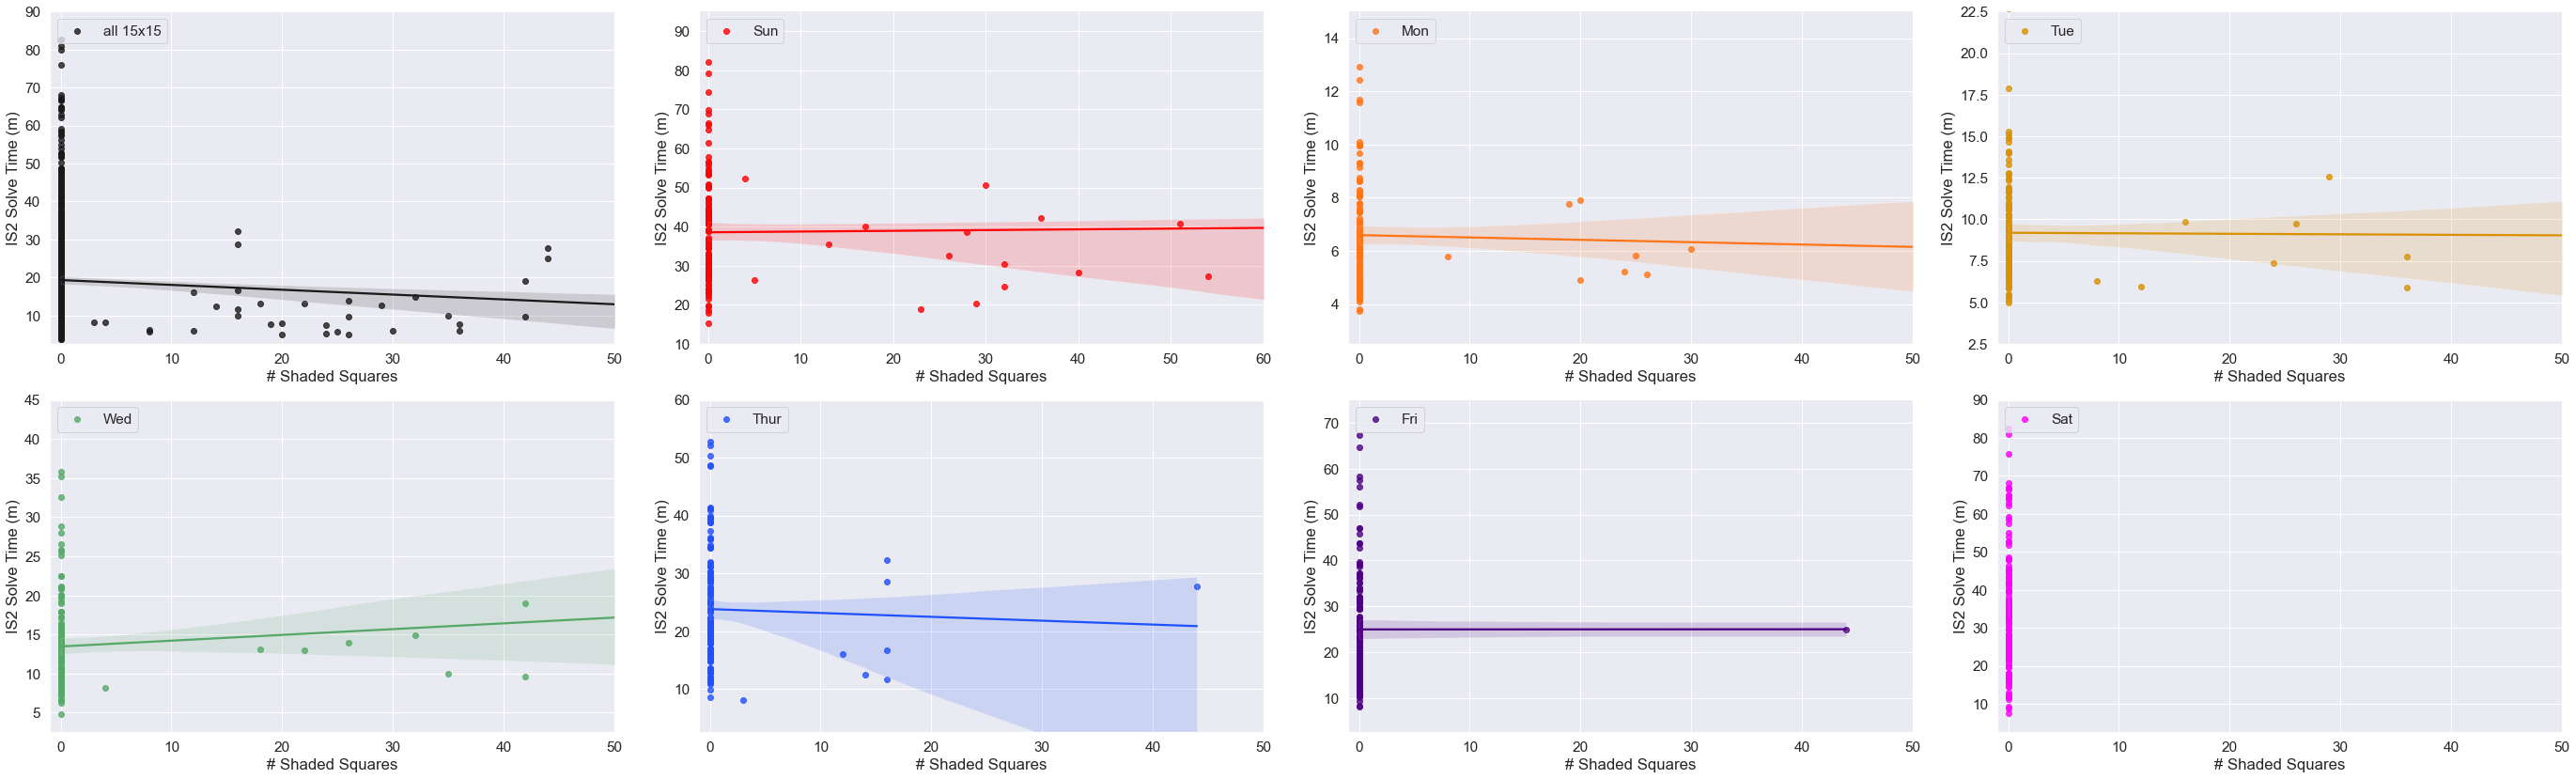

In [202]:
# Shaded Squares vs IS2 Raw Solve Times

IS2_df4a = IS2_df4a.sort_values(by=['DOW_num'], ascending = True)

IS2_df4a['plot_seq_map'] = IS2_df4a['DOW_num'].map({0: 'all 15x15', 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5: 'Thur', 6:'Fri', 7:'Sat'})

sns.set(font_scale=1.4)

p = sns.lmplot(
    data=IS2_df4a, x="Shade_Count", y="IST(m)", hue="plot_seq_map", col="DOW_num", col_order=[0, 1, 2, 3, 4, 5, 6, 7], palette=["k", "red", "#FF7518", "#da9100", "g", "#1F51FF", "indigo", "fuchsia"],
    sharey=False, sharex=False, height=6, aspect=1.6, legend=False, col_wrap=4
).set(title="", xlabel= "# Shaded Squares",
    ylabel="IS2 Solve Time (m)"
)

#Adjust subplots individually
p.axes[0].set_xlim((-1,50))
p.axes[1].set_xlim((-1,60))
p.axes[2].set_xlim((-1,50))
p.axes[3].set_xlim((-1,50))
p.axes[4].set_xlim((-1,50))
p.axes[5].set_xlim((-1,50))
p.axes[6].set_xlim((-1,50))
p.axes[7].set_xlim((-1,50))

p.axes[0].set_ylim((2.5,90))
p.axes[1].set_ylim((10,95))
p.axes[2].set_ylim((2.5,15))
p.axes[3].set_ylim((2.5,22.5))
p.axes[4].set_ylim((2.5,45))
p.axes[5].set_ylim((2.5,60))
p.axes[6].set_ylim((2.5,75))
p.axes[7].set_ylim((2.5,90))

plt.subplots_adjust(wspace = 0.15) #increase whitespace btwn subplot colums

_= p.axes[0].legend(loc = 'upper left', title="")
_= p.axes[1].legend(loc = 'upper left')
_= p.axes[2].legend(loc = 'upper left')
_= p.axes[3].legend(loc = 'upper left')
_= p.axes[4].legend(loc = 'upper left')
_= p.axes[5].legend(loc = 'upper left')
_= p.axes[6].legend(loc = 'upper left')
_= p.axes[7].legend(loc = 'upper left')

In [203]:
# Calculate Pearson R for IS2 for 15x15 grids for this feature
#IS2_15x15 = IS2_df4.loc[IS2_df4["DOW"]!=("Sunday")]

print(IS2_15x15['IST(m)'].corr(IS2_15x15['Shade_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df4.loc[IS2_df4["DOW"]==("Sunday")]
print(IS2_Sun['IST(m)'].corr(IS2_Sun['Shade_Count']))

IS2_Mon = IS2_df4.loc[IS2_df4["DOW"]==("Monday")]
print(IS2_Mon['IST(m)'].corr(IS2_Mon['Shade_Count']))

IS2_Tue = IS2_df4.loc[IS2_df4["DOW"]==("Tuesday")]
print(IS2_Tue['IST(m)'].corr(IS2_Tue['Shade_Count']))

IS2_Wed = IS2_df4.loc[IS2_df4["DOW"]==("Wednesday")]
print(IS2_Wed['IST(m)'].corr(IS2_Wed['Shade_Count']))

IS2_Thu = IS2_df4.loc[IS2_df4["DOW"]==("Thursday")]
print(IS2_Thu['IST(m)'].corr(IS2_Thu['Shade_Count']))

IS2_Fri = IS2_df4.loc[IS2_df4["DOW"]==("Friday")]
print(IS2_Fri['IST(m)'].corr(IS2_Fri['Shade_Count']))

IS2_Sat = IS2_df4.loc[IS2_df4["DOW"]==("Saturday")]
print(IS2_Sat['IST(m)'].corr(IS2_Sat['Shade_Count']))

-0.07591621643981208
0.03422599598691813
-0.06907970963065088
-0.007746323423770005
0.12175550992388617
-0.03255592610415363
0.00023854234411851546
nan


In [204]:
# Calculate Pearson R for GMS for 15x15 grids for this feature
#IS2_15x15 = IS2_df3.loc[IS2_df3["DOW"]!=("Sunday")]

print(IS2_15x15['GMST(m)'].corr(IS2_15x15['Shade_Count']))

# Calculate Pearson R for each puzzle day for this feature
IS2_Sun = IS2_df3.loc[IS2_df3["DOW"]==("Sunday")]
print(IS2_Sun['GMST(m)'].corr(IS2_Sun['Shade_Count']))

IS2_Mon = IS2_df3.loc[IS2_df3["DOW"]==("Monday")]
print(IS2_Mon['GMST(m)'].corr(IS2_Mon['Shade_Count']))

IS2_Tue = IS2_df3.loc[IS2_df3["DOW"]==("Tuesday")]
print(IS2_Tue['GMST(m)'].corr(IS2_Tue['Shade_Count']))

IS2_Wed = IS2_df3.loc[IS2_df3["DOW"]==("Wednesday")]
print(IS2_Wed['GMST(m)'].corr(IS2_Wed['Shade_Count']))

IS2_Thu = IS2_df3.loc[IS2_df3["DOW"]==("Thursday")]
print(IS2_Thu['GMST(m)'].corr(IS2_Thu['Shade_Count']))

IS2_Fri = IS2_df3.loc[IS2_df3["DOW"]==("Friday")]
print(IS2_Fri['GMST(m)'].corr(IS2_Fri['Shade_Count']))

IS2_Sat = IS2_df3.loc[IS2_df3["DOW"]==("Saturday")]
print(IS2_Sat['GMST(m)'].corr(IS2_Sat['Shade_Count']))

-0.08073571176490893
0.06905279621302415
-0.05291817253482122
-0.034247633941445324
0.08600289795809542
0.03514075984276756
0.041819378477072205
nan
